## IMPORTANT:  for $h_{125} = h_2$, the LHCXSWG XS only go down to 80 GeV, thus no mh1 < 80!

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from itertools import izip

%matplotlib inline

get_ipython().magic(u'load_ext autoreload')
get_ipython().magic(u'autoreload 2')

get_ipython().magic(u"config InlineBackend.figure_formats = 'png', ")

mpl.rcParams['figure.figsize'] = (7.0, 4.0)  # default size of plots
mpl.rcParams['axes.labelsize'] = 30
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20
mpl.rcParams['xtick.major.size'] = 10
mpl.rcParams['ytick.major.size'] = 10
mpl.rcParams['xtick.minor.size'] = 5
mpl.rcParams['ytick.minor.size'] = 5
mpl.rcParams['legend.framealpha'] = 0.6
mpl.rcParams['legend.scatterpoints'] = 1
# mpl.rcParams.update({'font.size': 24, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})
pd.set_option('display.max_colwidth', 120)

In [2]:
from common_plots import *

In [3]:
# Extract dataframes from binary
store = pd.HDFStore("points_MICRO_SCAN_I42_NTv482_HBv421_REDUCED_3_02_Nov_15_1041.h5")
df_orig = store.full12loop_all
df_pass_all = store.full12loop_good_posMuMagMom_planckUpperOnly #'relaxed' constraints - +ve g-2 and omegah^2
store.close()

In [4]:
# Make subsets based on masses, and passing ALL NMSSMTools constraints (i.e. don't ignore g-2 and relic density)
from make_hdf5 import subset_var
df_pass_all_h1 = subset_var(df_pass_all, 122.1, 128.1, 'mh1')
df_pass_all_h2 = subset_var(df_pass_all, 122.1, 128.1, 'mh2')
df_pass_all_strict = df_pass_all[df_pass_all.constraints == ""]
df_pass_all_strict_ma1Lt10 = df_pass_all_strict[df_pass_all_strict.ma1 <10]

In [5]:
# df_pass_all.head().T

In [5]:
print 'Original points (no constraints):', len(df_orig.index) 
print 'With relaxed constraints (on g-2, relic density & some LHC constraints):', len(df_pass_all.index)
print 'Relaxed constraints, ma1 < 10:', len(df_pass_all[df_pass_all.ma1<10])
print 'Strictly enforcing all constraints in NMSSMTools 4.8.2:',len(df_pass_all_strict.index)
print 'Strictly enforcing all constraints in NMSSMTools 4.8.2 with ma1 < 10:',len(df_pass_all_strict_ma1Lt10.index)

Original points (no constraints): 1204105
With relaxed constraints (on g-2, relic density & some LHC constraints): 696190
Relaxed constraints, ma1 < 10: 31851
Strictly enforcing all constraints in NMSSMTools 4.8.2: 4638
Strictly enforcing all constraints in NMSSMTools 4.8.2 with ma1 < 10: 521


In [6]:
df_pass_all.columns.values

array(['mtau', 'mh1', 'mh2', 'mh3', 'ma1', 'ma2', 'mhc', 'mstop1',
       'mstop2', 'msbottom1', 'msbottom2', 'tgbeta', 'mueff', 'lambda_',
       'kappa', 'alambda', 'akappa', 'm0', 'm12', 'a0', 'm3', 'mu3', 'mq3',
       'au3', 'ad3', 'md3', 'Brh1gg', 'Brh1tautau', 'Brh1cc', 'Brh1bb',
       'Brh1ww', 'Brh1zz', 'Brh1gammagamma', 'Brh1zgamma', 'Brh1a1a1',
       'Brh1a1z', 'Brh2gg', 'Brh2tautau', 'Brh2bb', 'Brh2ww', 'Brh2zz',
       'Brh2gammagamma', 'Brh2zgamma', 'Brh2a1a1', 'Brh2a1z', 'Brh2h1h1',
       'Bra1mumu', 'Bra1tautau', 'Bra1bb', 'Bra1gg', 'Bra1cc', 'Bra1ss',
       'h1ggrc2', 'h1bbrc2', 'h1vvrc2', 'h2ggrc2', 'h2bbrc2', 'h2vvrc2',
       'h3ggrc2', 'h3bbrc2', 'h3vvrc2', 'a1ggrc2', 'a1tautaurc2',
       'a1bbrc2', 'bsgamma', 'bsmumu', 'btaunu', 'delms', 'delmd', 'omega',
       'dmdiag1', 'dmdiag2', 'dmdiag3', 'file', 'constraints', 'Del_a_mu',
       'HBresult', 'HBobsratio', 'HBchannel', 'xsec_ggf13_h1',
       'xsec_ggf13_h2', 'xsec_ggf13_h3', 'xsec_vbf13_h1', 'xsec_vbf13

(0, 40)

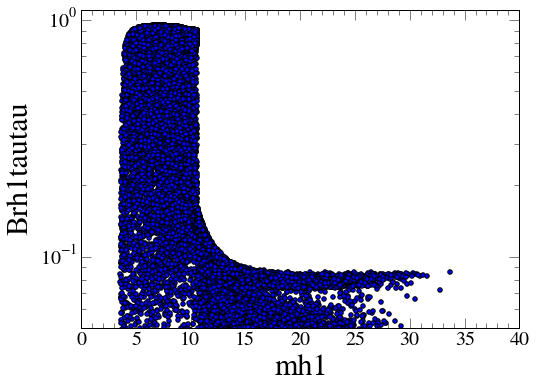

In [254]:
plot_scatter(df=df_orig, xvar='mh1', yvar='Brh1tautau')
plt.yscale('log')
plt.ylim(5E-2, 1.10)
plt.xlim(0, 40)

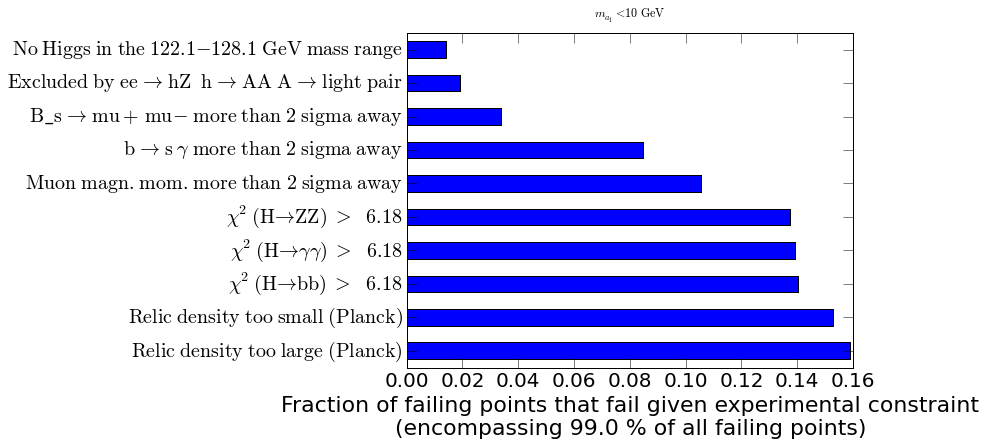

In [7]:
plot_constraints(df_orig[df_orig.ma1<10], r"$m_{a_1} < 10\ \mathrm{GeV}$", 0.99)

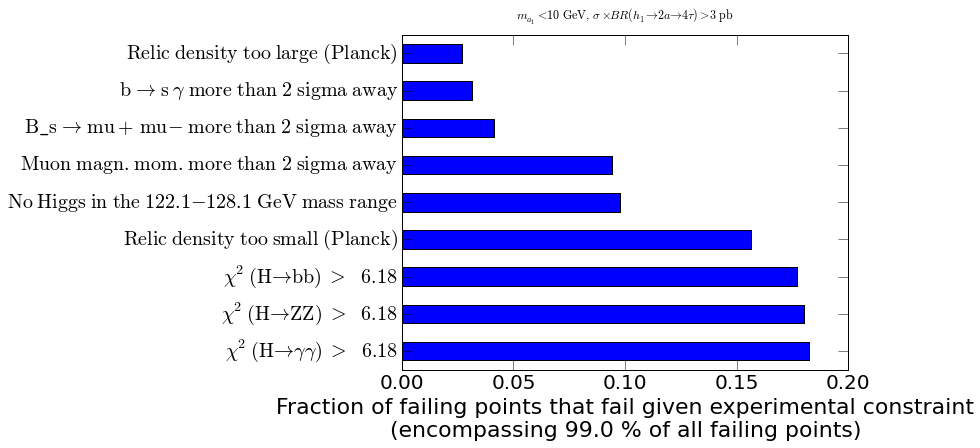

In [18]:
plot_constraints(df_orig[(df_orig.ma1<10) & (df_orig.xsec_ggf8_h1_2a_4tau>3)], 
                 r"$m_{a_1} < 10\ \mathrm{GeV},\ \sigma \times BR(h_1 \to 2a \to 4\tau) > 3\ \mathrm{pb}$", 0.99)

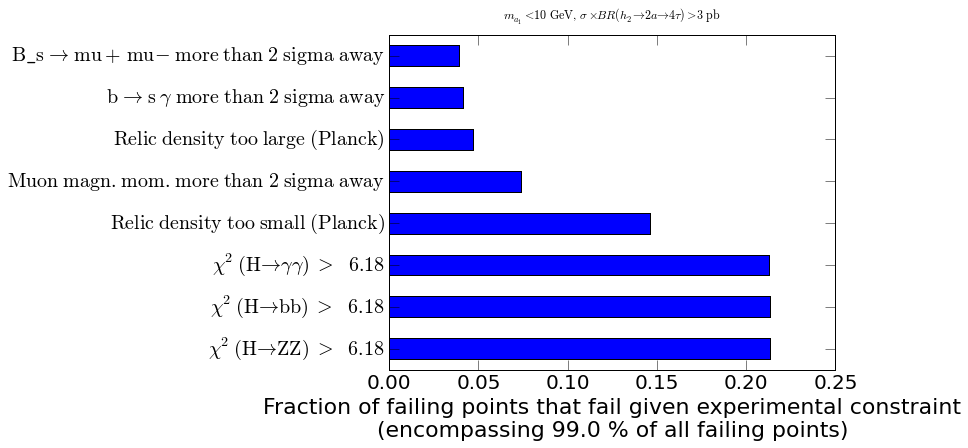

In [75]:
plot_constraints(df_orig[(df_orig.ma1<10) & (df_orig.xsec_ggf8_h2_2a_4tau>3) & 
                         (((df_orig.mh1<128) & (df_orig.mh1>122)) | ((df_orig.mh1<128) & (df_orig.mh1>122)))], 
                 r"$m_{a_1} < 10\ \mathrm{GeV},\ \sigma \times BR(h_2 \to 2a \to 4\tau) > 3\ \mathrm{pb}$", 0.99)

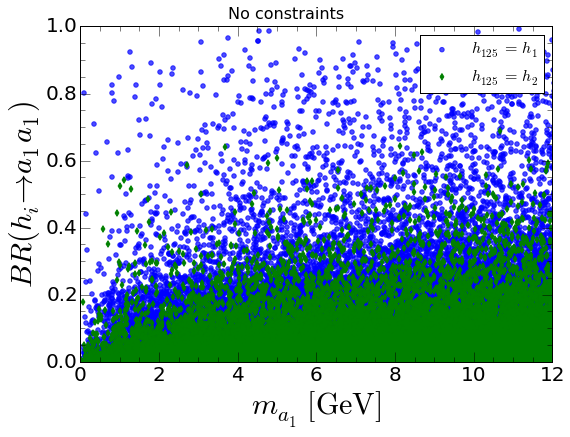

In [81]:
plot_scatter(df=df_orig[(df_orig.mh1<128) & (df_orig.mh1>122) & (df_orig.mh2>128)], xvar='ma1', yvar='Brh1a1a1', 
             xlabel=r'$m_{a_1}\ \mathrm{[GeV]}$', 
             ylabel=r'$BR(h_i\to a_1 a_1)$', alpha=0.7,
             color='blue', label=r'$h_{125}\ =\ h_1$')
plt.xlim(0, 12)
plt.ylim(0, 1)
plt.suptitle('No constraints', fontsize=16, y=1)
plot_scatter(ax=plt.gca(), df=df_orig[(df_orig.mh2<128) & (df_orig.mh2>122)], xvar='ma1', yvar='Brh2a1a1', 
             xlabel=r'$m_{a_1}\ \mathrm{[GeV]}$', 
             ylabel=r'$BR(h_i\to a_1 a_1)$', alpha=1,
             color='green', label=r'$h_{125}\ =\ h_2$', marker='d')
plt.legend(loc=0, framealpha=1, fontsize=16)

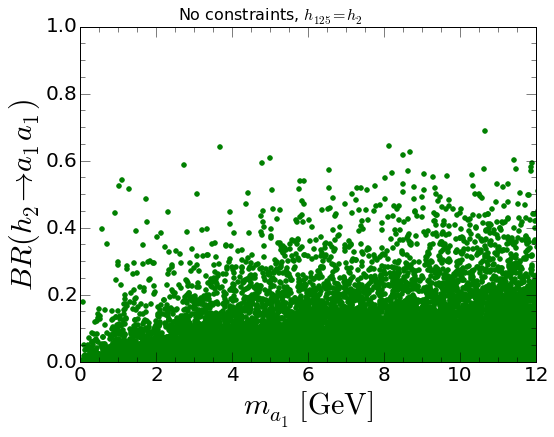

In [55]:
plot_scatter(df=df_orig[(df_orig.mh2<128) & (df_orig.mh2>122)], xvar='ma1', yvar='Brh2a1a1', 
             xlabel=r'$m_{a_1}\ \mathrm{[GeV]}$', 
             ylabel=r'$BR(h_2\to a_1 a_1)$',
             color='green')
plt.xlim(0, 12)
plt.ylim(0, 1)
plt.suptitle('No constraints, ' + r'$h_{125} = h_2$', fontsize=16, y=1)

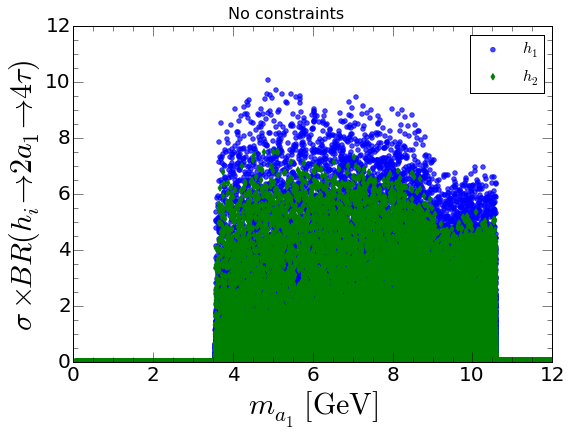

In [125]:
plot_scatter(df=df_orig, 
             xvar='ma1', yvar='xsec_ggf_h1_2a1_4tau', 
             xlabel=r'$m_{a_1}\ \mathrm{[GeV]}$', 
             ylabel=r'$\sigma \times BR (4\tau)$', alpha=0.7,
             color='blue', label=r'$h_1$')
plt.xlim(0, 12)
plt.ylim(0, 12)
# plt.ylim(0.001, 12)
# plt.yscale('log')
plt.suptitle('No constraints', fontsize=16, y=1)
plot_scatter(ax=plt.gca(), df=df_orig, 
             xvar='ma1', yvar='xsec_ggf_h2_2a1_4tau', 
             xlabel=r'$m_{a_1}\ \mathrm{[GeV]}$', 
             ylabel=r'$\sigma \times BR (h_i \to 2a_1 \to 4\tau)$', alpha=1,
             color='green', label=r'$h_2$', marker='d')
plt.legend(loc=0, framealpha=1, fontsize=16)

In [111]:
chi2_mask = df_orig.constraints.str.contains('chi2')
relic_large_mask = df_orig.constraints.str.contains('Relic density too large')
relic_small_mask = df_orig.constraints.str.contains('Relic density too small')
muon_mask = df_orig.constraints.str.contains('Muon magn. mom.')
hb_fail_mask = df_orig.HBresult == 0
# df_orig.constraints[mask]

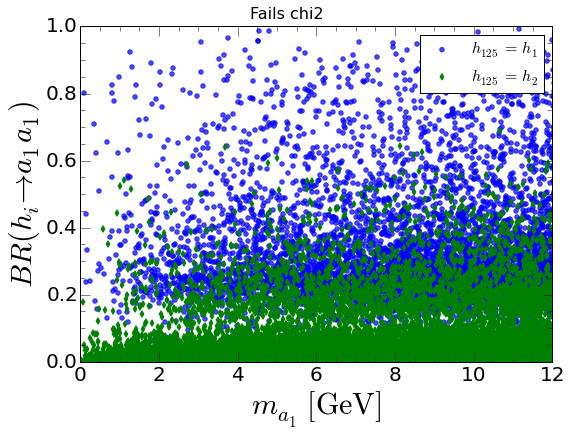

In [80]:
plot_scatter(df=df_orig[(df_orig.mh1<128) & (df_orig.mh1>122) & (df_orig.mh2>128) & chi2_mask], 
             xvar='ma1', yvar='Brh1a1a1', 
             xlabel=r'$m_{a_1}\ \mathrm{[GeV]}$', 
             ylabel=r'$BR(h_i\to a_1 a_1)$', alpha=0.7,
             color='blue', label=r'$h_{125}\ =\ h_1$')
plt.xlim(0, 12)
plt.ylim(0, 1)
plt.suptitle('Fails chi2', fontsize=16, y=1)
plot_scatter(ax=plt.gca(), df=df_orig[(df_orig.mh2<128) & (df_orig.mh2>122) & chi2_mask], 
             xvar='ma1', yvar='Brh2a1a1', 
             xlabel=r'$m_{a_1}\ \mathrm{[GeV]}$', 
             ylabel=r'$BR(h_i\to a_1 a_1)$', alpha=1,
             color='green', label=r'$h_{125}\ =\ h_2$', marker='d')
plt.legend(loc=0, framealpha=1, fontsize=16)

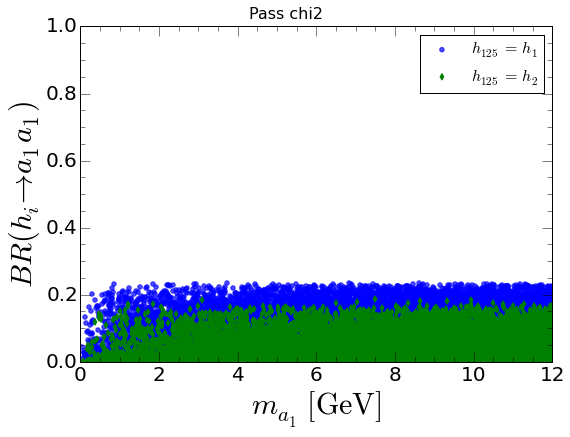

In [79]:
plot_scatter(df=df_orig[(df_orig.mh1<128) & (df_orig.mh1>122) & (df_orig.mh2>128) & ~chi2_mask], 
             xvar='ma1', yvar='Brh1a1a1', 
             xlabel=r'$m_{a_1}\ \mathrm{[GeV]}$', 
             ylabel=r'$BR(h_i\to a_1 a_1)$', alpha=0.7,
             color='blue', label=r'$h_{125}\ =\ h_1$')
plt.xlim(0, 12)
plt.ylim(0, 1)
plt.suptitle('Pass chi2', fontsize=16, y=1)
plot_scatter(ax=plt.gca(), df=df_orig[(df_orig.mh2<128) & (df_orig.mh2>122) & ~chi2_mask], 
             xvar='ma1', yvar='Brh2a1a1', 
             xlabel=r'$m_{a_1}\ \mathrm{[GeV]}$', 
             ylabel=r'$BR(h_i\to a_1 a_1)$', alpha=1,
             color='green', label=r'$h_{125}\ =\ h_2$', marker='d')
plt.legend(loc=0, framealpha=1, fontsize=16)

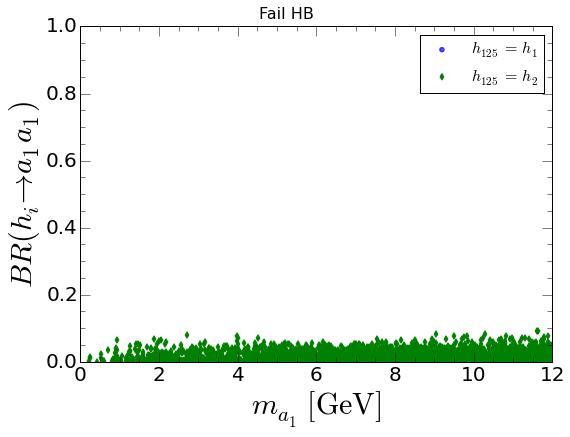

In [113]:
plot_scatter(df=df_orig[(df_orig.mh1<128) & (df_orig.mh1>122) & (df_orig.mh2>128) & hb_fail_mask], 
             xvar='ma1', yvar='Brh1a1a1', 
             xlabel=r'$m_{a_1}\ \mathrm{[GeV]}$', 
             ylabel=r'$BR(h_i\to a_1 a_1)$', alpha=0.7,
             color='blue', label=r'$h_{125}\ =\ h_1$')
plt.xlim(0, 12)
plt.ylim(0, 1)
plt.suptitle('Fail HB', fontsize=16, y=1)
plot_scatter(ax=plt.gca(), df=df_orig[(df_orig.mh2<128) & (df_orig.mh2>122) & hb_fail_mask], 
             xvar='ma1', yvar='Brh2a1a1', 
             xlabel=r'$m_{a_1}\ \mathrm{[GeV]}$', 
             ylabel=r'$BR(h_i\to a_1 a_1)$', alpha=1,
             color='green', label=r'$h_{125}\ =\ h_2$', marker='d')
plt.legend(loc=0, framealpha=1, fontsize=16)

In [128]:
from collections import Counter

In [135]:
c = Counter(df_orig[hb_fail_mask].HBchannel.values)

In [136]:
c.most_common()

[(370, 7123),
 (759, 1591),
 (1, 1161),
 (540, 205),
 (86, 158),
 (26, 108),
 (635, 16),
 (11, 1)]

It says most sensitive channel is (p p)->h2(VBF)/Zh2, h2->(invisible)  ([hep-ex] arXiv:1404.1344 (CMS)) e.g. for spectr_137_1015.dat, we have h2 as our 125 object, and
```
    29     8.48486869E-01   # ggF -> H2 -> invisible
   210     8.09320530E-01   # VBF/VH -> H2 -> invisible
```

```
     5.08397963E-03    2          21        21   # BR(H_2 -> gluon gluon)
     4.17891227E-10    2          11       -11   # BR(H_2 -> e- e+)
     1.78665572E-05    2          13       -13   # BR(H_2 -> muon muon)
     5.04764674E-03    2          15       -15   # BR(H_2 -> tau tau)
     3.40982880E-05    2           3        -3   # BR(H_2 -> s sbar)
     2.50875878E-03    2           4        -4   # BR(H_2 -> c cbar)
     4.63664022E-02    2           5        -5   # BR(H_2 -> b bbar)
     2.25713549E-02    2          24       -24   # BR(H_2 -> W+ W-)
     2.61080008E-03    2          23        23   # BR(H_2 -> Z Z)
     2.42696457E-04    2          22        22   # BR(H_2 -> gamma gamma)
     1.72640045E-04    2          23        22   # BR(H_2 -> Z gamma)
     3.33446908E-02    2          36        36   # BR(H_2 -> A_1 A_1)
     5.58104853E-09    2          23        36   # BR(H_2 -> A_1 Z)
     8.81999060E-01    2     1000022   1000022   # BR(H_2 -> neu_1 neu_1)
```

(but channel 370 is not h -> invis?! but   (p p-bar)->W(h1)->W W W->l l nu n?!)

Channel 759 is (p p)->h1/VBF/Wh1/Zh1/tth1->gamma gamma  ([hep-ex] arXiv:1407.6583) (e.g. spectr_137_1066.dat)
(then again prob doesnt have a h in the right mass range)

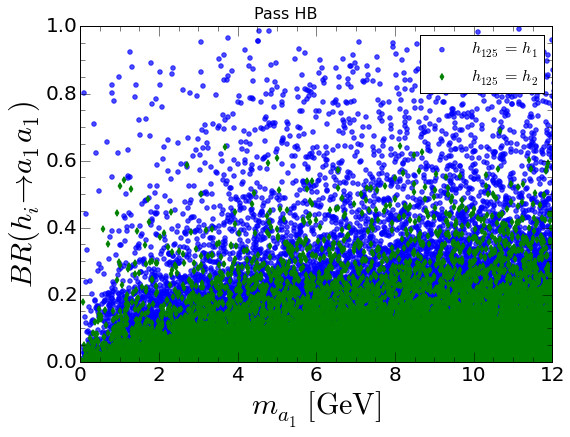

In [114]:
plot_scatter(df=df_orig[(df_orig.mh1<128) & (df_orig.mh1>122) & (df_orig.mh2>128) & ~hb_fail_mask], 
             xvar='ma1', yvar='Brh1a1a1', 
             xlabel=r'$m_{a_1}\ \mathrm{[GeV]}$', 
             ylabel=r'$BR(h_i\to a_1 a_1)$', alpha=0.7,
             color='blue', label=r'$h_{125}\ =\ h_1$')
plt.xlim(0, 12)
plt.ylim(0, 1)
plt.suptitle('Pass HB', fontsize=16, y=1)
plot_scatter(ax=plt.gca(), df=df_orig[(df_orig.mh2<128) & (df_orig.mh2>122) & ~hb_fail_mask], 
             xvar='ma1', yvar='Brh2a1a1', 
             xlabel=r'$m_{a_1}\ \mathrm{[GeV]}$', 
             ylabel=r'$BR(h_i\to a_1 a_1)$', alpha=1,
             color='green', label=r'$h_{125}\ =\ h_2$', marker='d')
plt.legend(loc=0, framealpha=1, fontsize=16)

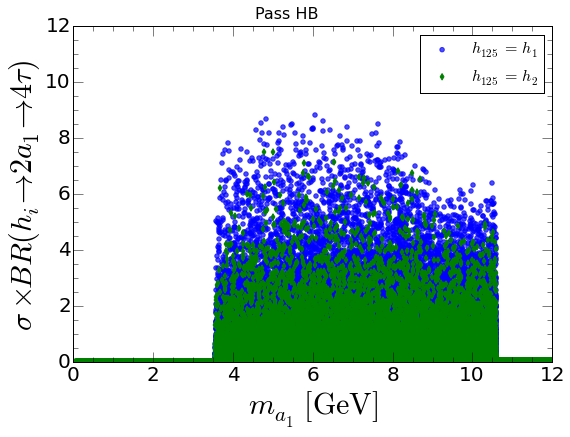

In [123]:
plot_scatter(df=df_orig[(df_orig.mh1<128) & (df_orig.mh1>122) & (df_orig.mh2>128) &~hb_fail_mask], 
             xvar='ma1', yvar='xsec_ggf_h1_2a1_4tau', 
             xlabel=r'$m_{a_1}\ \mathrm{[GeV]}$', 
             ylabel=r'$\sigma \times BR (4\tau)$', alpha=0.7,
             color='blue', label=r'$h_{125}\ =\ h_1$')
plt.xlim(0, 12)
plt.ylim(0, 12)
# plt.ylim(0.001, 12)
# plt.yscale('log')
plt.suptitle('Pass HB', fontsize=16, y=1)
plot_scatter(ax=plt.gca(), df=df_orig[(df_orig.mh2<128) & (df_orig.mh2>122) & ~hb_fail_mask], 
             xvar='ma1', yvar='xsec_ggf_h2_2a1_4tau', 
             xlabel=r'$m_{a_1}\ \mathrm{[GeV]}$', 
             ylabel=r'$\sigma \times BR (h_i \to 2a_1 \to 4\tau)$', alpha=1,
             color='green', label=r'$h_{125}\ =\ h_2$', marker='d')
plt.legend(loc=0, framealpha=1, fontsize=16)

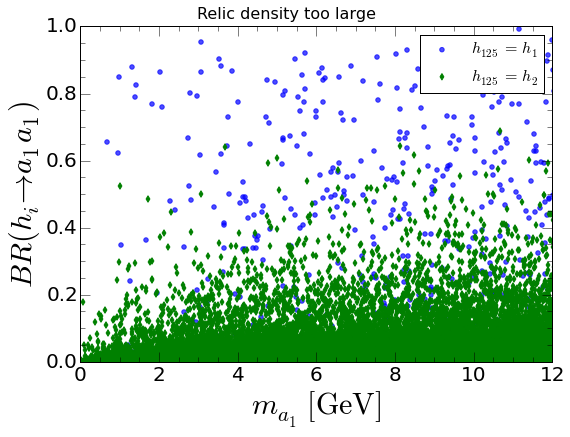

In [85]:
plot_scatter(df=df_orig[(df_orig.mh1<128) & (df_orig.mh1>122) & (df_orig.mh2>128) & relic_large_mask], 
             xvar='ma1', yvar='Brh1a1a1', 
             xlabel=r'$m_{a_1}\ \mathrm{[GeV]}$', 
             ylabel=r'$BR(h_i\to a_1 a_1)$', alpha=0.7,
             color='blue', label=r'$h_{125}\ =\ h_1$')
plt.xlim(0, 12)
plt.ylim(0, 1)
plt.suptitle('Relic density too large', fontsize=16, y=1)
plot_scatter(ax=plt.gca(), df=df_orig[(df_orig.mh2<128) & (df_orig.mh2>122) & relic_large_mask], 
             xvar='ma1', yvar='Brh2a1a1', 
             xlabel=r'$m_{a_1}\ \mathrm{[GeV]}$', 
             ylabel=r'$BR(h_i\to a_1 a_1)$', alpha=1,
             color='green', label=r'$h_{125}\ =\ h_2$', marker='d')
plt.legend(loc=0, framealpha=1, fontsize=16)

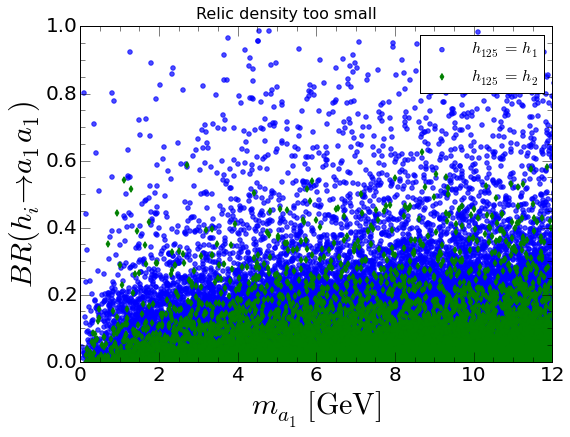

In [83]:
plot_scatter(df=df_orig[(df_orig.mh1<128) & (df_orig.mh1>122) & (df_orig.mh2>128) & relic_small_mask], 
             xvar='ma1', yvar='Brh1a1a1', 
             xlabel=r'$m_{a_1}\ \mathrm{[GeV]}$', 
             ylabel=r'$BR(h_i\to a_1 a_1)$', alpha=0.7,
             color='blue', label=r'$h_{125}\ =\ h_1$')
plt.xlim(0, 12)
plt.ylim(0, 1)
plt.suptitle('Relic density too small', fontsize=16, y=1)
plot_scatter(ax=plt.gca(), df=df_orig[(df_orig.mh2<128) & (df_orig.mh2>122) & relic_small_mask], 
             xvar='ma1', yvar='Brh2a1a1', 
             xlabel=r'$m_{a_1}\ \mathrm{[GeV]}$', 
             ylabel=r'$BR(h_i\to a_1 a_1)$', alpha=1,
             color='green', label=r'$h_{125}\ =\ h_2$', marker='d')
plt.legend(loc=0, framealpha=1, fontsize=16)

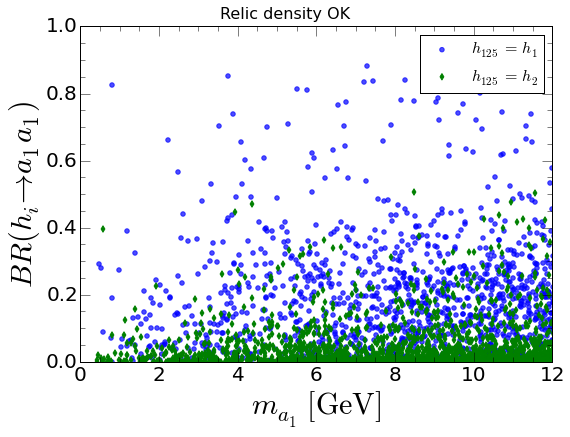

In [90]:
plot_scatter(df=df_orig[(df_orig.mh1<128) & (df_orig.mh1>122) & (df_orig.mh2>128) & ~relic_small_mask & ~relic_large_mask], xvar='ma1', yvar='Brh1a1a1', 
             xlabel=r'$m_{a_1}\ \mathrm{[GeV]}$', 
             ylabel=r'$BR(h_i\to a_1 a_1)$', alpha=0.7,
             color='blue', label=r'$h_{125}\ =\ h_1$')
plt.xlim(0, 12)
plt.ylim(0, 1)
plt.suptitle('Relic density OK', fontsize=16, y=1)
plot_scatter(ax=plt.gca(), df=df_orig[(df_orig.mh2<128) & (df_orig.mh2>122) & ~relic_small_mask & ~relic_large_mask], xvar='ma1', yvar='Brh2a1a1', 
             xlabel=r'$m_{a_1}\ \mathrm{[GeV]}$', 
             ylabel=r'$BR(h_i\to a_1 a_1)$', alpha=1,
             color='green', label=r'$h_{125}\ =\ h_2$', marker='d')
plt.legend(loc=0, framealpha=1, fontsize=16)

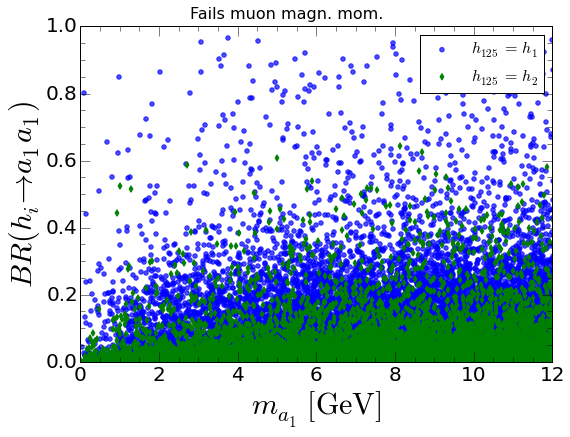

In [92]:
plot_scatter(df=df_orig[(df_orig.mh1<128) & (df_orig.mh1>122) & (df_orig.mh2>128) & muon_mask], xvar='ma1', yvar='Brh1a1a1', 
             xlabel=r'$m_{a_1}\ \mathrm{[GeV]}$', 
             ylabel=r'$BR(h_i\to a_1 a_1)$', alpha=0.7,
             color='blue', label=r'$h_{125}\ =\ h_1$')
plt.xlim(0, 12)
plt.ylim(0, 1)
plt.suptitle('Fails muon magn. mom.', fontsize=16, y=1)
plot_scatter(ax=plt.gca(), df=df_orig[(df_orig.mh2<128) & (df_orig.mh2>122) & muon_mask], xvar='ma1', yvar='Brh2a1a1', 
             xlabel=r'$m_{a_1}\ \mathrm{[GeV]}$', 
             ylabel=r'$BR(h_i\to a_1 a_1)$', alpha=1,
             color='green', label=r'$h_{125}\ =\ h_2$', marker='d')
plt.legend(loc=0, framealpha=1, fontsize=16)

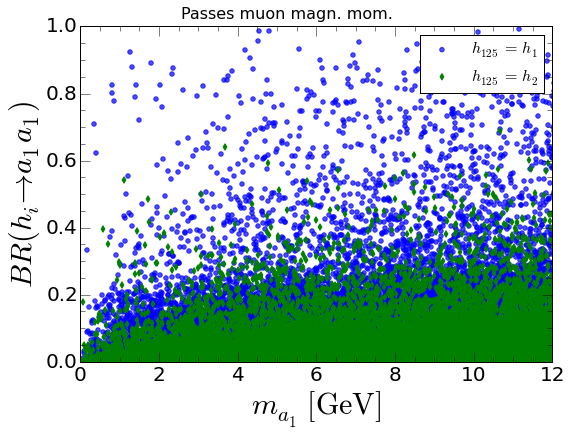

In [94]:
plot_scatter(df=df_orig[(df_orig.mh1<128) & (df_orig.mh1>122) & (df_orig.mh2>128) & ~muon_mask], xvar='ma1', yvar='Brh1a1a1', 
             xlabel=r'$m_{a_1}\ \mathrm{[GeV]}$', 
             ylabel=r'$BR(h_i\to a_1 a_1)$', alpha=0.7,
             color='blue', label=r'$h_{125}\ =\ h_1$')
plt.xlim(0, 12)
plt.ylim(0, 1)
plt.suptitle('Passes muon magn. mom.', fontsize=16, y=1)
plot_scatter(ax=plt.gca(), df=df_orig[(df_orig.mh2<128) & (df_orig.mh2>122) & ~muon_mask], xvar='ma1', yvar='Brh2a1a1', 
             xlabel=r'$m_{a_1}\ \mathrm{[GeV]}$', 
             ylabel=r'$BR(h_i\to a_1 a_1)$', alpha=1,
             color='green', label=r'$h_{125}\ =\ h_2$', marker='d')
plt.legend(loc=0, framealpha=1, fontsize=16)

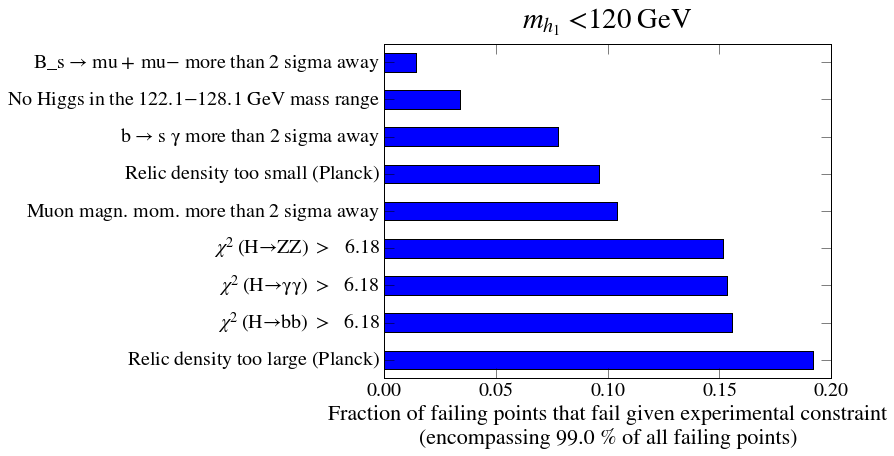

In [241]:
plot_constraints(df_orig[df_orig.mh1<120], r"$m_{h_1} < 120\ \mathrm{GeV}$", 0.99)

In [7]:
# plot_input_params_hists(df_orig, "N", "No constraints", bins=25)

/Users/robina/.virtualenvs/NMSSMScan/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


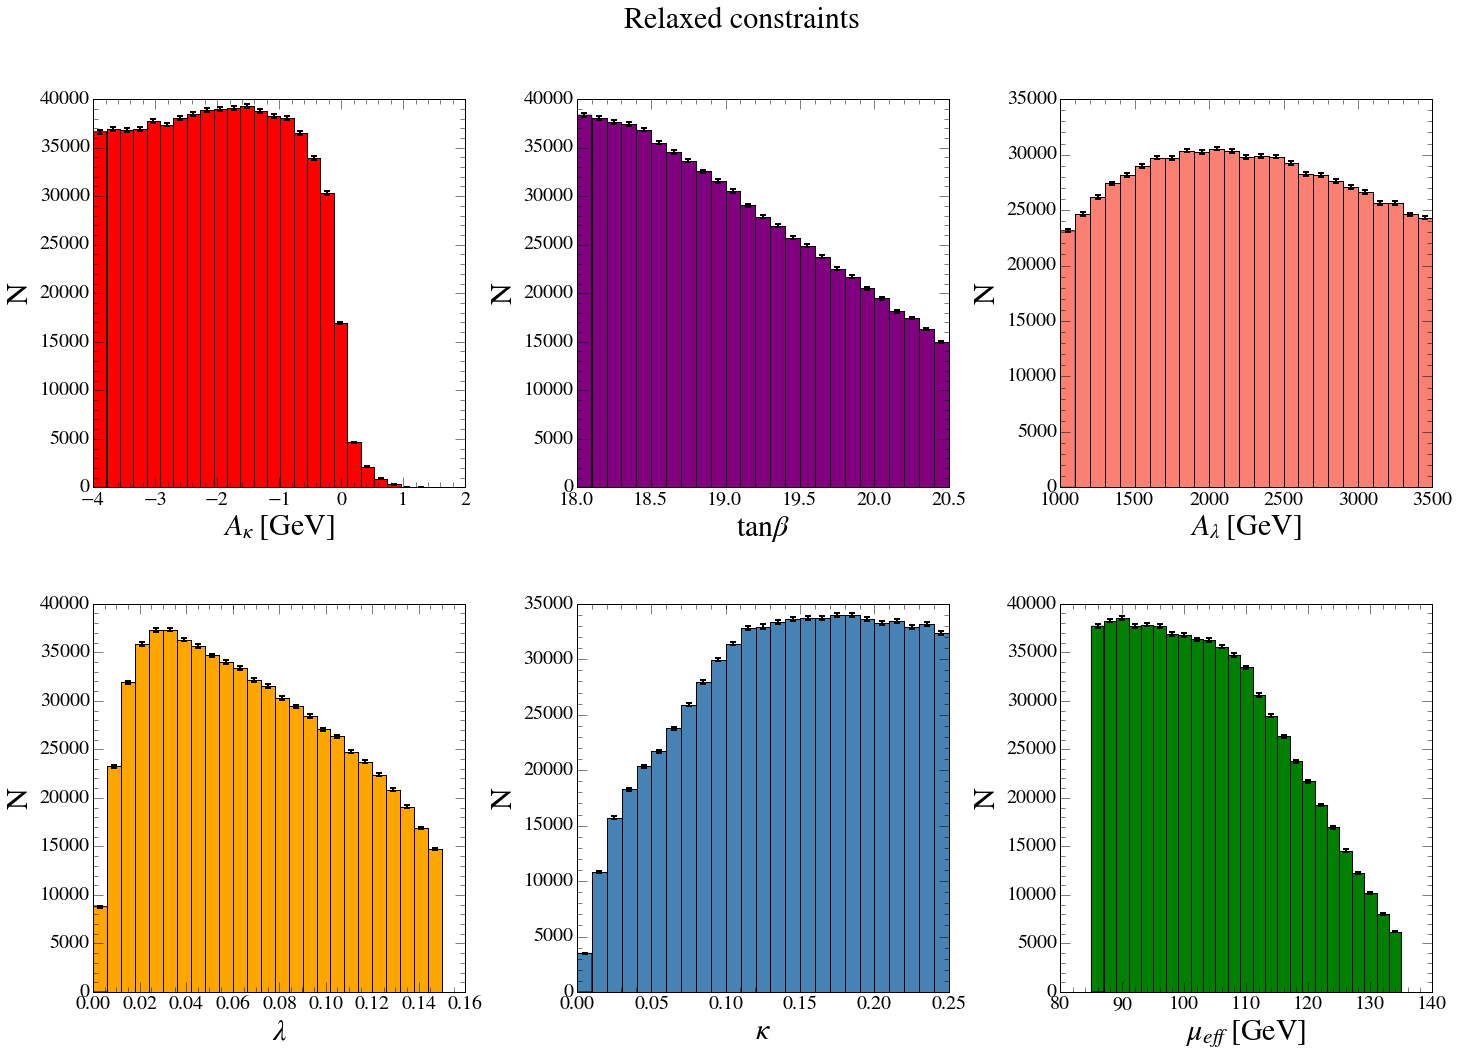

In [8]:
plot_input_params_hists(df_pass_all, "N", "Relaxed constraints", bins=25)

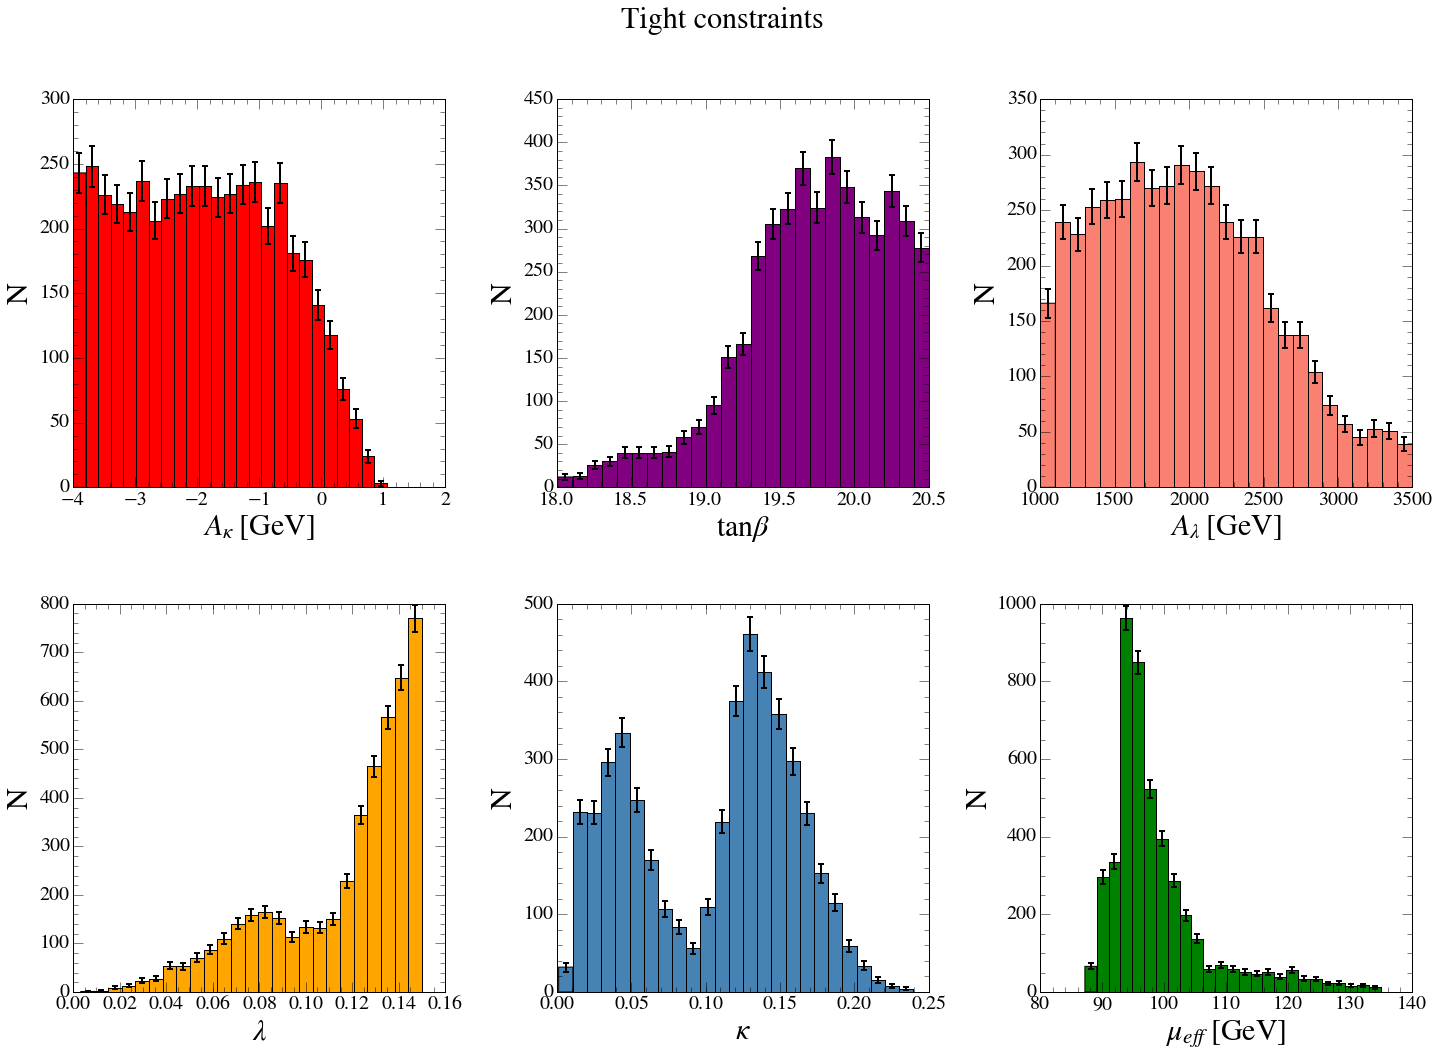

In [9]:
plot_input_params_hists(df_pass_all_strict, "N", "Tight constraints", bins=25)

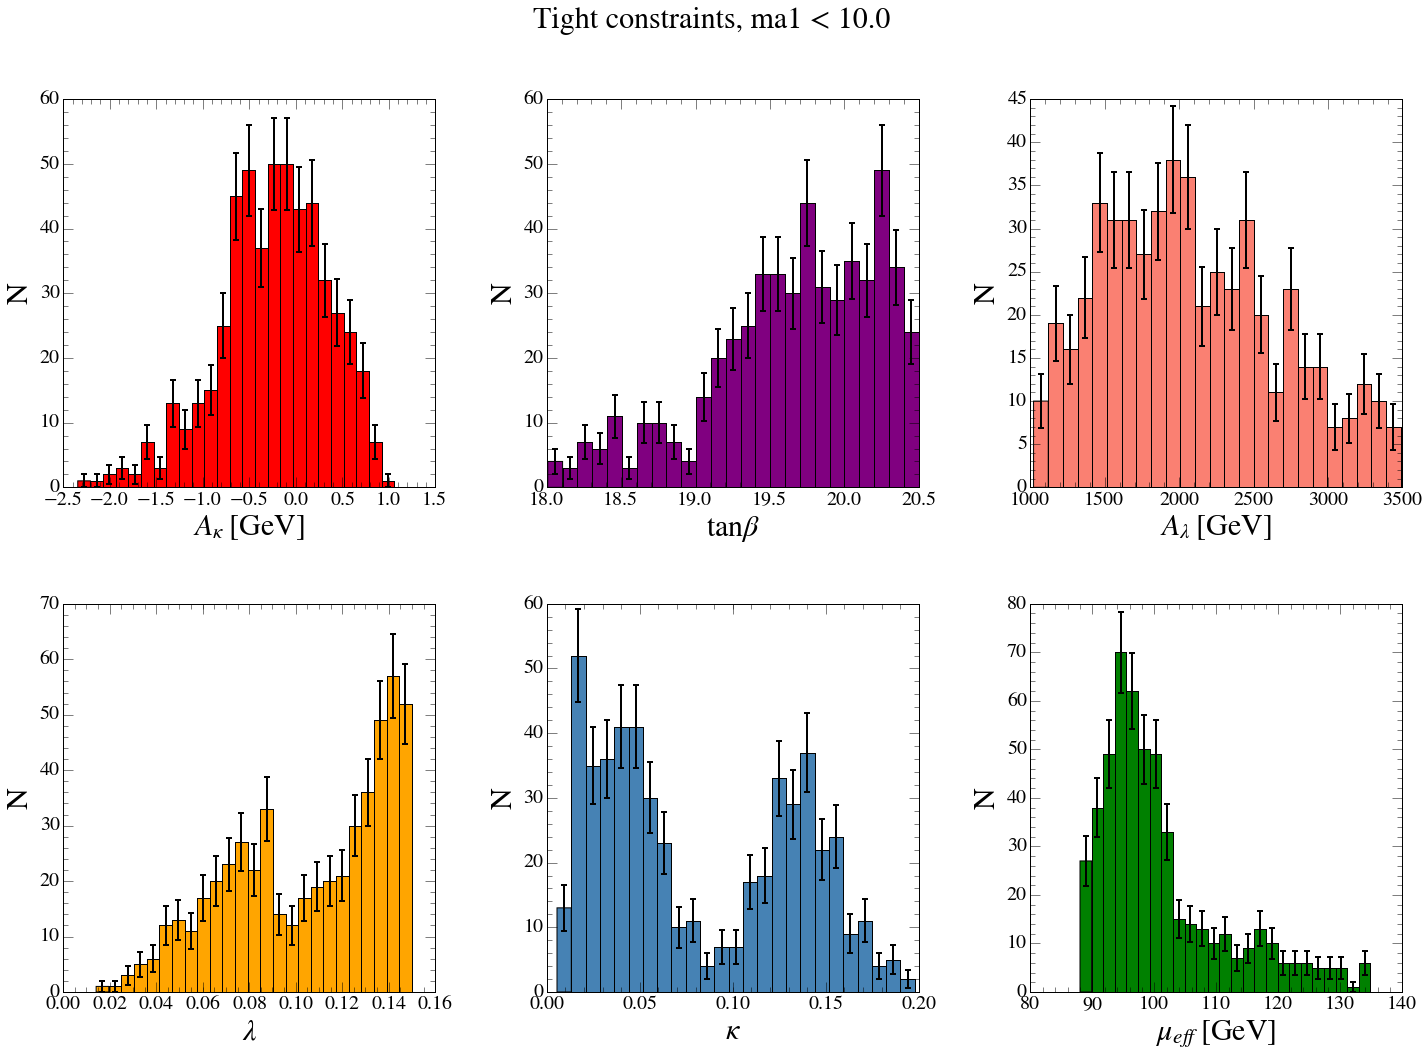

In [10]:
m = 10
plot_input_params_hists(df_pass_all_strict[df_pass_all_strict.ma1 < m], "N", "Tight constraints, ma1 < %.1f" % m, bins=25)

In [11]:
# plot_input_params_scatters(df_orig, 'ma1', r"$m_{a_1}$", title="No constraints")

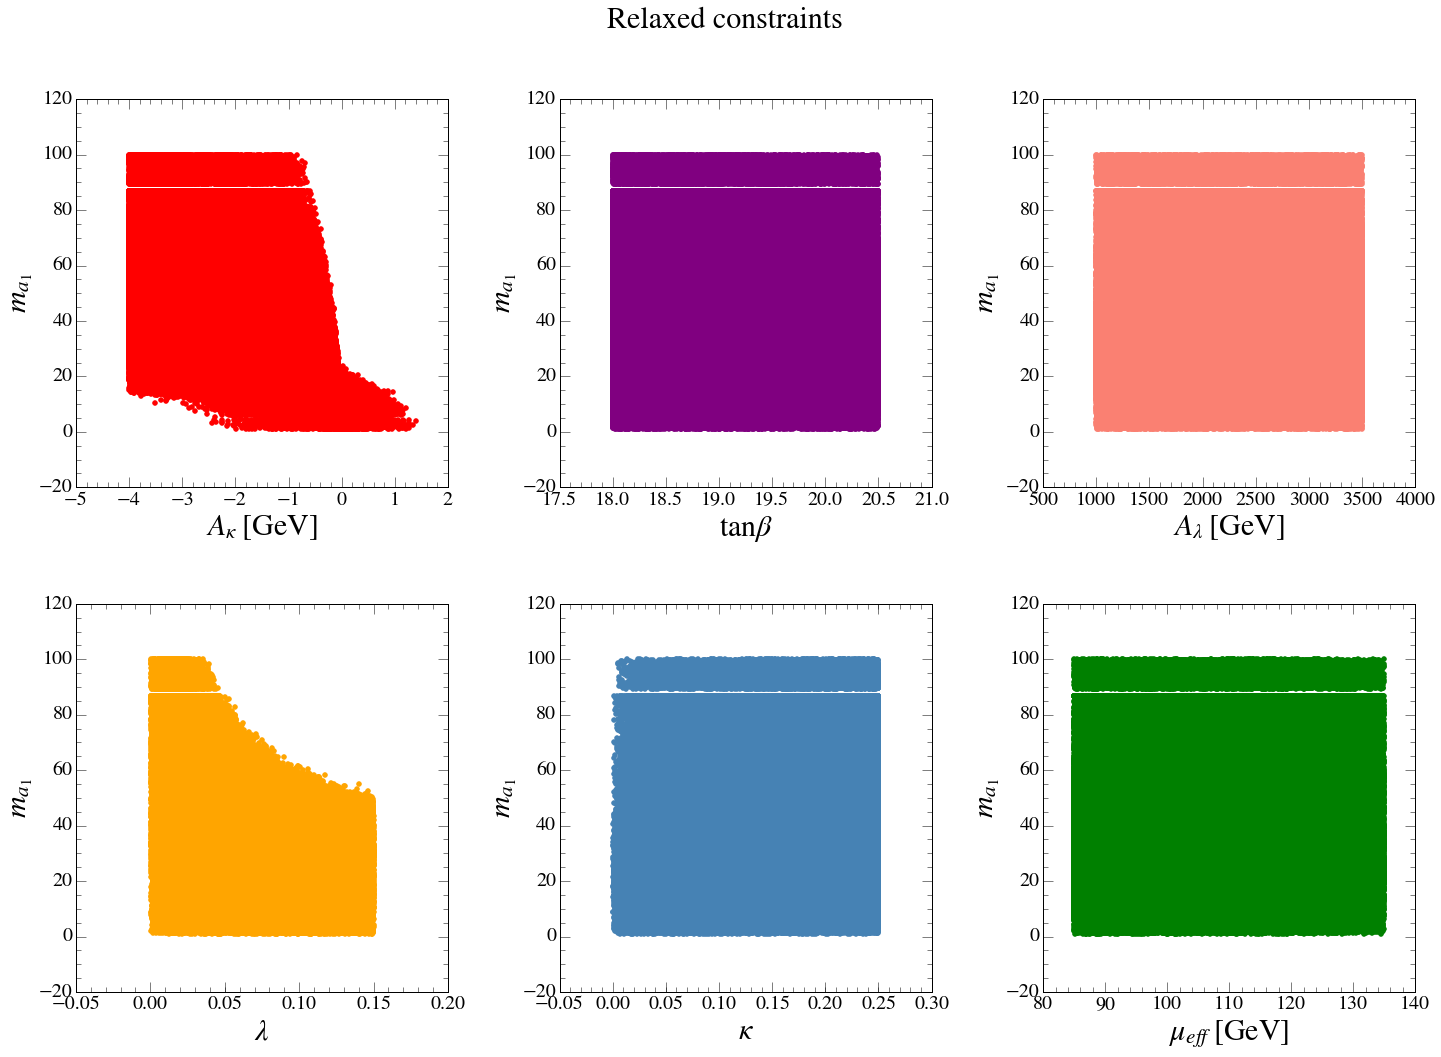

In [12]:
plot_input_params_scatters(df_pass_all, 'ma1', r"$m_{a_1}$", title="Relaxed constraints")

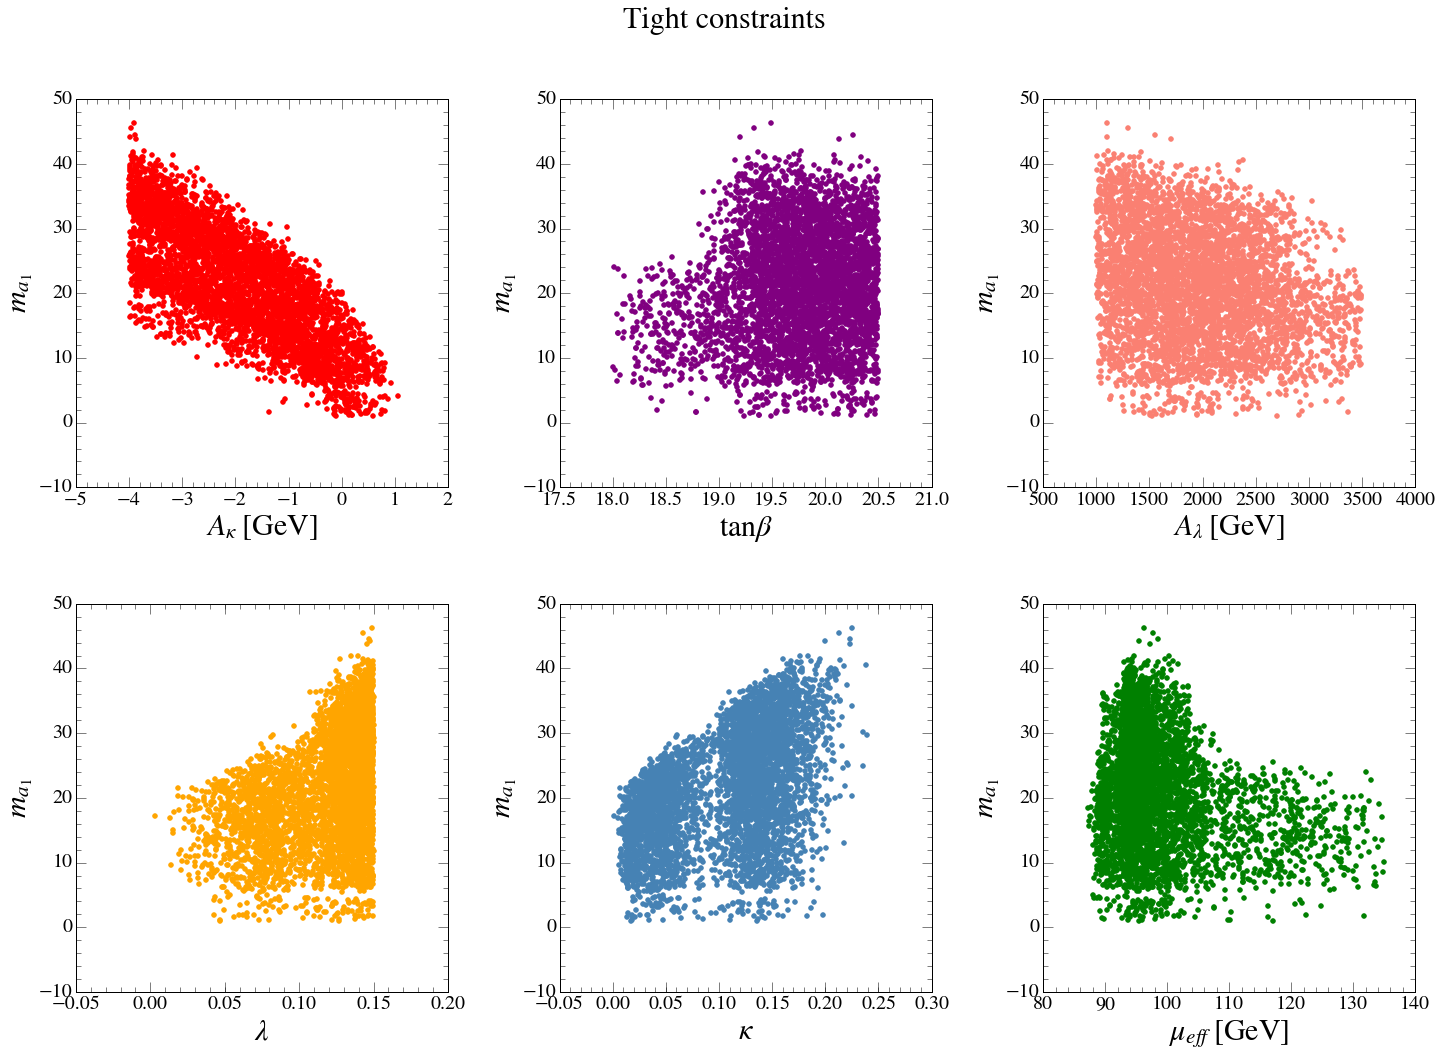

In [13]:
plot_input_params_scatters(df_pass_all_strict, 'ma1', r"$m_{a_1}$", title="Tight constraints")

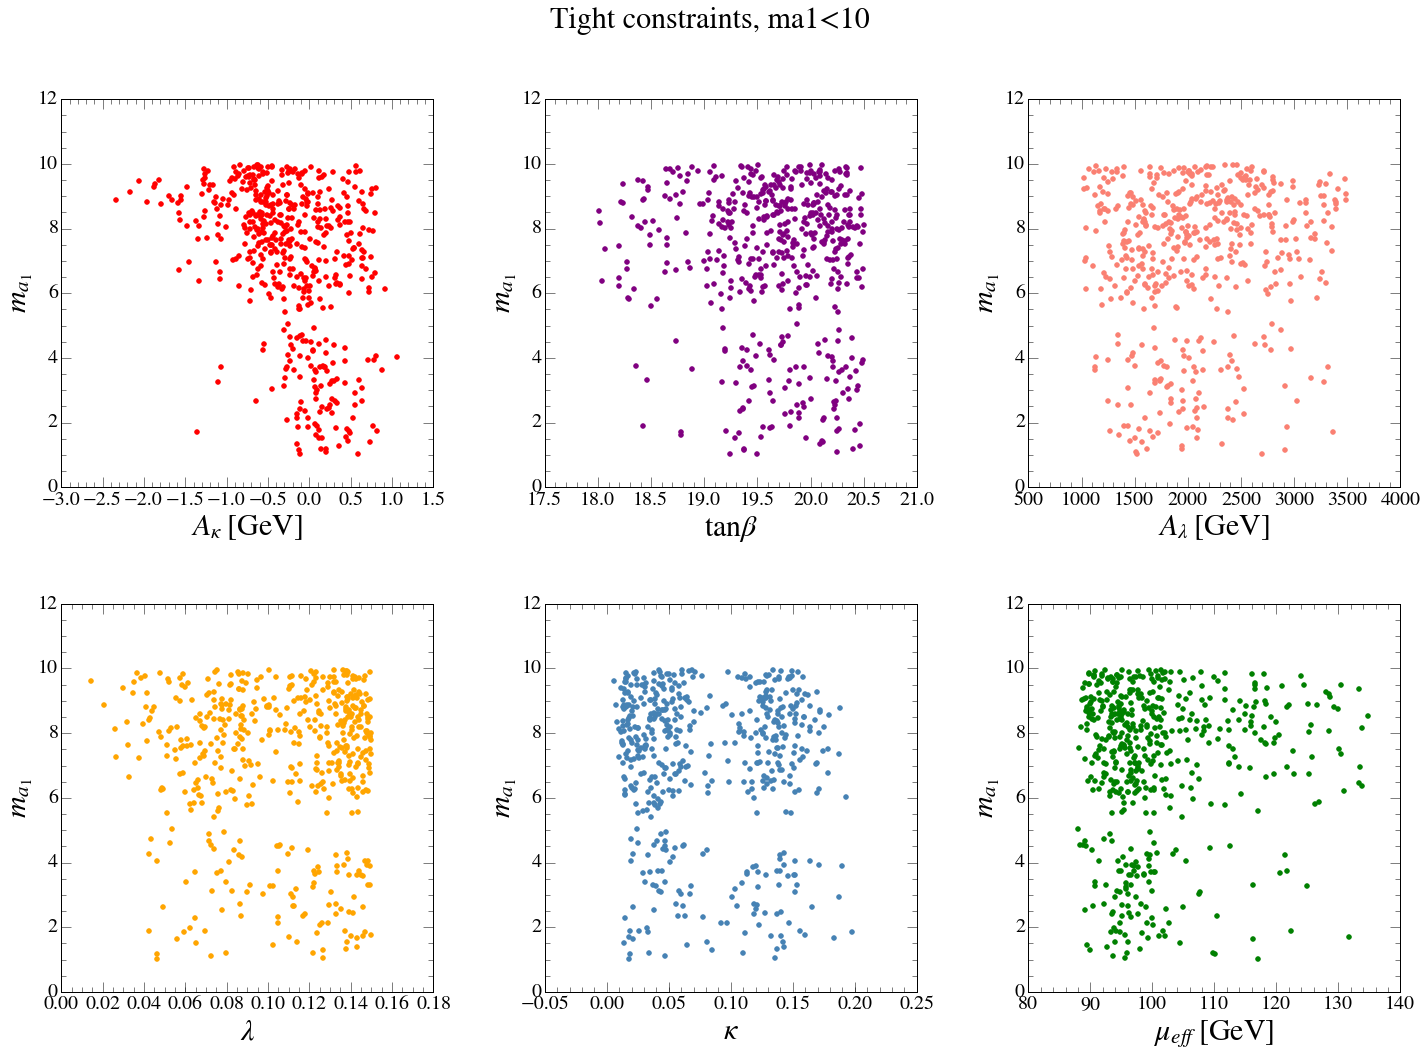

In [14]:
plot_input_params_scatters(df_pass_all_strict_ma1Lt10, 'ma1', r"$m_{a_1}$", title="Tight constraints, ma1<10")

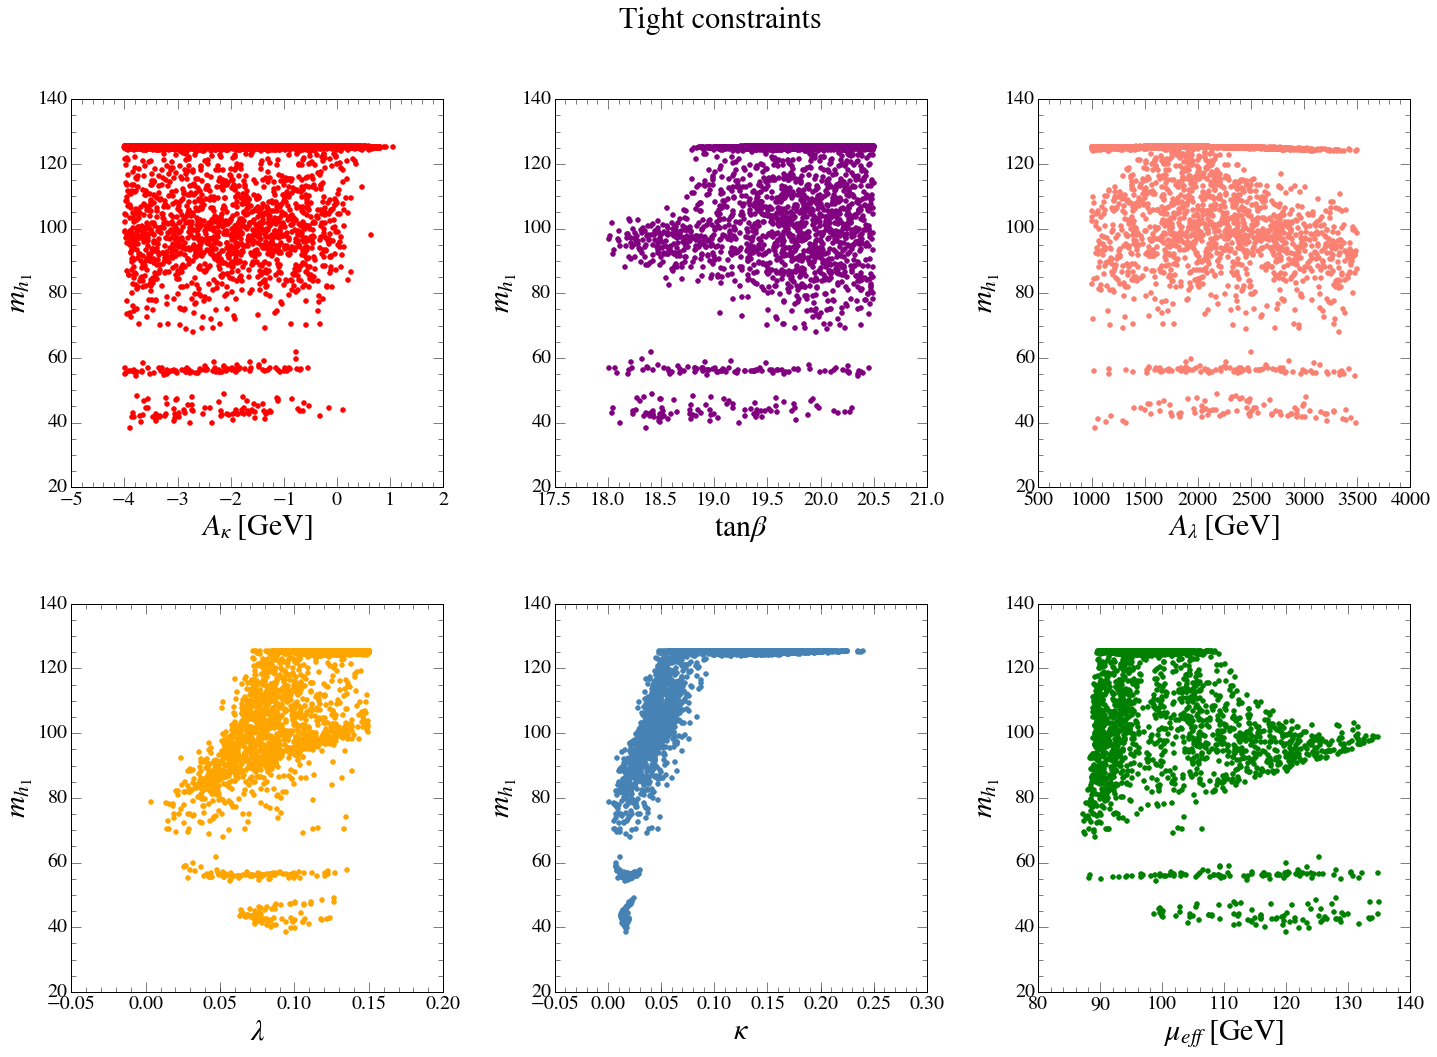

In [15]:
plot_input_params_scatters(df_pass_all_strict, 'mh1', r"$m_{h_1}$", title="Tight constraints")

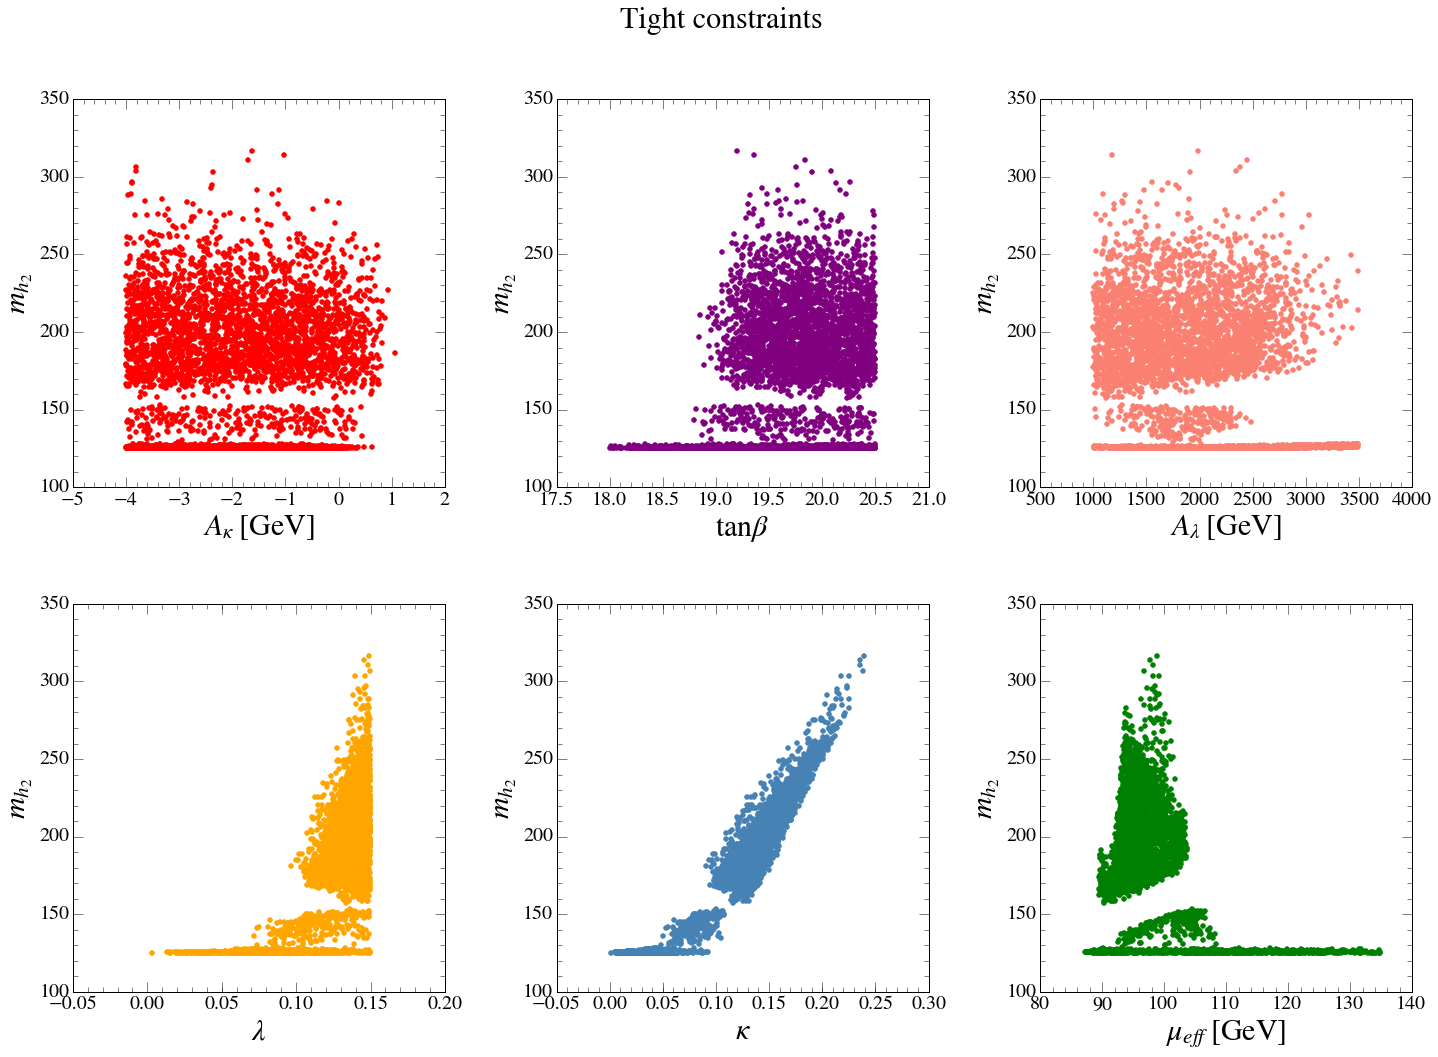

In [16]:
plot_input_params_scatters(df_pass_all_strict, 'mh2', r"$m_{h_2}$", title="Tight constraints")

(<matplotlib.axes._subplots.AxesSubplot at 0x144990690>,
 array([  0.,   0.,  10.,  16.,  12.,  11.,  16.,  18.,  15.,  10.,   2.,
         14.,  35.,  34.,  41.,  49.,  64.,  61.,  53.,  60.]),
 array([  0. ,   0.5,   1. ,   1.5,   2. ,   2.5,   3. ,   3.5,   4. ,
          4.5,   5. ,   5.5,   6. ,   6.5,   7. ,   7.5,   8. ,   8.5,
          9. ,   9.5,  10. ]),
 <a list of 20 Patch objects>)

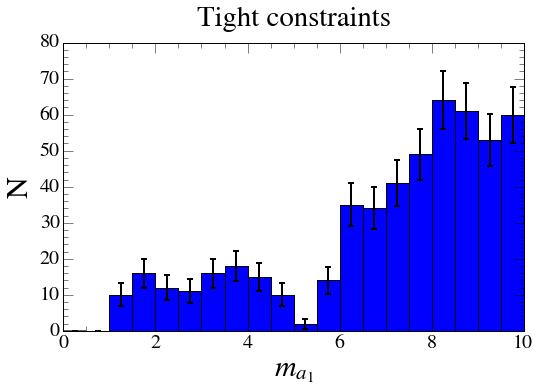

In [17]:
plot_histogram(var='ma1', df=df_pass_all_strict[df_pass_all_strict.ma1<10], 
               xlabel=r'$m_{a_1}$', ylabel='N', title='Tight constraints', bins=20, range=[0,10])

(<matplotlib.axes._subplots.AxesSubplot at 0x1451c0b50>,
 <matplotlib.collections.PathCollection at 0x143af3250>)

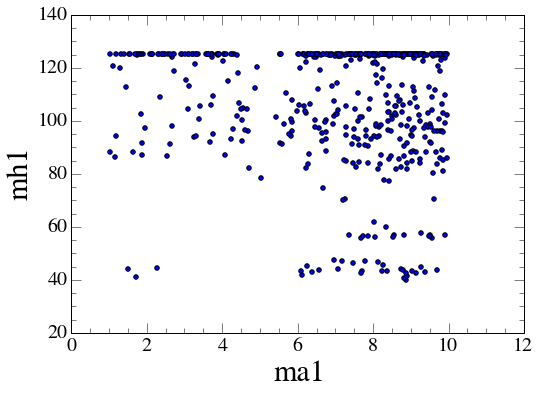

In [18]:
plot_scatter(xvar='ma1', yvar='mh1', df=df_pass_all_strict_ma1Lt10)

(<matplotlib.axes._subplots.AxesSubplot at 0x103627850>,
 <matplotlib.collections.PathCollection at 0x143b69790>)

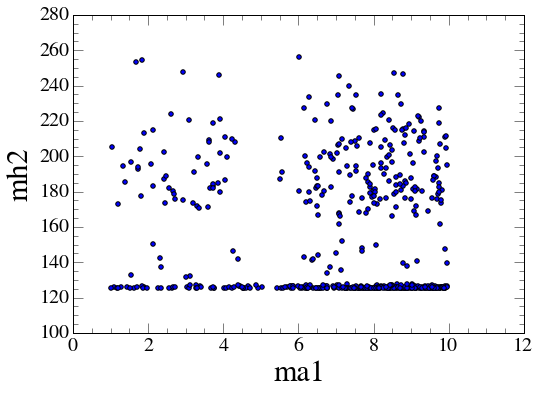

In [19]:
plot_scatter(xvar='ma1', yvar='mh2', df=df_pass_all_strict_ma1Lt10)

In [20]:
df_pass_all.columns

Index([u'mtau', u'mh1', u'mh2', u'mh3', u'ma1', u'ma2', u'mhc', u'mstop1',
       u'mstop2', u'msbottom1', u'msbottom2', u'tgbeta', u'mueff', u'lambda_',
       u'kappa', u'alambda', u'akappa', u'm0', u'm12', u'a0', u'm3', u'mu3',
       u'mq3', u'au3', u'ad3', u'md3', u'Brh1gg', u'Brh1tautau', u'Brh1cc',
       u'Brh1bb', u'Brh1ww', u'Brh1zz', u'Brh1gammagamma', u'Brh1zgamma',
       u'Brh1a1a1', u'Brh1a1z', u'Brh2gg', u'Brh2tautau', u'Brh2bb', u'Brh2ww',
       u'Brh2zz', u'Brh2gammagamma', u'Brh2zgamma', u'Brh2a1a1', u'Brh2a1z',
       u'Brh2h1h1', u'Brh3gg', u'Brh3tautau', u'Brh3bb', u'Brh3ww', u'Brh3zz',
       u'Brh3gammagamma', u'Brh3zgamma', u'Brh3h1h1', u'Brh3h2h2', u'Brh3h1h2',
       u'Brh3a1a1', u'Brh3a1z', u'Bra1mumu', u'Bra1tautau', u'Bra1bb',
       u'Bra1gg', u'Bra1cc', u'Bra1ss', u'h1ggrc2', u'h1bbrc2', u'h1vvrc2',
       u'h2ggrc2', u'h2bbrc2', u'h2vvrc2', u'h3ggrc2', u'h3bbrc2', u'h3vvrc2',
       u'a1ggrc2', u'a1tautaurc2', u'a1bbrc2', u'omega', u'dmdiag1',
       u

In [8]:
df_pass_all_strict.loc[:, 'xsec_ggh18'] = df_pass_all_strict['xsec_ggf8_h1'] * df_pass_all_strict['h1ggrc2']
df_pass_all_strict.loc[:, 'xsec_ggh28'] = df_pass_all_strict['xsec_ggf8_h2'] * df_pass_all_strict['h2ggrc2']
df_pass_all_strict.loc[:, 'xsec_ggh113'] = df_pass_all_strict['xsec_ggf13_h1'] * df_pass_all_strict['h1ggrc2']
df_pass_all_strict.loc[:, 'xsec_ggh213'] = df_pass_all_strict['xsec_ggf13_h2'] * df_pass_all_strict['h2ggrc2']

/Users/robina/.virtualenvs/NMSSMScan/lib/python2.7/site-packages/pandas/core/indexing.py:284: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/robina/.virtualenvs/NMSSMScan/lib/python2.7/site-packages/pandas/core/indexing.py:461: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [9]:
df_pass_all_strict.loc[:, 'xsec_ggf8_h1_2a_4tau'] = df_pass_all_strict['xsec_ggf8_h1'] * df_pass_all_strict['h1ggrc2'] * df_pass_all_strict['Brh1a1a1'] * df_pass_all_strict.Bra1tautau * df_pass_all_strict.Bra1tautau
df_pass_all_strict.loc[:, 'xsec_ggf13_h1_2a_4tau'] = df_pass_all_strict['xsec_ggf13_h1'] * df_pass_all_strict['h1ggrc2'] * df_pass_all_strict['Brh1a1a1'] * df_pass_all_strict.Bra1tautau * df_pass_all_strict.Bra1tautau

In [16]:
df_orig.loc[:, 'xsec_ggf8_h1_2a_4tau'] = df_orig['xsec_ggf8_h1'] * df_orig['h1ggrc2'] * df_orig['Brh1a1a1'] * df_orig.Bra1tautau * df_orig.Bra1tautau
df_orig.loc[:, 'xsec_ggf13_h1_2a_4tau'] = df_orig['xsec_ggf13_h1'] * df_orig['h1ggrc2'] * df_orig['Brh1a1a1'] * df_orig.Bra1tautau * df_orig.Bra1tautau

(<matplotlib.axes._subplots.AxesSubplot at 0x1e0a13e90>,
 <matplotlib.collections.PathCollection at 0x1e0b3ad10>)

/Users/robina/.virtualenvs/NMSSMScan/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


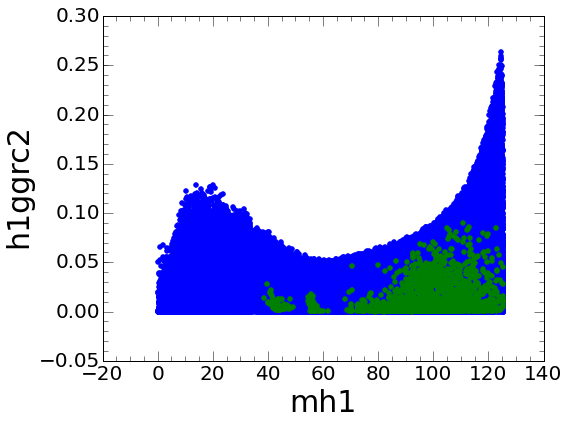

In [10]:
plot_scatter(df=df_orig[(df_orig.mh2>122) & (df_orig.mh2<128)], xvar='mh1', yvar='h1ggrc2', color='blue')
plot_scatter(df=df_pass_all_strict[(df_pass_all_strict.mh2>122) & (df_pass_all_strict.mh2<128)], xvar='mh1', yvar='h1ggrc2', ax=plt.gca(), color='green')

In [11]:
df_pass_all_strict.loc[:, 'xsec_ggf8_h2_2a_4tau'] = df_pass_all_strict['xsec_ggf8_h2'] * df_pass_all_strict['h2ggrc2'] * df_pass_all_strict['Brh2a1a1'] * df_pass_all_strict.Bra1tautau * df_pass_all_strict.Bra1tautau
df_pass_all_strict.loc[:, 'xsec_ggf13_h2_2a_4tau'] = df_pass_all_strict['xsec_ggf13_h2'] * df_pass_all_strict['h2ggrc2'] * df_pass_all_strict['Brh2a1a1'] * df_pass_all_strict.Bra1tautau * df_pass_all_strict.Bra1tautau

In [17]:
df_orig.loc[:, 'xsec_ggf8_h2_2a_4tau'] = df_orig['xsec_ggf8_h2'] * df_orig['h2ggrc2'] * df_orig['Brh2a1a1'] * df_orig.Bra1tautau * df_orig.Bra1tautau
df_orig.loc[:, 'xsec_ggf13_h2_2a_4tau'] = df_orig['xsec_ggf13_h2'] * df_orig['h2ggrc2'] * df_orig['Brh2a1a1'] * df_orig.Bra1tautau * df_orig.Bra1tautau

In [12]:
df_pass_all_strict.loc[:, 'xsec_ggf8_h2_2h1_4tau'] = df_pass_all_strict['xsec_ggf8_h2'] * df_pass_all_strict['h2ggrc2'] * df_pass_all_strict['Brh2h1h1'] * df_pass_all_strict.Brh1tautau * df_pass_all_strict.Brh1tautau
df_pass_all_strict.loc[:, 'xsec_ggf13_h2_2h1_4tau'] = df_pass_all_strict['xsec_ggf13_h2'] * df_pass_all_strict['h2ggrc2'] * df_pass_all_strict['Brh2h1h1'] * df_pass_all_strict.Brh1tautau * df_pass_all_strict.Brh1tautau

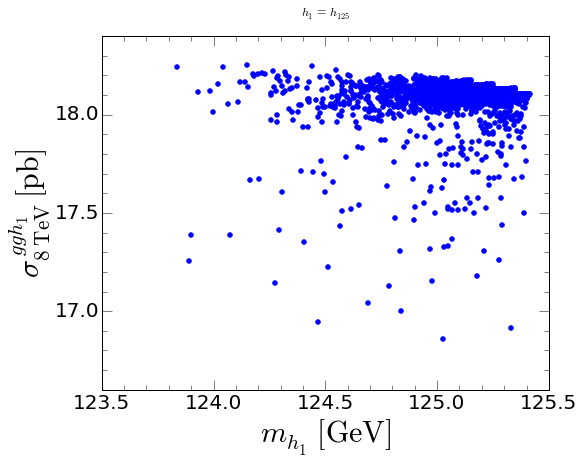

In [13]:
d = df_pass_all_strict[(df_pass_all_strict.mh1 < 128) & (df_pass_all_strict.mh1 > 122) & (df_pass_all_strict.mh2>128.1)]
plot_scatter(df=d, xvar='mh1', yvar='xsec_ggh18', color='blue')
plt.xlabel(r'$m_{h_1}\ \mathrm{[GeV]}$')
plt.ylabel(r'$\sigma^{ggh_{1}}_{\mathrm{8\ TeV}} \mathrm{\ [pb]}$')
plt.title(r'$h_1 =\ h_{125}$')

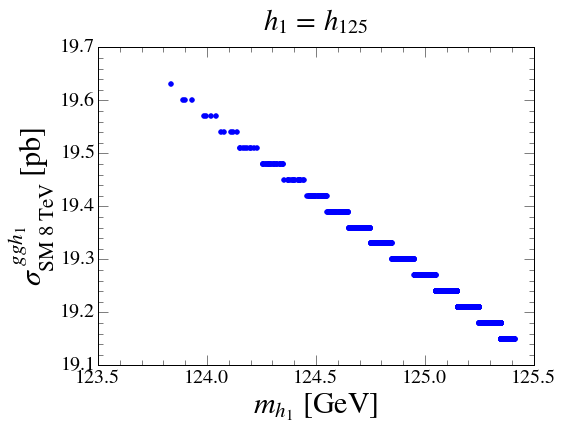

In [172]:
d = df_pass_all_strict[(df_pass_all_strict.mh1 < 128) & (df_pass_all_strict.mh1 > 122) & (df_pass_all_strict.mh2>128.1)]
plot_scatter(df=d, xvar='mh1', yvar='xsec_ggf8_h1', color='blue')
plt.xlabel(r'$m_{h_1}\ \mathrm{[GeV]}$')
plt.ylabel(r'$\sigma^{ggh_{1}}_{\mathrm{SM\ 8\ TeV}} \mathrm{\ [pb]}$')
plt.title(r'$h_1 =\ h_{125}$')

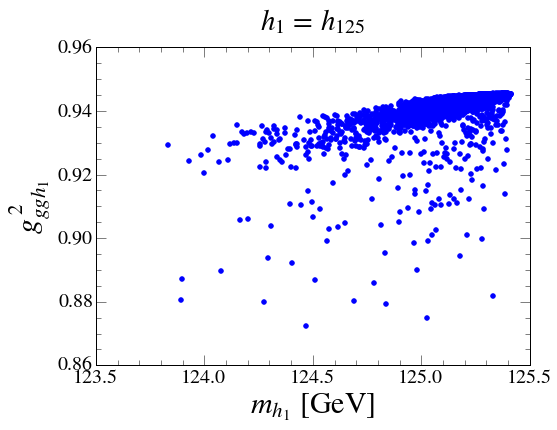

In [266]:
d = df_pass_all_strict[(df_pass_all_strict.mh1 < 128) & (df_pass_all_strict.mh1 > 122) & (df_pass_all_strict.mh2>128.1)]
plot_scatter(df=d, xvar='mh1', yvar='h1ggrc2', color='blue')
plt.xlabel(r'$m_{h_1}\ \mathrm{[GeV]}$')
plt.ylabel(r'$g_{ggh_1}^2$')
plt.title(r'$h_1 =\ h_{125}$')

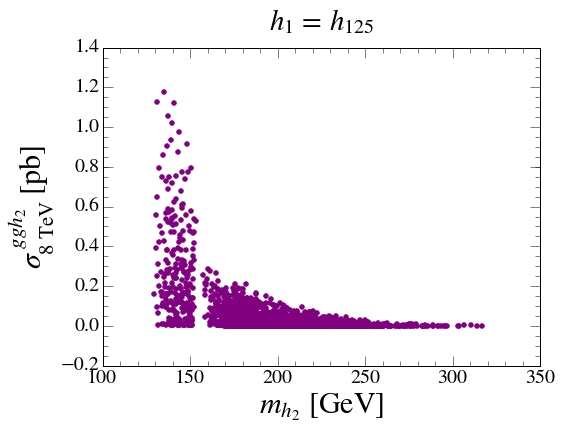

In [160]:
d = df_pass_all_strict[(df_pass_all_strict.mh1 < 128) & (df_pass_all_strict.mh1 > 122) & (df_pass_all_strict.mh2>128.1)]
plot_scatter(df=d, xvar='mh2', yvar='xsec_ggh28', color='purple')
plt.xlabel(r'$m_{h_2}\ \mathrm{[GeV]}$')
plt.ylabel(r'$\sigma^{ggh_{2}}_{\mathrm{8\ TeV}} \mathrm{\ [pb]}$')
plt.title(r'$h_1 =\ h_{125}$')

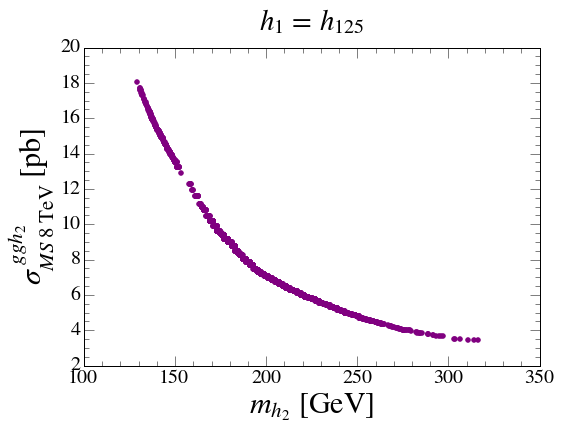

In [173]:
d = df_pass_all_strict[(df_pass_all_strict.mh1 < 128) & (df_pass_all_strict.mh1 > 122) & (df_pass_all_strict.mh2>128.1)]
plot_scatter(df=d, xvar='mh2', yvar='xsec_ggf8_h2', color='purple')
plt.xlabel(r'$m_{h_2}\ \mathrm{[GeV]}$')
plt.ylabel(r'$\sigma^{ggh_{2}}_{MS\ \mathrm{8\ TeV}} \mathrm{\ [pb]}$')
plt.title(r'$h_1 =\ h_{125}$')

KeyError: 'xsec_ggf_h2'

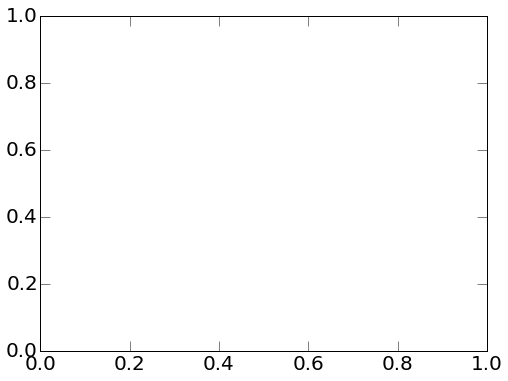

In [14]:
d = df_pass_all_strict[(df_pass_all_strict.mh1 < 128) & (df_pass_all_strict.mh1 > 122) & (df_pass_all_strict.mh2>128.1)]
plot_scatter(df=d, xvar='mh2', yvar='xsec_ggf_h2', color='purple')
plt.xlabel(r'$m_{h_2}\ \mathrm{[GeV]}$')
plt.ylabel(r'$g_{ggh_2}^2$')
plt.title(r'$h_1 =\ h_{125}$')

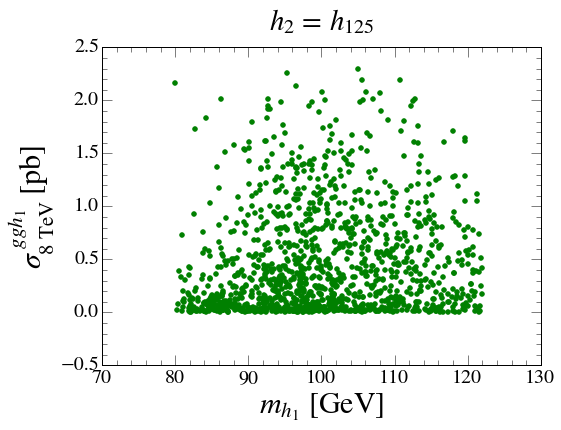

In [161]:
d = df_pass_all_strict[(df_pass_all_strict.mh2 < 128) & (df_pass_all_strict.mh2 > 122) & (df_pass_all_strict.mh1>80) & (df_pass_all_strict.mh1<122)]
plot_scatter(df=d, xvar='mh1', yvar='xsec_ggh18', color='green')
plt.xlabel(r'$m_{h_1}\ \mathrm{[GeV]}$')
plt.ylabel(r'$\sigma^{ggh_{1}}_{\mathrm{8\ TeV}} \mathrm{\ [pb]}$')
plt.title(r'$h_2 =\ h_{125}$')

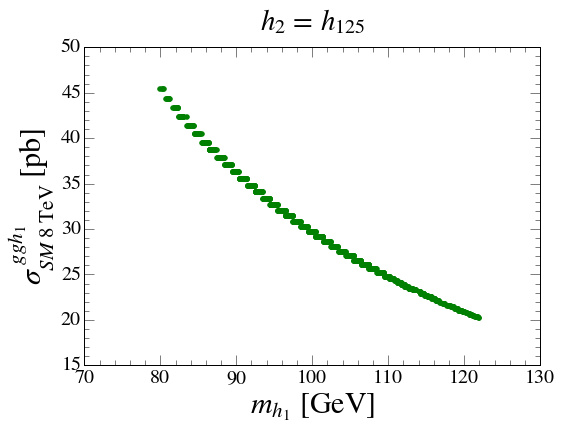

In [174]:
d = df_pass_all_strict[(df_pass_all_strict.mh2 < 128) & (df_pass_all_strict.mh2 > 122) & (df_pass_all_strict.mh1>80) & (df_pass_all_strict.mh1<122)]
plot_scatter(df=d, xvar='mh1', yvar='xsec_ggf8_h1', color='green')
plt.xlabel(r'$m_{h_1}\ \mathrm{[GeV]}$')
plt.ylabel(r'$\sigma^{ggh_{1}}_{SM\ \mathrm{8\ TeV}} \mathrm{\ [pb]}$')
plt.title(r'$h_2 =\ h_{125}$')

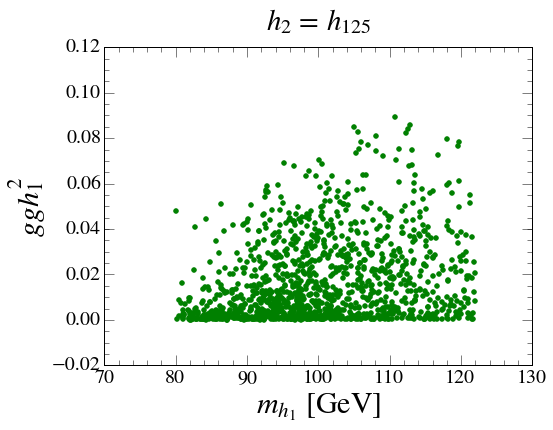

In [175]:
d = df_pass_all_strict[(df_pass_all_strict.mh2 < 128) & (df_pass_all_strict.mh2 > 122) & (df_pass_all_strict.mh1>80) & (df_pass_all_strict.mh1<122)]
plot_scatter(df=d, xvar='mh1', yvar='h1ggrc2', color='green')
plt.xlabel(r'$m_{h_1}\ \mathrm{[GeV]}$')
plt.ylabel(r'$ggh_1^2$')
plt.title(r'$h_2 =\ h_{125}$')

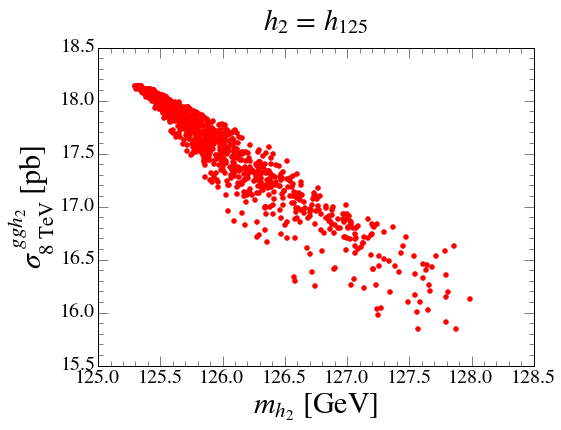

In [164]:
d = df_pass_all_strict[(df_pass_all_strict.mh2 < 128) & (df_pass_all_strict.mh2 > 122) & (df_pass_all_strict.mh1>0) & (df_pass_all.mh1<122)]
plot_scatter(df=d, xvar='mh2', yvar='xsec_ggh28', color='red')
plt.xlabel(r'$m_{h_2}\ \mathrm{[GeV]}$')
plt.ylabel(r'$\sigma^{ggh_{2}}_{\mathrm{8\ TeV}} \mathrm{\ [pb]}$')
plt.title(r'$h_2 =\ h_{125}$')

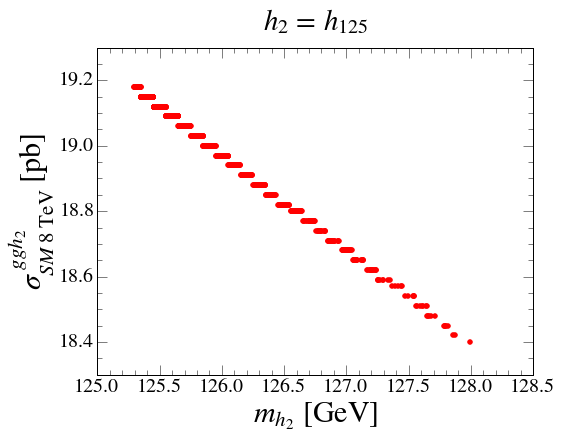

In [176]:
d = df_pass_all_strict[(df_pass_all_strict.mh2 < 128) & (df_pass_all_strict.mh2 > 122) & (df_pass_all_strict.mh1>0) & (df_pass_all.mh1<122)]
plot_scatter(df=d, xvar='mh2', yvar='xsec_ggf8_h2', color='red')
plt.xlabel(r'$m_{h_2}\ \mathrm{[GeV]}$')
plt.ylabel(r'$\sigma^{ggh_{2}}_{SM\ \mathrm{8\ TeV}} \mathrm{\ [pb]}$')
plt.title(r'$h_2 =\ h_{125}$')

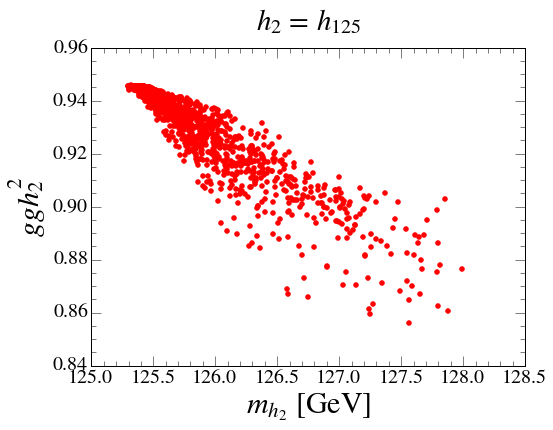

In [178]:
d = df_pass_all_strict[(df_pass_all_strict.mh2 < 128) & (df_pass_all_strict.mh2 > 122) & (df_pass_all_strict.mh1>0) & (df_pass_all.mh1<122)]
plot_scatter(df=d, xvar='mh2', yvar='h2ggrc2', color='red')
plt.xlabel(r'$m_{h_2}\ \mathrm{[GeV]}$')
plt.ylabel(r'$ggh_2^2$')
plt.title(r'$h_2 =\ h_{125}$')

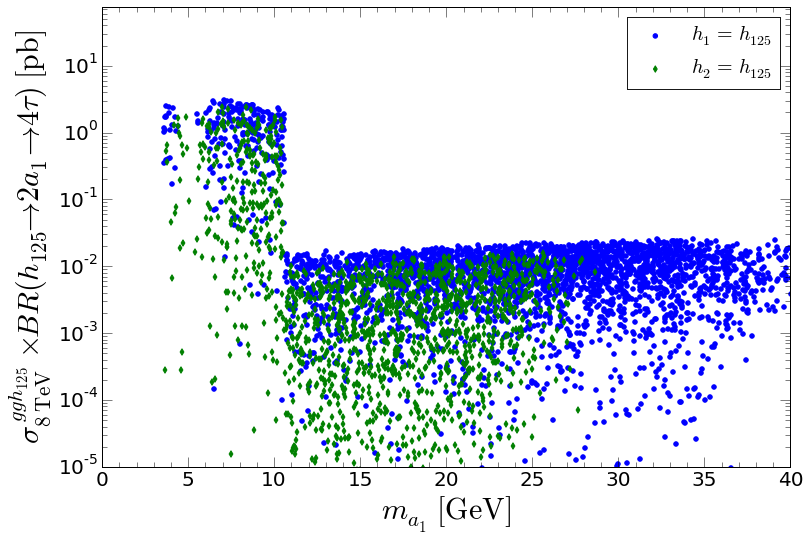

In [89]:
# basic cross-sections
# plot_scatter(df=df_pass_all_strict[(df_pass_all_strict.mh1 < 128) & (df_pass_all_strict.mh1 > 122)],
#              xvar='ma1', yvar='xsec_ggh18', color='deepskyblue', 
#              label=r'$\sigma^{ggh_1}_{\mathrm{8\ TeV}},\ h_1 = h_{125}$', xlabel='ma1', ylabel='xsec*BR')
# plot_scatter(df=df_pass_all_strict[(df_pass_all_strict.mh2 < 128) & (df_pass_all_strict.mh2 > 122)],
#              xvar='ma1', yvar='xsec_ggh28', color='springgreen', ax=plt.gca(),
#              label=r'$\sigma^{ggh_2}_{\mathrm{8\ TeV}},\ h_2 = h_{125}$')

# total xs * BR
plot_scatter(df=df_pass_all_strict[(df_pass_all_strict.mh1 < 128) & (df_pass_all_strict.mh1 > 122) & (df_pass_all_strict.mh2>128)], 
             xvar='ma1', yvar='xsec_ggf8_h1_2a_4tau', # ax=plt.gca(), 
             color='blue', label=r'$h_1 =\ h_{125}$')
plot_scatter(df=df_pass_all_strict[(df_pass_all_strict.mh2 < 128) & (df_pass_all_strict.mh2 > 122)],
             ax=plt.gca(), xvar='ma1', yvar='xsec_ggf8_h2_2a_4tau', 
             color='green', label=r'$h_2 =\ h_{125}$', marker='d')
# plot_scatter(df=df_pass_all_strict[(df_pass_all_strict.mh2 < 128) & (df_pass_all_strict.mh2 > 122)],
#              ax=plt.gca(), xvar='ma1', yvar='xsec_ggf8_h2_2h1_4tau', 
#              color='purple', label=r'$h_2 =\ h_{125},\ h_2 \to 2 h_1 \to 4\tau$')
fig = plt.gcf()
fig.set_size_inches(12, 8)
plt.xlabel(r'$m_{a_1} \mathrm{\ [GeV]}$')
plt.ylabel(r'$\sigma^{ggh_{125}}_{\mathrm{8\ TeV}} \times BR (h_{125} \to 2a_1 \to 4\tau) \mathrm{\ [pb]}$')
plt.yscale('log')
plt.ylim(bottom=0.00001, top=75)
plt.xlim(0, 40)
# plot_atlas_limit(color='red', linewidth=2)
# plot_cms_limit(color='indigo', linewidth=2)
plt.legend(fontsize=20, loc=1, framealpha=0.9)

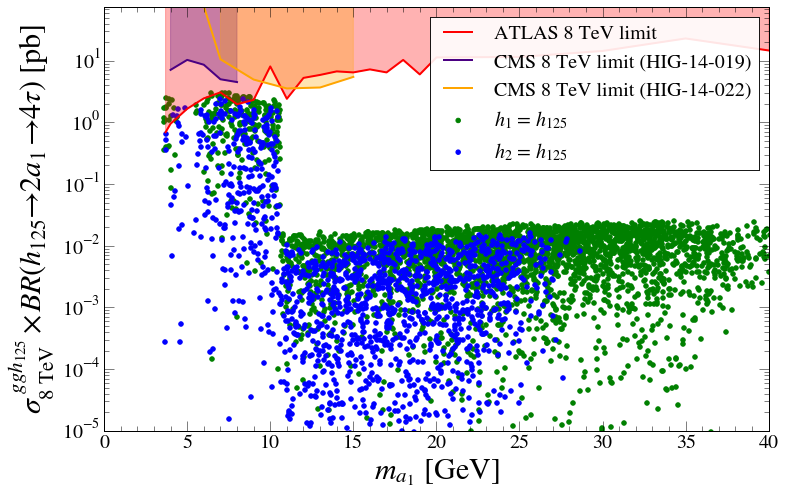

In [45]:
# basic cross-sections
# plot_scatter(df=df_pass_all_strict[(df_pass_all_strict.mh1 < 128) & (df_pass_all_strict.mh1 > 122)],
#              xvar='ma1', yvar='xsec_ggh18', color='deepskyblue', 
#              label=r'$\sigma^{ggh_1}_{\mathrm{8\ TeV}},\ h_1 = h_{125}$', xlabel='ma1', ylabel='xsec*BR')
# plot_scatter(df=df_pass_all_strict[(df_pass_all_strict.mh2 < 128) & (df_pass_all_strict.mh2 > 122)],
#              xvar='ma1', yvar='xsec_ggh28', color='springgreen', ax=plt.gca(),
#              label=r'$\sigma^{ggh_2}_{\mathrm{8\ TeV}},\ h_2 = h_{125}$')

# total xs * BR
plot_scatter(df=df_pass_all_strict[(df_pass_all_strict.mh1 < 128) & (df_pass_all_strict.mh1 > 122)], 
             xvar='ma1', yvar='xsec_ggf8_h1_2a_4tau', # ax=plt.gca(), 
             color='green', label=r'$h_1 =\ h_{125}$')
plot_scatter(df=df_pass_all_strict[(df_pass_all_strict.mh2 < 128) & (df_pass_all_strict.mh2 > 122)],
             ax=plt.gca(), xvar='ma1', yvar='xsec_ggf8_h2_2a_4tau', 
             color='blue', label=r'$h_2 =\ h_{125}$')
# plot_scatter(df=df_pass_all_strict[(df_pass_all_strict.mh2 < 128) & (df_pass_all_strict.mh2 > 122)],
#              ax=plt.gca(), xvar='ma1', yvar='xsec_ggf8_h2_2h1_4tau', 
#              color='purple', label=r'$h_2 =\ h_{125},\ h_2 \to 2 h_1 \to 4\tau$')
fig = plt.gcf()
fig.set_size_inches(12, 8)
plt.xlabel(r'$m_{a_1} \mathrm{\ [GeV]}$')
plt.ylabel(r'$\sigma^{ggh_{125}}_{\mathrm{8\ TeV}} \times BR (h_{125} \to 2a_1 \to 4\tau) \mathrm{\ [pb]}$')
plt.yscale('log')
plt.ylim(bottom=0.00001, top=75)
plt.xlim(0, 40)
plot_atlas_limit(color='red', linewidth=2)
plot_cms_limit(color='indigo', linewidth=2)
plot_cms_boostedTau_limit(color='orange', linewidth=2)
plt.legend(fontsize=20, loc=1, framealpha=0.9)

In [40]:
df_pass_all_strict['pass_cms_h1'] = df_pass_all_strict.apply(lambda row: pass_limit(row['ma1'], row['xsec_ggf8_h1_2a_4tau'], cms_limits_4tau_xsec), axis=1)
df_pass_all_strict['pass_cms_h2'] = df_pass_all_strict.apply(lambda row: pass_limit(row['ma1'], row['xsec_ggf8_h2_2a_4tau'], cms_limits_4tau_xsec), axis=1)
df_pass_all_strict['pass_cms_boostedTau_h1'] = df_pass_all_strict.apply(lambda row: pass_limit(row['ma1'], row['xsec_ggf8_h1_2a_4tau'], cms_limits_4tau_boostedTau_xsec), axis=1)
df_pass_all_strict['pass_cms_boostedTau_h2'] = df_pass_all_strict.apply(lambda row: pass_limit(row['ma1'], row['xsec_ggf8_h2_2a_4tau'], cms_limits_4tau_boostedTau_xsec), axis=1)
df_pass_all_strict['pass_atlas_h1'] = df_pass_all_strict.apply(lambda row: pass_limit(row['ma1'], row['xsec_ggf8_h1_2a_4tau'], atlas_limits_xsec), axis=1)
df_pass_all_strict['pass_atlas_h2'] = df_pass_all_strict.apply(lambda row: pass_limit(row['ma1'], row['xsec_ggf8_h2_2a_4tau'], atlas_limits_xsec), axis=1)
df_pass_all_strict['pass_all_h1'] = df_pass_all_strict.apply(lambda row: pass_new_limits_4tau(row['ma1'], row['xsec_ggf8_h1_2a_4tau']), axis=1)
df_pass_all_strict['pass_all_h2'] = df_pass_all_strict.apply(lambda row: pass_new_limits_4tau(row['ma1'], row['xsec_ggf8_h2_2a_4tau']), axis=1)

/Users/robina/.virtualenvs/NMSSMScan/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/robina/.virtualenvs/NMSSMScan/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/robina/.virtualenvs/NMSSMScan/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

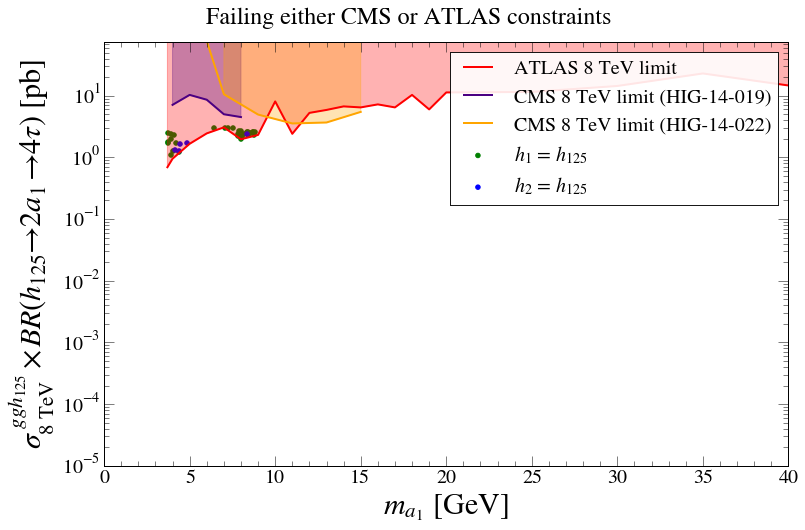

In [48]:

plot_scatter(df=df_pass_all_strict[~(df_pass_all_strict.pass_all_h1) & (df_pass_all_strict.mh1 < 128) & (df_pass_all_strict.mh1 > 122)], 
             xvar='ma1', yvar='xsec_ggf8_h1_2a_4tau', # ax=plt.gca(), 
             color='green', label=r'$h_1 =\ h_{125}$')
plot_scatter(df=df_pass_all_strict[~(df_pass_all_strict.pass_all_h2) & (df_pass_all_strict.mh2 < 128) & (df_pass_all_strict.mh2 > 122)],
             ax=plt.gca(), xvar='ma1', yvar='xsec_ggf8_h2_2a_4tau', 
             color='blue', label=r'$h_2 =\ h_{125}$')
# plot_scatter(df=df_pass_all_strict[(df_pass_all_strict.mh2 < 128) & (df_pass_all_strict.mh2 > 122)],
#              ax=plt.gca(), xvar='ma1', yvar='xsec_ggf8_h2_2h1_4tau', 
#              color='purple', label=r'$h_2 =\ h_{125},\ h_2 \to 2 h_1 \to 4\tau$')
fig = plt.gcf()
fig.set_size_inches(12, 8)
plt.xlabel(r'$m_{a_1} \mathrm{\ [GeV]}$')
plt.ylabel(r'$\sigma^{ggh_{125}}_{\mathrm{8\ TeV}} \times BR (h_{125} \to 2a_1 \to 4\tau) \mathrm{\ [pb]}$')
plt.yscale('log')
plt.ylim(bottom=0.00001, top=75)
plt.xlim(0, 40)
plot_atlas_limit(color='red', linewidth=2)
plot_cms_limit(color='indigo', linewidth=2)
plot_cms_boostedTau_limit(color='orange', linewidth=2)
plt.legend(fontsize=20, loc=1, framealpha=0.9)
plt.suptitle('Failing either CMS or ATLAS constraints')

In [53]:
print 'Number of points failing'
print 'h125 = h1:', len(df_pass_all_strict[~(df_pass_all_strict.pass_all_h1) & (df_pass_all_strict.mh1 < 128) & (df_pass_all_strict.mh1 > 122)].index)
print 'h125 = h2:', len(df_pass_all_strict[~(df_pass_all_strict.pass_all_h2) & (df_pass_all_strict.mh2 < 128) & (df_pass_all_strict.mh2 > 122)].index)

Number of points failing
h125 = h1: 32
h125 = h2: 5


CMS Limit not applicable here as only for $\sigma_{h_125} \times BR(h_{125} \to 2\phi\to\tau)$, and the following are $h \neq h_{125}$

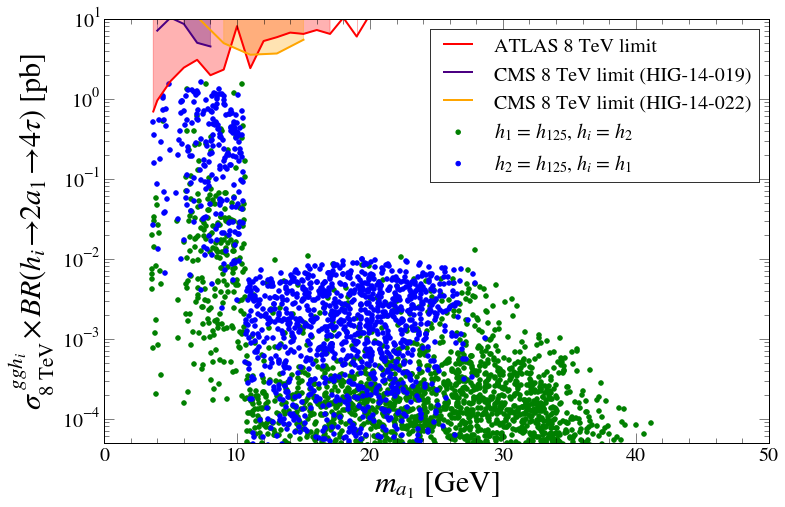

In [57]:
# xs
# plot_scatter(df=df_pass_all_strict[(df_pass_all_strict.mh1 < 128) & (df_pass_all_strict.mh1 > 122)],
#              xvar='ma1', yvar='xsec_ggh28', color='springgreen', 
#              label=r'$\sigma^{ggh_2}_{\mathrm{8\ TeV}},\ h_1 = h_{125}$')
# plot_scatter(df=df_pass_all_strict[(df_pass_all_strict.mh2 < 128) & (df_pass_all_strict.mh2 > 122)& (df_pass_all_strict.mh1>80)],
#              ax=plt.gca(), xvar='ma1', yvar='xsec_ggh18', color='deepskyblue', 
#              label=r'$\sigma^{ggh_1}_{\mathrm{8\ TeV}},\ h_2 = h_{125}$')
# total xs * BR
plot_scatter(df=df_pass_all_strict[(df_pass_all_strict.mh1 < 128) & (df_pass_all_strict.mh1 > 122)], 
             xvar='ma1', yvar='xsec_ggf8_h2_2a_4tau', color='green', label=r'$h_1 =\ h_{125},\ h_i =\ h_2$')
plot_scatter(df=df_pass_all_strict[(df_pass_all_strict.mh2 < 128) & (df_pass_all_strict.mh2 > 122) & (df_pass_all_strict.mh1>80)],
             ax=plt.gca(), xvar='ma1', yvar='xsec_ggf8_h1_2a_4tau', color='blue', label=r'$h_2 =\ h_{125},\ h_i =\ h_1$')
fig = plt.gcf()
fig.set_size_inches(12, 8)
plt.xlabel(r'$m_{a_1} \mathrm{\ [GeV]}$')
plt.ylabel(r'$\sigma^{ggh_i}_{\mathrm{8\ TeV}} \times BR (h_i \to 2a_1 \to 4\tau) \mathrm{\ [pb]}$')
plt.yscale('log')
plt.ylim(bottom=0.00005, top=10)
plt.xlim(0, 50)
plot_atlas_limit(color='red', linewidth=2)
plot_cms_limit(color='indigo', linewidth=2)
plot_cms_boostedTau_limit(color='orange', linewidth=2)
plt.legend(fontsize=20, loc=0, framealpha=0.8)


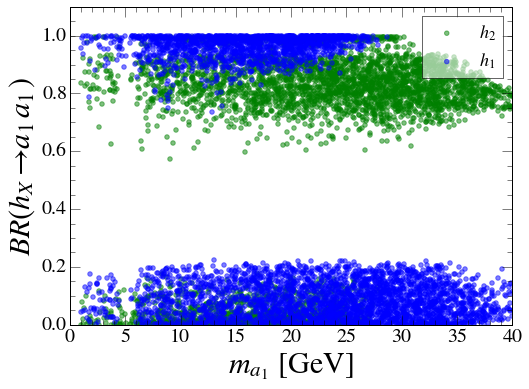

In [29]:
plot_scatter(xvar='ma1', yvar='Brh2a1a1', df=df_pass_all_strict, color='green', label=r'$h_2$', alpha=0.5)
plot_scatter(xvar='ma1', yvar='Brh1a1a1', df=df_pass_all_strict, ax=plt.gca(), color='blue', label=r'$h_1$', alpha=0.5)

plt.xlabel(r'$m_{a_1}\mathrm{\ [GeV]}$')
plt.xlim(0, 40)
plt.ylabel(r'$BR(h_X \to a_1a_1)$')
plt.ylim(0, 1.1)
plt.legend(loc=0, fontsize=18)

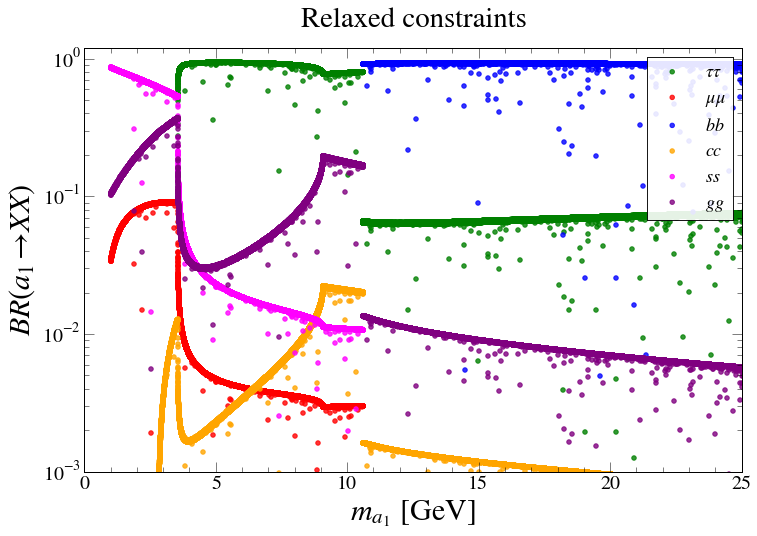

In [30]:
alp = 0.8
df = df_pass_all
plot_scatter(xvar='ma1', yvar='Bra1tautau', df=df, color='green', label=r'$\tau\tau$', alpha=alp)
plot_scatter(xvar='ma1', yvar='Bra1mumu', df=df, color='red', label=r'$\mu\mu$', alpha=alp, ax=plt.gca())
plot_scatter(xvar='ma1', yvar='Bra1bb', df=df, color='blue', label=r'$bb$', alpha=alp, ax=plt.gca())
plot_scatter(xvar='ma1', yvar='Bra1cc', df=df, color='orange', label=r'$cc$', alpha=alp, ax=plt.gca())
plot_scatter(xvar='ma1', yvar='Bra1ss', df=df, color='fuchsia', label=r'$ss$', alpha=alp, ax=plt.gca())
plot_scatter(xvar='ma1', yvar='Bra1gg', df=df, color='purple', label=r'$gg$', alpha=alp, ax=plt.gca())
fig = plt.gcf()
fig.set_size_inches(12,8)
plt.xlabel(r'$m_{a_1}\mathrm{\ [GeV]}$')
plt.ylabel(r'$BR(a_1 \to XX)$')
plt.legend(loc=0, fontsize=18, framealpha=0.9)
plt.xlim(0, 25)
# plt.xscale('log')
plt.yscale('log')
plt.ylim(1E-3, 1.2)
# plt.ylim(0.9, 1)
plt.title("Relaxed constraints")

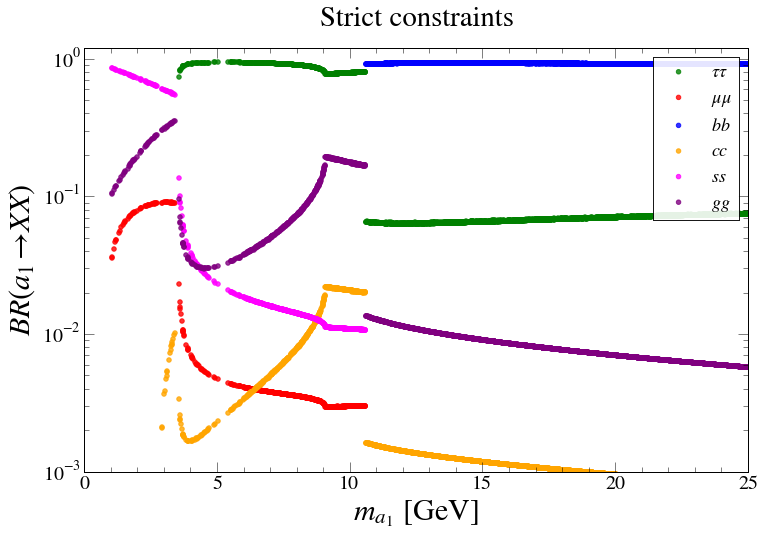

In [31]:
alp = 0.8
df = df_pass_all_strict
plot_scatter(xvar='ma1', yvar='Bra1tautau', df=df, color='green', label=r'$\tau\tau$', alpha=alp)
plot_scatter(xvar='ma1', yvar='Bra1mumu', df=df, color='red', label=r'$\mu\mu$', alpha=alp, ax=plt.gca())
plot_scatter(xvar='ma1', yvar='Bra1bb', df=df, color='blue', label=r'$bb$', alpha=alp, ax=plt.gca())
plot_scatter(xvar='ma1', yvar='Bra1cc', df=df, color='orange', label=r'$cc$', alpha=alp, ax=plt.gca())
plot_scatter(xvar='ma1', yvar='Bra1ss', df=df, color='fuchsia', label=r'$ss$', alpha=alp, ax=plt.gca())
plot_scatter(xvar='ma1', yvar='Bra1gg', df=df, color='purple', label=r'$gg$', alpha=alp, ax=plt.gca())
fig = plt.gcf()
fig.set_size_inches(12,8)
plt.xlabel(r'$m_{a_1}\mathrm{\ [GeV]}$')
plt.ylabel(r'$BR(a_1 \to XX)$')
plt.legend(loc=0, fontsize=18, framealpha=0.9)
plt.xlim(0, 25)
# plt.xscale('log')
plt.yscale('log')
plt.ylim(1E-3, 1.2)
# plt.ylim(0.9, 1)
plt.title("Strict constraints")

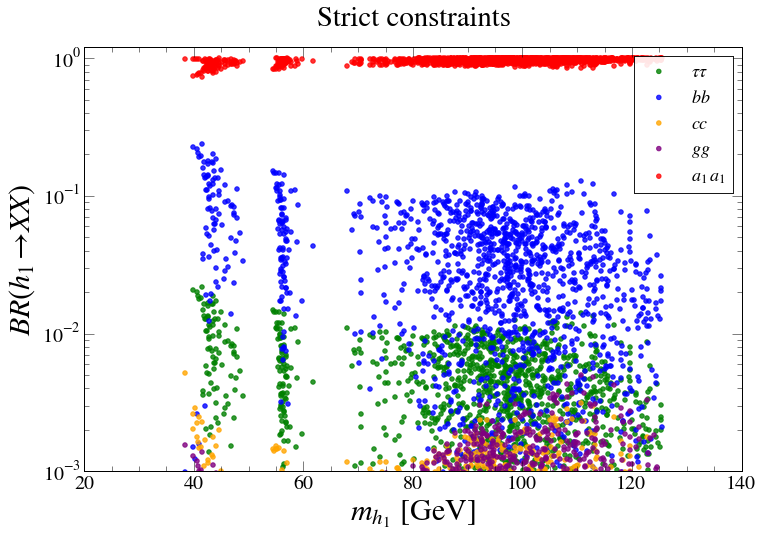

In [291]:
alp = 0.8
df = df_pass_all_strict[(df_pass_all_strict.mh2<128) & (df_pass_all_strict.mh2>122)]
plot_scatter(xvar='mh1', yvar='Brh1tautau', df=df, color='green', label=r'$\tau\tau$', alpha=alp)
# plot_scatter(xvar='mh1', yvar='Brh1mumu', df=df, color='red', label=r'$\mu\mu$', alpha=alp, ax=plt.gca())
plot_scatter(xvar='mh1', yvar='Brh1bb', df=df, color='blue', label=r'$bb$', alpha=alp, ax=plt.gca())
plot_scatter(xvar='mh1', yvar='Brh1cc', df=df, color='orange', label=r'$cc$', alpha=alp, ax=plt.gca())
# plot_scatter(xvar='mh1', yvar='Brh1ss', df=df, color='fuchsia', label=r'$ss$', alpha=alp, ax=plt.gca())
plot_scatter(xvar='mh1', yvar='Brh1gg', df=df, color='purple', label=r'$gg$', alpha=alp, ax=plt.gca())
plot_scatter(xvar='mh1', yvar='Brh1a1a1', df=df, color='red', label=r'$a_1a_1$', alpha=alp, ax=plt.gca())

fig = plt.gcf()
fig.set_size_inches(12,8)
plt.xlabel(r'$m_{h_1}\mathrm{\ [GeV]}$')
plt.ylabel(r'$BR(h_1 \to XX)$')
plt.legend(loc=0, fontsize=18, framealpha=0.9)
# plt.xlim(0, 25)
# plt.xscale('log')
plt.yscale('log')
plt.ylim(1E-3, 1.2)
# plt.ylim(0.9, 1)
plt.title("Strict constraints")

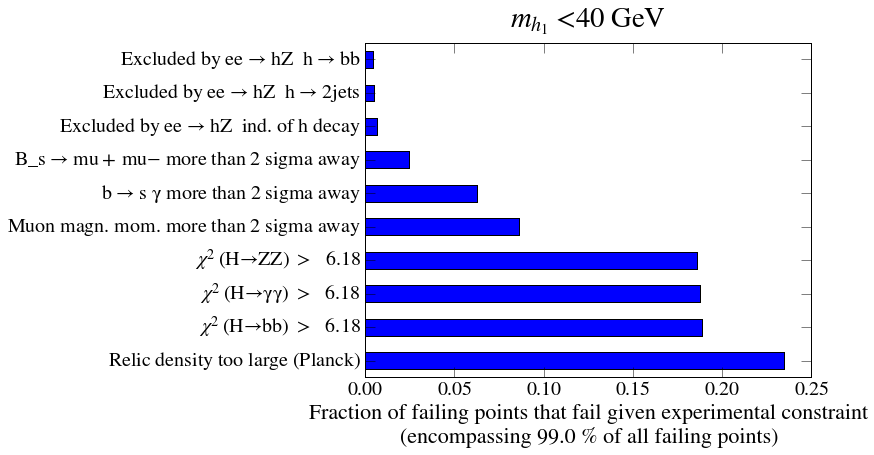

In [242]:
plot_constraints(df_orig[df_orig.mh1<40], r"$m_{h_1} < 40\ \mathrm{GeV}$", 0.99)

In [223]:
def plot_sum_contours(ax, xlim=[0,1], ylim=[0,1], n_div=8):
    """For contours of constant BR * ggh^2"""
    delta = min(xlim[1], ylim[1])/40.
    # generate a grid of x and y values
    x = np.arange(xlim[0], xlim[1], delta)
    y = np.arange(ylim[0], ylim[1], delta)
    X, Y = np.meshgrid(x, y)
    # generate a grid of the product of these values
    Z = X + Y

#     CS = ax.contour(X, Y, Z, [0.001, 0.005, 0.01, 0.05, 0.1, 0.25, 0.5, 0.75], colors='k')
#     if log_steps:
#         max_v = xlim[1] * ylim[1]
#         min_v = xlim[0] * ylim[0]
#         print math.log(max_v, 10)-5, math.log(max_v, 10)+1
#         n_div = np.logspace( math.log(max_v, 10)-5, math.log(max_v, 10)+1, num=7)
        
    CS = ax.contour(X, Y, Z, n_div, colors='k')
    ax.clabel(CS, inline=1, fontsize=20)#, fmt='%1.2E')

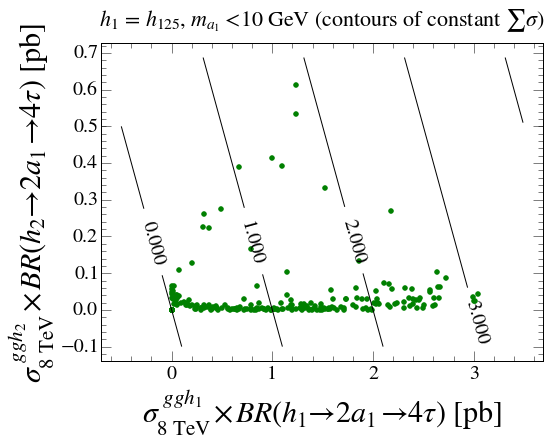

In [233]:
plot_scatter(df=df_pass_all_strict[(df_pass_all_strict.ma1<10) & (df_pass_all_strict.mh1<128) & (df_pass_all_strict.mh1>122) & (df_pass_all_strict.mh2>128)],
             xvar='xsec_ggf8_h1_2a_4tau', yvar='xsec_ggf8_h2_2a_4tau',
             color='green')
plt.xlabel(r'$\sigma^{ggh_{1}}_{\mathrm{8\ TeV}} \times BR (h_{1} \to 2a_1 \to 4\tau) \mathrm{\ [pb]}$')
plt.ylabel(r'$\sigma^{ggh_{2}}_{\mathrm{8\ TeV}} \times BR (h_{2} \to 2a_1 \to 4\tau) \mathrm{\ [pb]}$')
plt.title(r'$h_1 =\ h_{125},\ m_{a_1} < 10\ \mathrm{GeV}$' + " (contours of constant $\sum\sigma$)", fontsize=22)
# plt.xlim(left=0)
# plt.ylim(bottom=0)
plot_sum_contours(plt.gca(), plt.xlim(), plt.ylim(), 5)

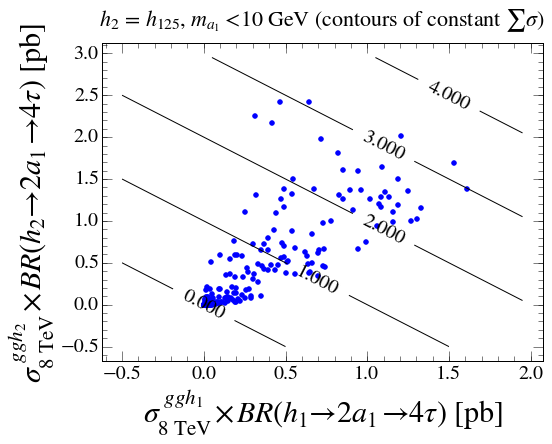

In [234]:
plot_scatter(df=df_pass_all_strict[(df_pass_all_strict.ma1<10) & (df_pass_all_strict.mh2<128) & (df_pass_all_strict.mh2>122) & (df_pass_all_strict.mh1>80) & (df_pass_all_strict.mh1 <122)],
             xvar='xsec_ggf8_h1_2a_4tau', yvar='xsec_ggf8_h2_2a_4tau',
            color='blue')
plt.xlabel(r'$\sigma^{ggh_{1}}_{\mathrm{8\ TeV}} \times BR (h_{1} \to 2a_1 \to 4\tau) \mathrm{\ [pb]}$')
plt.ylabel(r'$\sigma^{ggh_{2}}_{\mathrm{8\ TeV}} \times BR (h_{2} \to 2a_1 \to 4\tau) \mathrm{\ [pb]}$')
plt.title(r'$h_2 =\ h_{125},\ m_{a_1} < 10\ \mathrm{GeV}$' + " (contours of constant $\sum\sigma$)", fontsize=22)
# plt.xlim(left=0)
# plt.ylim(bottom=0)
plot_sum_contours(plt.gca(), plt.xlim(), plt.ylim(), 5)

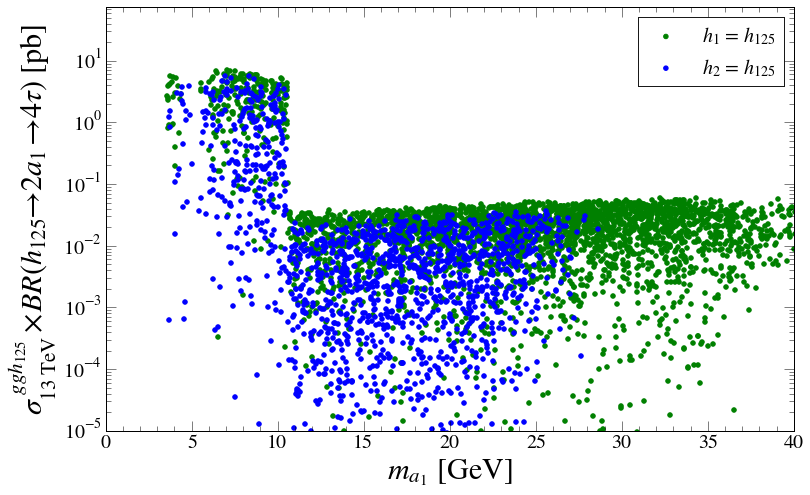

In [127]:
# basic cross-sections
# plot_scatter(df=df_pass_all_strict[(df_pass_all_strict.mh1 < 128) & (df_pass_all_strict.mh1 > 122)],
#              xvar='ma1', yvar='xsec_ggh113', color='deepskyblue', 
#              label=r'$\sigma^{ggh_1}_{\mathrm{13\ TeV}},\ h_1 = h_{125}$', xlabel='ma1', ylabel='xsec*BR')
# plot_scatter(df=df_pass_all_strict[(df_pass_all_strict.mh2 < 128) & (df_pass_all_strict.mh2 > 122)],
#              xvar='ma1', yvar='xsec_ggh213', color='springgreen', ax=plt.gca(),
#              label=r'$\sigma^{ggh_2}_{\mathrm{13\ TeV}},\ h_2 = h_{125}$')

# total xs * BR
plot_scatter(df=df_pass_all_strict[(df_pass_all_strict.mh1 < 128) & (df_pass_all_strict.mh1 > 122)], 
             xvar='ma1', yvar='xsec_ggf13_h1_2a_4tau', # ax=plt.gca(), 
             color='green', label=r'$h_1 =\ h_{125}$')
plot_scatter(df=df_pass_all_strict[(df_pass_all_strict.mh2 < 128) & (df_pass_all_strict.mh2 > 122)],
             ax=plt.gca(), xvar='ma1', yvar='xsec_ggf13_h2_2a_4tau', 
             color='blue', label=r'$h_2 =\ h_{125}$')
# plot_scatter(df=df_pass_all_strict[(df_pass_all_strict.mh2 < 128) & (df_pass_all_strict.mh2 > 122)],
#              ax=plt.gca(), xvar='ma1', yvar='xsec_ggf13_h2_2h1_4tau', 
#              color='purple', label=r'$h_2 =\ h_{125},\ h_2 \to 2 h_1 \to 4\tau$')
fig = plt.gcf()
fig.set_size_inches(12, 8)
plt.xlabel(r'$m_{a_1} \mathrm{\ [GeV]}$')
plt.ylabel(r'$\sigma^{ggh_{125}}_{\mathrm{13\ TeV}} \times BR (h_{125} \to 2a_1 \to 4\tau) \mathrm{\ [pb]}$')
plt.yscale('log')
plt.ylim(bottom=0.00001, top=75)
plt.xlim(0, 40)
plt.legend(fontsize=20, loc=1, framealpha=0.9)

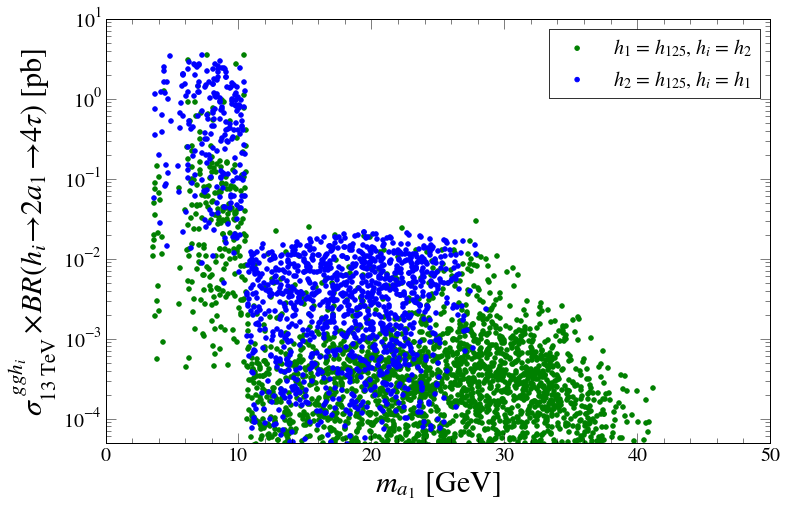

In [118]:
# xs
# plot_scatter(df=df_pass_all_strict[(df_pass_all_strict.mh1 < 128) & (df_pass_all_strict.mh1 > 122)],
#              xvar='ma1', yvar='xsec_ggh213', color='springgreen', 
#              label=r'$\sigma^{ggh_2}_{\mathrm{13\ TeV}},\ h_1 = h_{125}$')
# plot_scatter(df=df_pass_all_strict[(df_pass_all_strict.mh2 < 128) & (df_pass_all_strict.mh2 > 122)& (df_pass_all_strict.mh1>80)],
#              ax=plt.gca(), xvar='ma1', yvar='xsec_ggh113', color='deepskyblue', 
#              label=r'$\sigma^{ggh_1}_{\mathrm{13\ TeV}},\ h_2 = h_{125}$')
# total xs * BR
plot_scatter(df=df_pass_all_strict[(df_pass_all_strict.mh1 < 128) & (df_pass_all_strict.mh1 > 122)], 
             xvar='ma1', yvar='xsec_ggf13_h2_2a_4tau', color='green', label=r'$h_1 =\ h_{125},\ h_i =\ h_2$')
plot_scatter(df=df_pass_all_strict[(df_pass_all_strict.mh2 < 128) & (df_pass_all_strict.mh2 > 122) & (df_pass_all_strict.mh1>80)],
             ax=plt.gca(), xvar='ma1', yvar='xsec_ggf13_h1_2a_4tau', color='blue', label=r'$h_2 =\ h_{125},\ h_i =\ h_1$')
fig = plt.gcf()
fig.set_size_inches(12, 8)
plt.xlabel(r'$m_{a_1} \mathrm{\ [GeV]}$')
plt.ylabel(r'$\sigma^{ggh_i}_{\mathrm{13\ TeV}} \times BR (h_i \to 2a_1 \to 4\tau) \mathrm{\ [pb]}$')
plt.yscale('log')
plt.ylim(bottom=0.00005, top=10)
plt.xlim(0, 50)
plt.legend(fontsize=20, loc=0, framealpha=0.8)


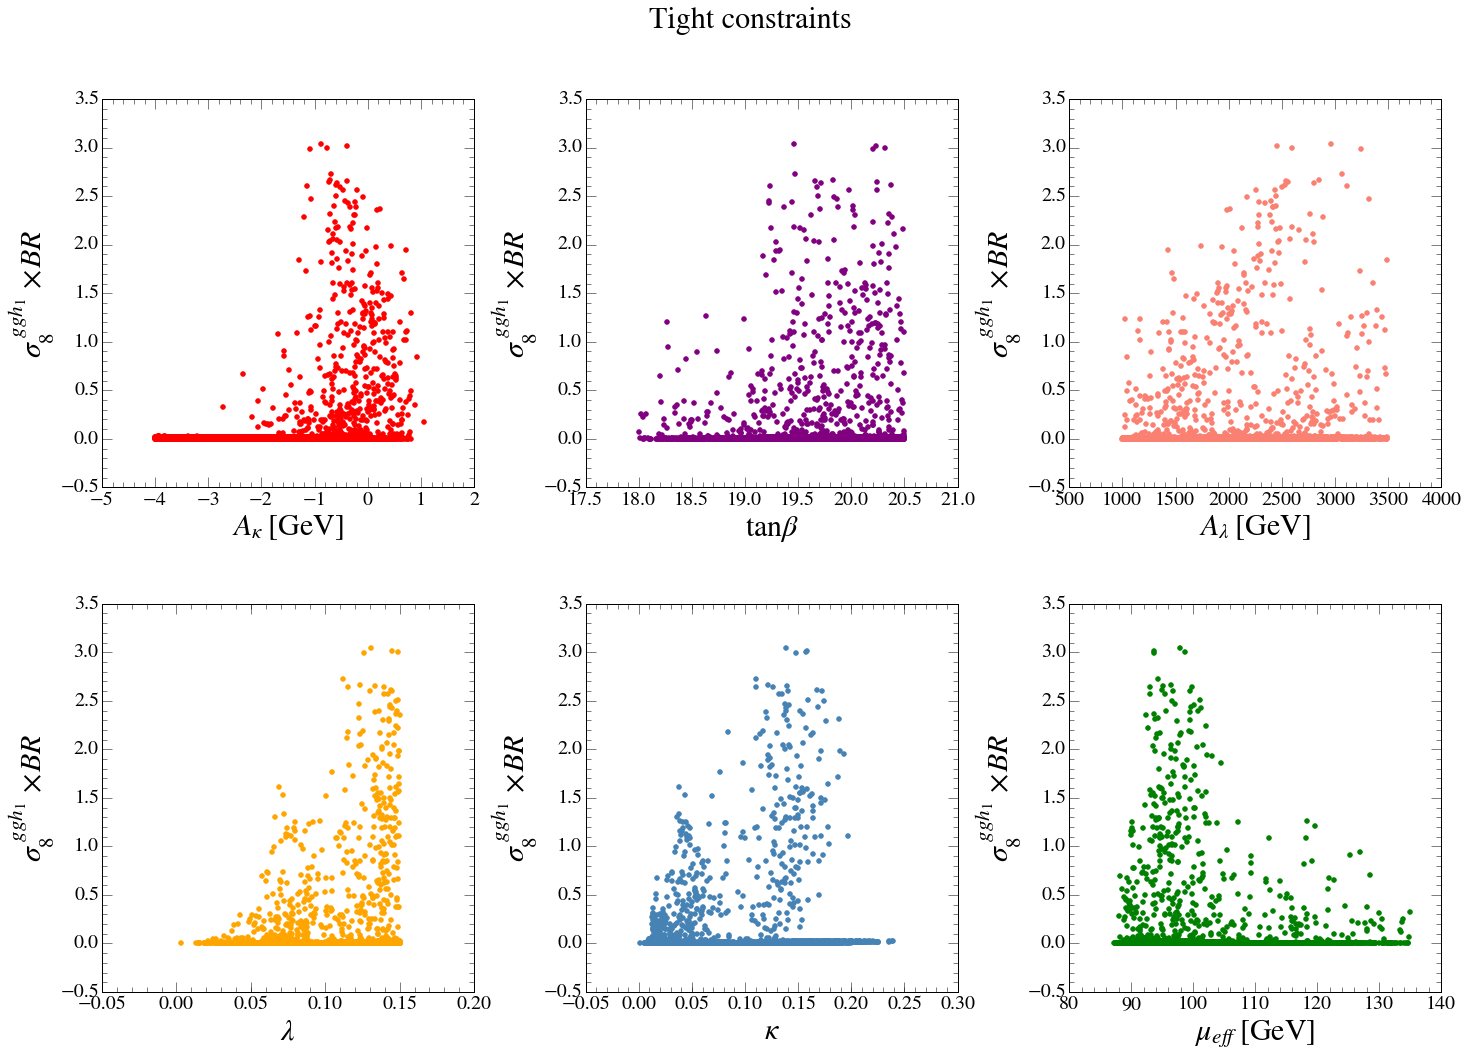

In [38]:
plot_input_params_scatters(df_pass_all_strict, 'xsec_ggf8_h1_2a_4tau', r"$\sigma^{ggh_1}_{8} \times BR$", title="Tight constraints")

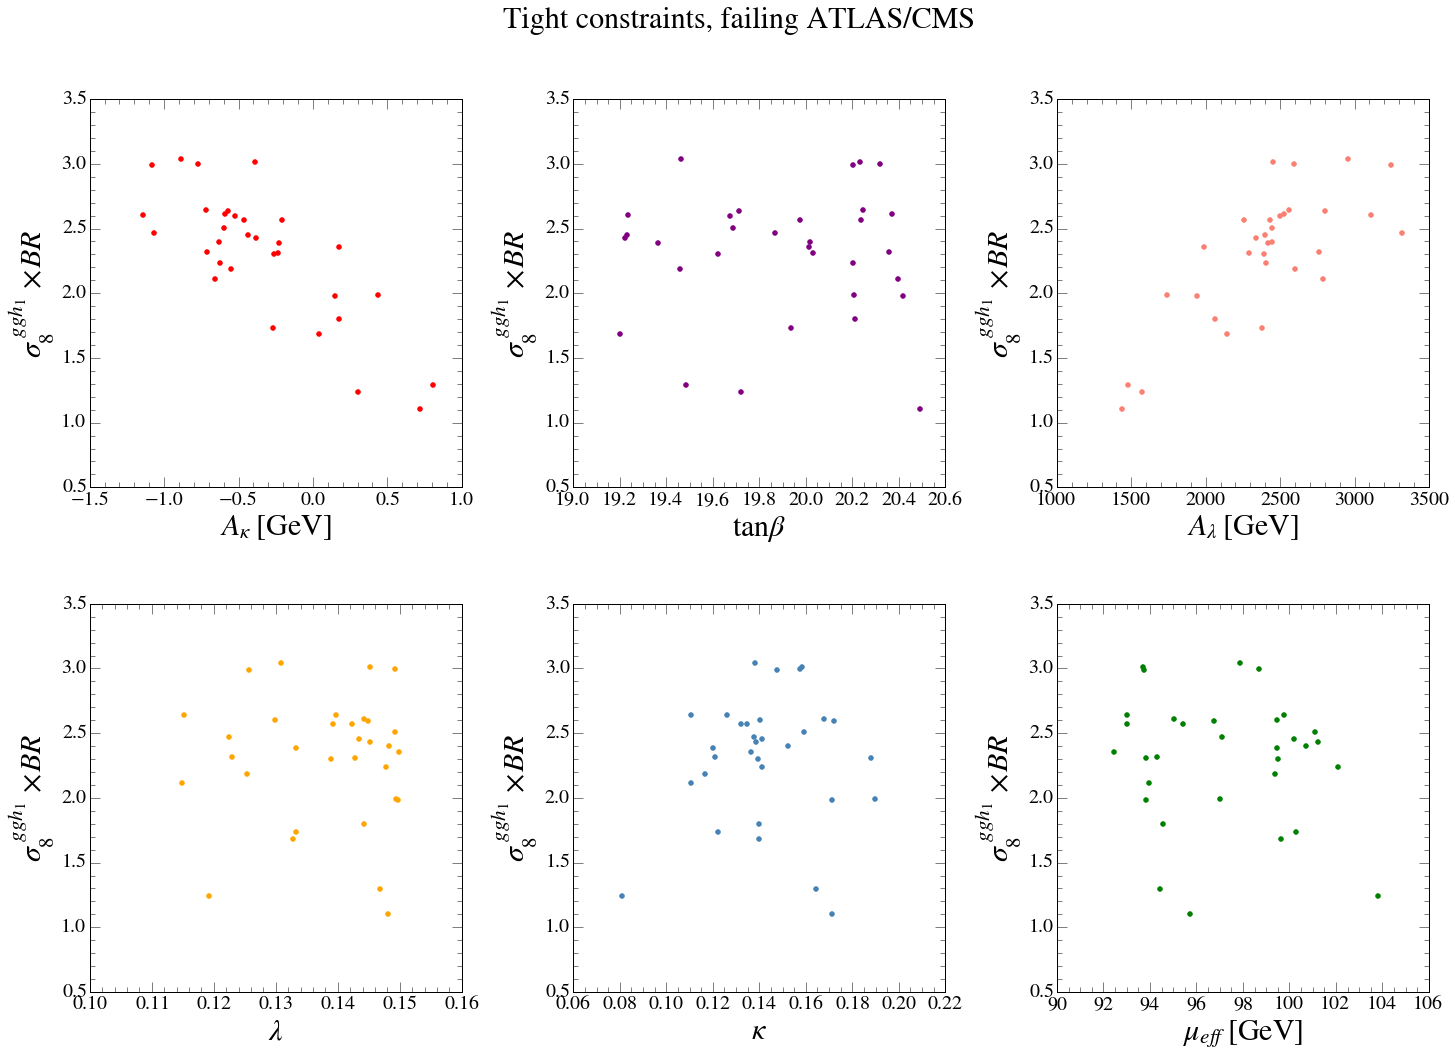

In [55]:
plot_input_params_scatters(df_pass_all_strict[~(df_pass_all_strict.pass_all_h1) & (df_pass_all_strict.mh1 < 128) & (df_pass_all_strict.mh1 > 122)], 
                           'xsec_ggf8_h1_2a_4tau', r"$\sigma^{ggh_1}_{8} \times BR$", 
                           title="Tight constraints, failing ATLAS/CMS ")

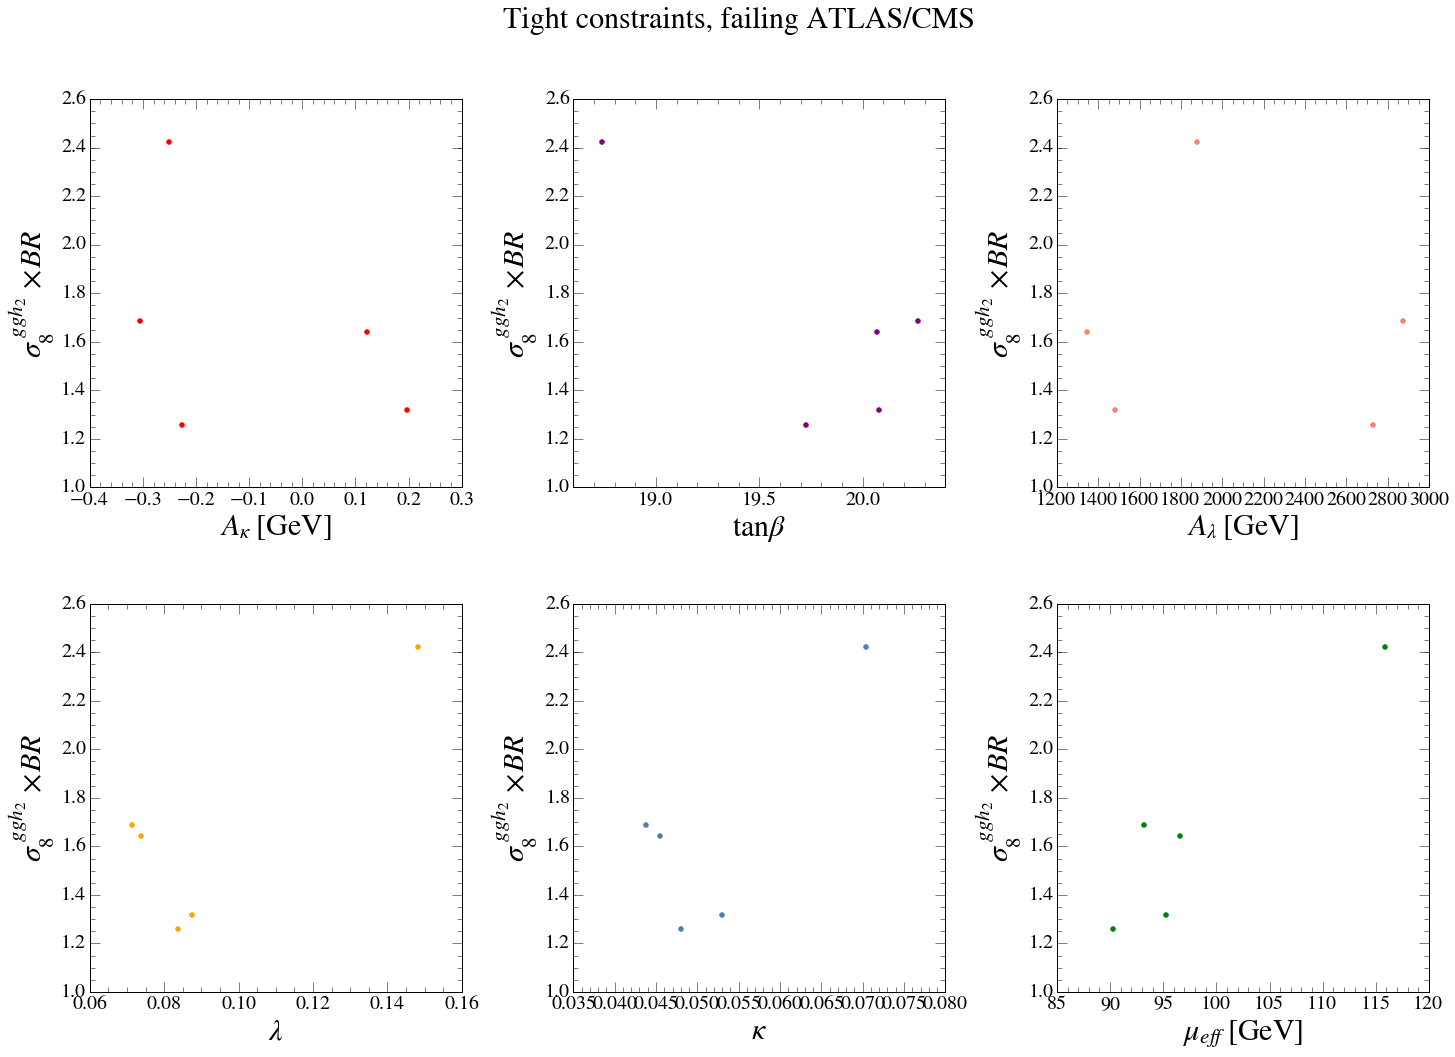

In [56]:
plot_input_params_scatters(df_pass_all_strict[~(df_pass_all_strict.pass_all_h2) & (df_pass_all_strict.mh2 < 128) & (df_pass_all_strict.mh2 > 122)], 
                           'xsec_ggf8_h2_2a_4tau', r"$\sigma^{ggh_2}_{8} \times BR$", 
                           title="Tight constraints, failing ATLAS/CMS")

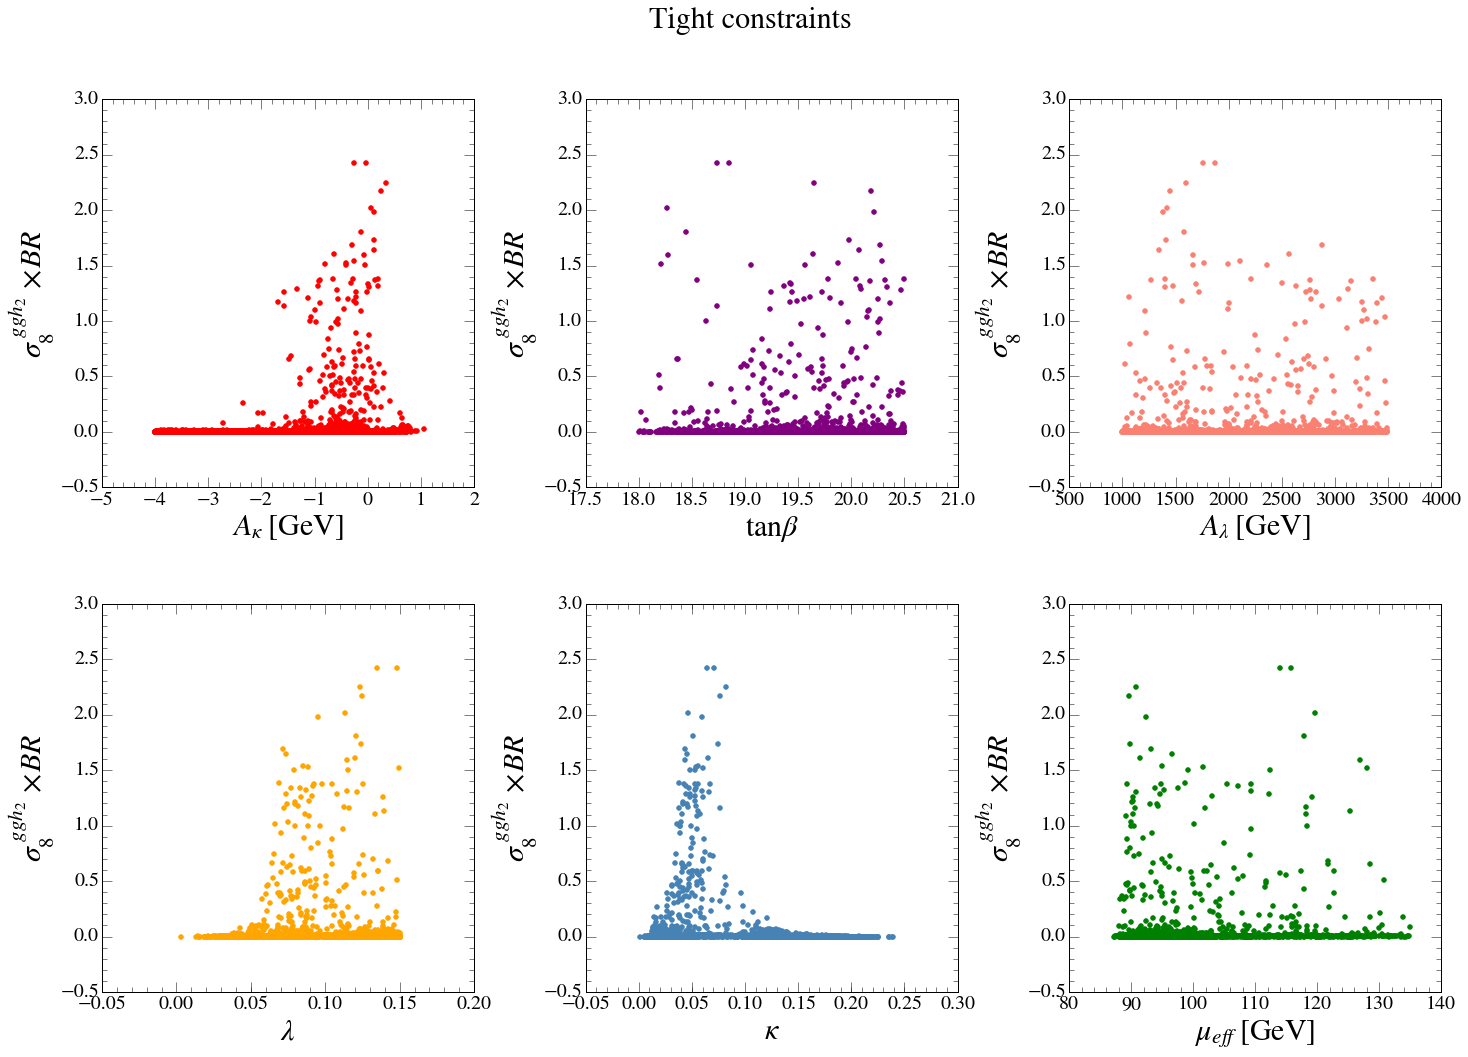

In [235]:
plot_input_params_scatters(df_pass_all_strict[df_pass_all_strict.xsec_ggf8_h2_2a_4tau >0], 'xsec_ggf8_h2_2a_4tau', r"$\sigma^{ggh_2}_{8} \times BR$", title="Tight constraints")

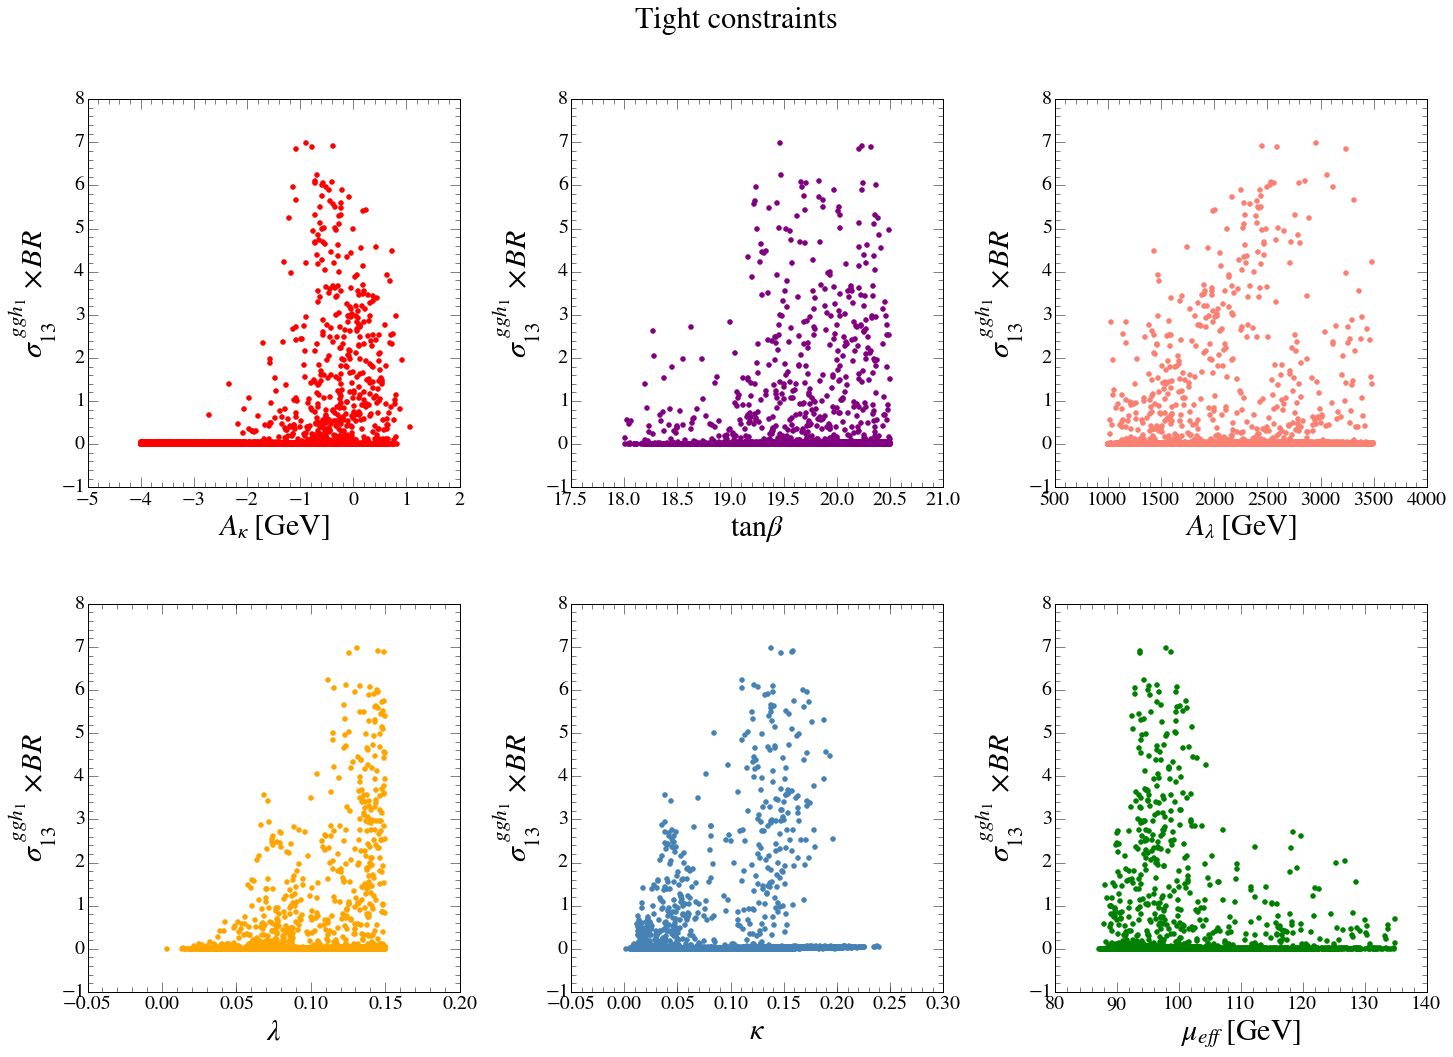

In [40]:
plot_input_params_scatters(df_pass_all_strict, 'xsec_ggf13_h1_2a_4tau', r"$\sigma^{ggh_1}_{13} \times BR$", title="Tight constraints")

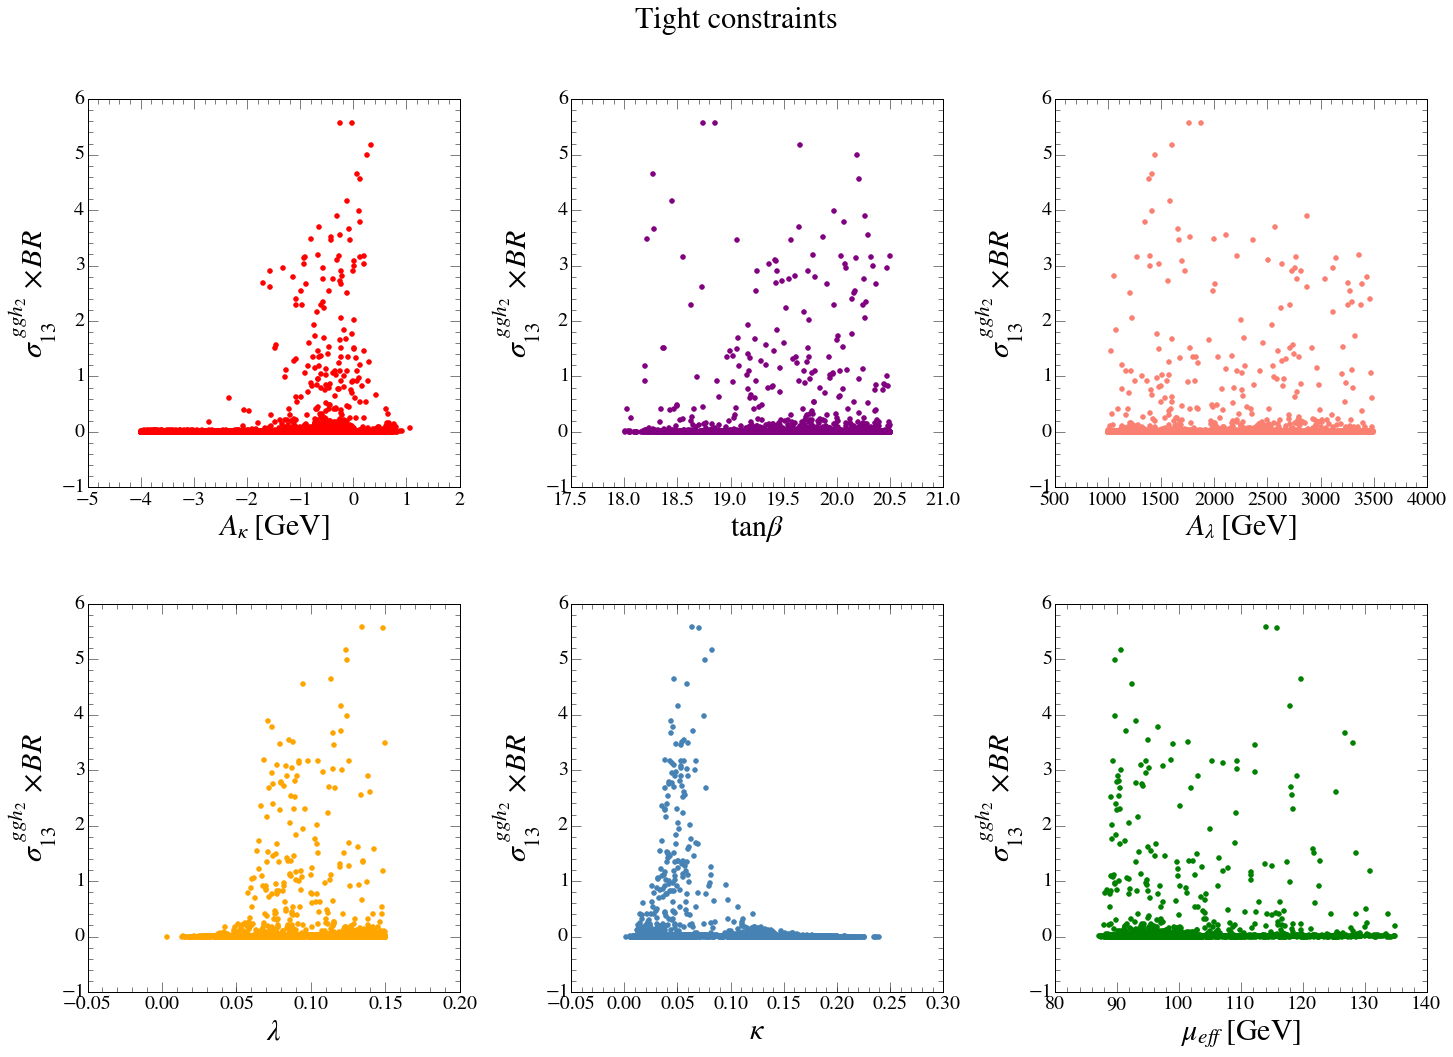

In [41]:
plot_input_params_scatters(df_pass_all_strict, 'xsec_ggf13_h2_2a_4tau', r"$\sigma^{ggh_2}_{13} \times BR$", title="Tight constraints")

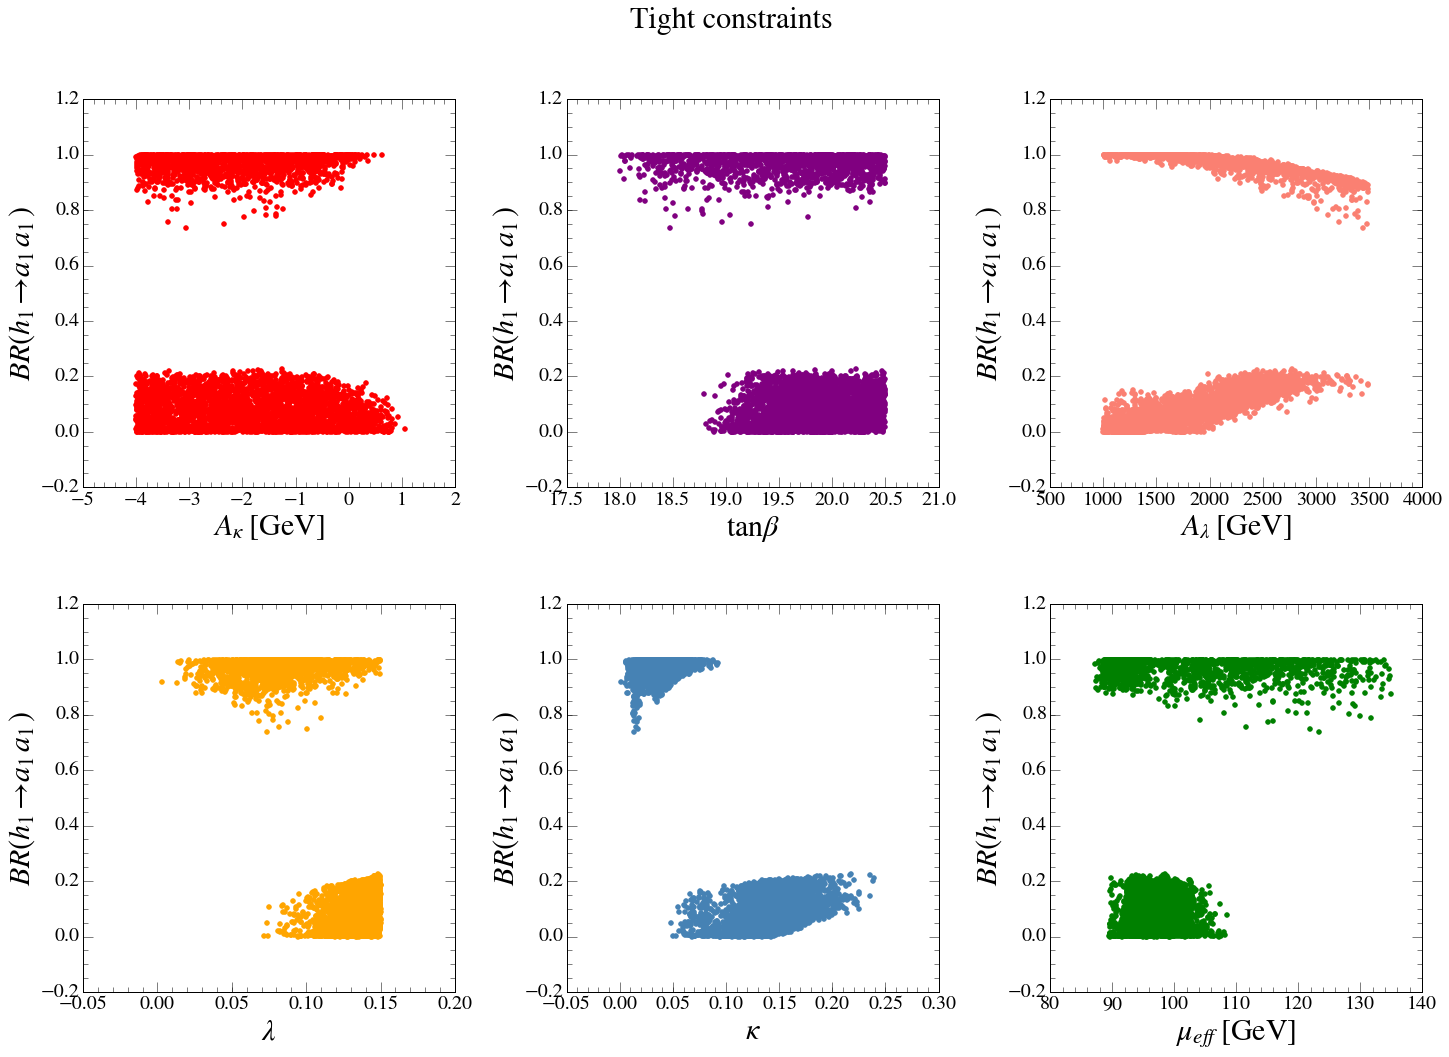

In [327]:
plot_input_params_scatters(df_pass_all_strict, 'Brh1a1a1', r"$BR(h_1\to a_1a_1)$", title="Tight constraints")

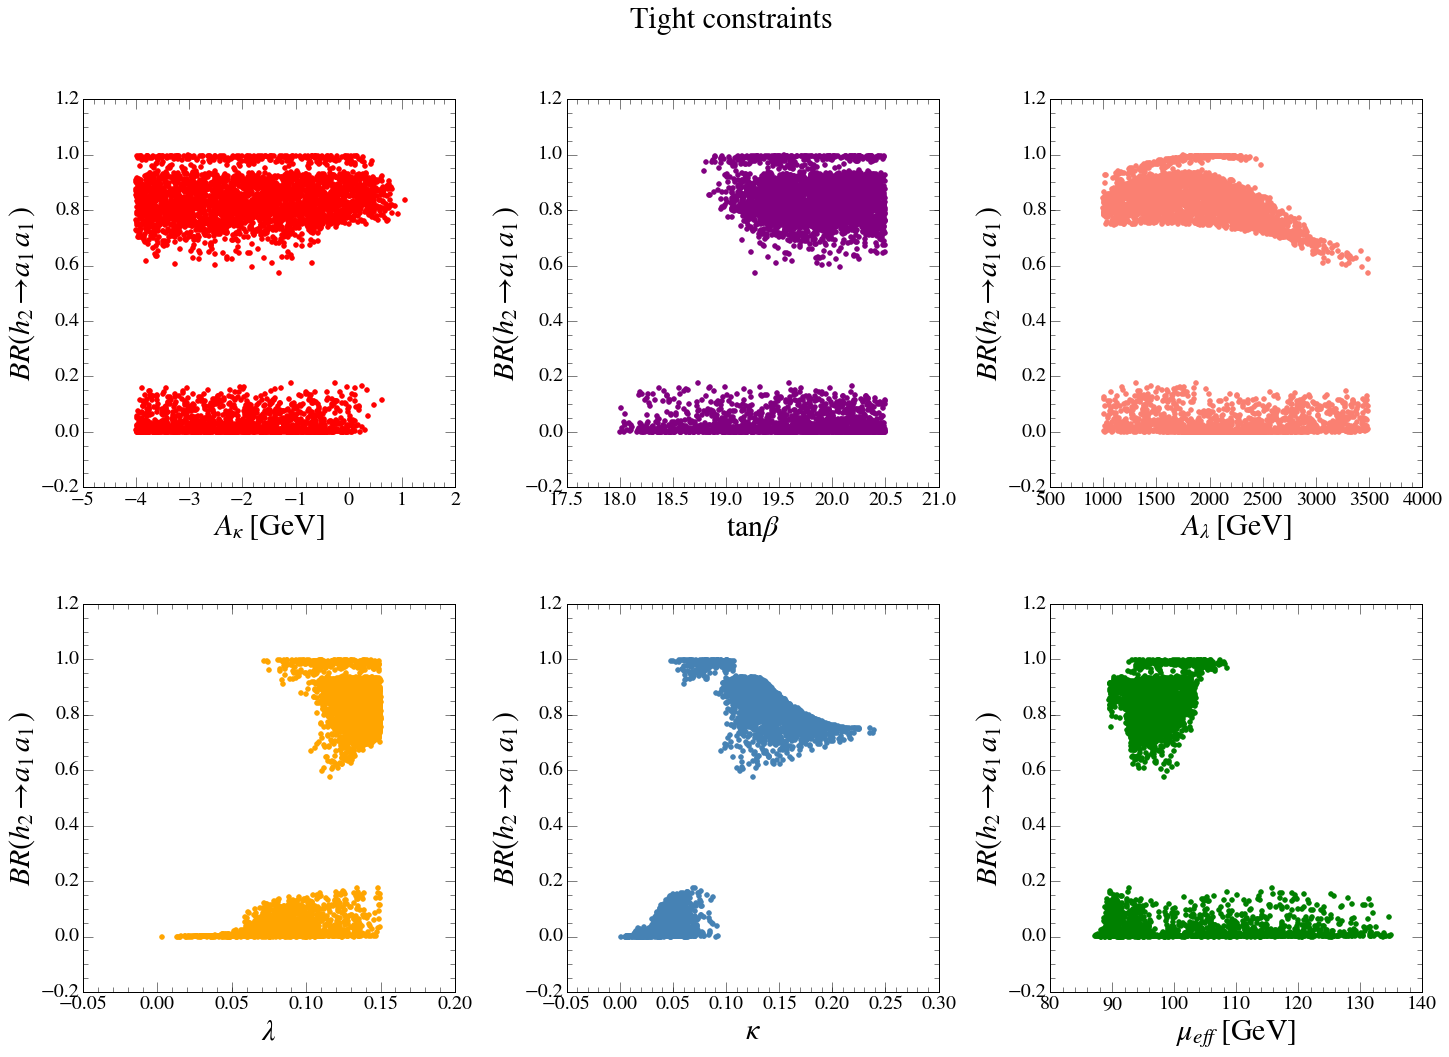

In [328]:
plot_input_params_scatters(df_pass_all_strict, 'Brh2a1a1', r"$BR(h_2\to a_1a_1)$", title="Tight constraints")

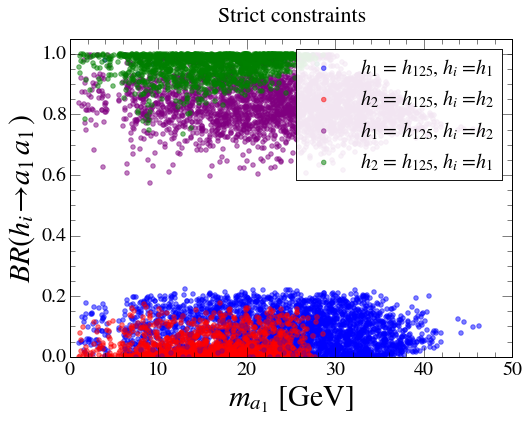

In [132]:
plot_scatter(xvar='ma1', yvar='Brh1a1a1', alpha=0.5,
             df=df_pass_all_strict[(df_pass_all_strict.mh1>122.1) & (df_pass_all_strict.mh1<128.1)], 
             color='blue', label=r"$h_1 =\ h_{125},\ h_i = h_1$")
plot_scatter(xvar='ma1', yvar='Brh2a1a1', ax=plt.gca(), alpha=0.5,
             df=df_pass_all_strict[(df_pass_all_strict.mh2>122.1) & (df_pass_all_strict.mh2<128.1)], 
             color='red', label=r"$h_2 =\ h_{125},\ h_i = h_2$")
plot_scatter(xvar='ma1', yvar='Brh2a1a1', ax=plt.gca(), alpha=0.5,
             df=df_pass_all_strict[(df_pass_all_strict.mh1>122.1) & (df_pass_all_strict.mh1<128.1)], 
             color='purple', label=r"$h_1 =\ h_{125},\ h_i = h_2$")
plot_scatter(xvar='ma1', yvar='Brh1a1a1', ax=plt.gca(), alpha=0.5,
             df=df_pass_all_strict[(df_pass_all_strict.mh2>122.1) & (df_pass_all_strict.mh2<128.1)], 
             color='green', label=r"$h_2 =\ h_{125},\ h_i = h_1$")
plt.xlabel(r"$m_{a_1}\mathrm{\ [GeV]}$")
plt.ylabel(r"$BR(h_i \to a_1 a_1)$")
plt.xlim(0, 50)
plt.ylim(0, 1.05)
plt.legend(loc=0, fontsize=20, framealpha=0.9)
plt.title("Strict constraints", fontsize=22)

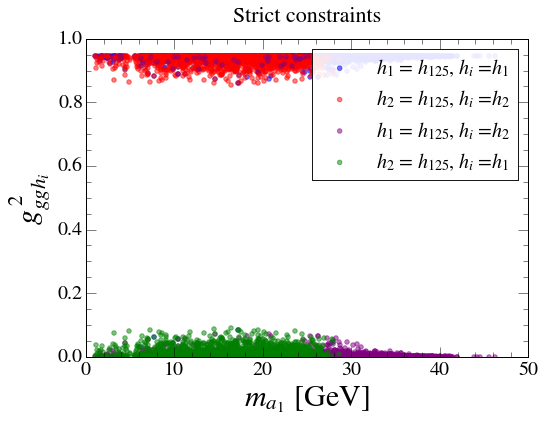

In [262]:
plot_scatter(xvar='ma1', yvar='h1ggrc2', alpha=0.5,
             df=df_pass_all_strict[(df_pass_all_strict.mh1>122.1) & (df_pass_all_strict.mh1<128.1)], 
             color='blue', label=r"$h_1 =\ h_{125},\ h_i = h_1$")
plot_scatter(xvar='ma1', yvar='h2ggrc2', ax=plt.gca(), alpha=0.5,
             df=df_pass_all_strict[(df_pass_all_strict.mh2>122.1) & (df_pass_all_strict.mh2<128.1)], 
             color='red', label=r"$h_2 =\ h_{125},\ h_i = h_2$")
plot_scatter(xvar='ma1', yvar='h2ggrc2', ax=plt.gca(), alpha=0.5,
             df=df_pass_all_strict[(df_pass_all_strict.mh1>122.1) & (df_pass_all_strict.mh1<128.1)], 
             color='purple', label=r"$h_1 =\ h_{125},\ h_i = h_2$")
plot_scatter(xvar='ma1', yvar='h1ggrc2', ax=plt.gca(), alpha=0.5,
             df=df_pass_all_strict[(df_pass_all_strict.mh2>122.1) & (df_pass_all_strict.mh2<128.1)], 
             color='green', label=r"$h_2 =\ h_{125},\ h_i = h_1$")
plt.xlabel(r"$m_{a_1}\mathrm{\ [GeV]}$")
plt.ylabel(r"$g_{ggh_{i}}^2$")
plt.xlim(0, 50)
plt.ylim(0, 1)
plt.legend(loc=0, fontsize=20, framealpha=0.9)
plt.title("Strict constraints", fontsize=22)

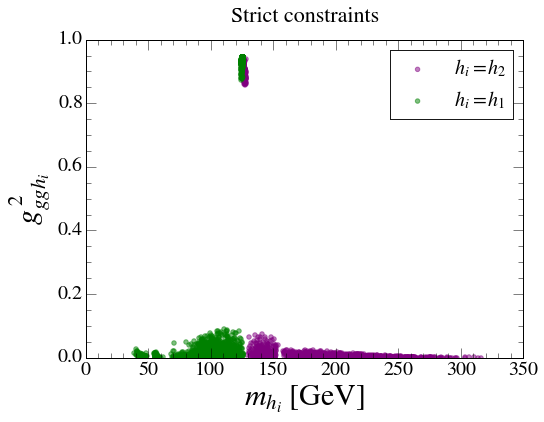

In [263]:
plot_scatter(xvar='mh2', yvar='h2ggrc2', alpha=0.5,
             df=df_pass_all_strict, 
             color='purple', label=r"$h_i = h_2$")
plot_scatter(xvar='mh1', yvar='h1ggrc2', ax=plt.gca(), alpha=0.5,
             df=df_pass_all_strict, 
             color='green', label=r"$h_i = h_1$")
plt.xlabel(r"$m_{h_i}\mathrm{\ [GeV]}$")
plt.ylabel(r"$g_{ggh_{i}}^2$")
# plt.xlim(0, 50)
plt.ylim(0, 1)
plt.legend(loc=0, fontsize=20, framealpha=0.9)
plt.title("Strict constraints", fontsize=22)

/Users/robina/.virtualenvs/NMSSMScan/lib/python2.7/site-packages/matplotlib/axes/_axes.py:475: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


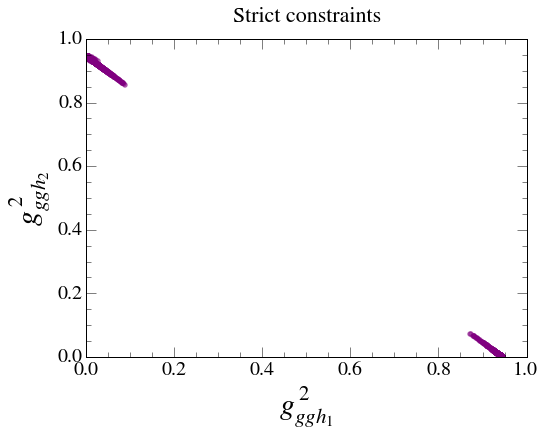

In [285]:
plot_scatter(xvar='h1ggrc2', yvar='h2ggrc2', alpha=0.5,
             df=df_pass_all_strict, 
             color='purple') #, label=r"$$")
# plot_scatter(xvar='mh1', yvar='h1ggrc2', ax=plt.gca(), alpha=0.5,
#              df=df_pass_all_strict, 
#              color='green', label=r"$h_i = h_1$")
plt.xlabel(r"$g_{ggh_{1}}^2$")
plt.ylabel(r"$g_{ggh_{2}}^2$")
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.legend(loc=0, fontsize=20, framealpha=0.9)
plt.title("Strict constraints", fontsize=22)

952251


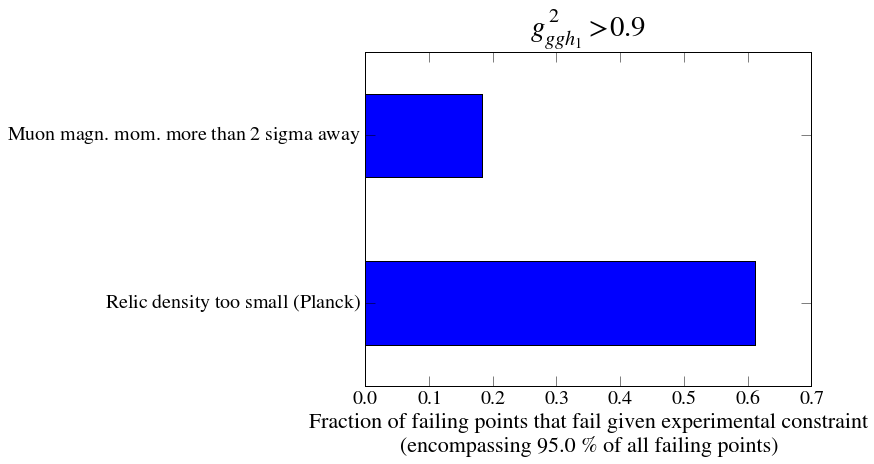

In [287]:
print len(df_orig[df_orig.h1ggrc2>0.9].index)
plot_constraints(df_orig[df_orig.h1ggrc2>0.9], r"$g_{ggh_1}^2 > 0.9$", 0.95)

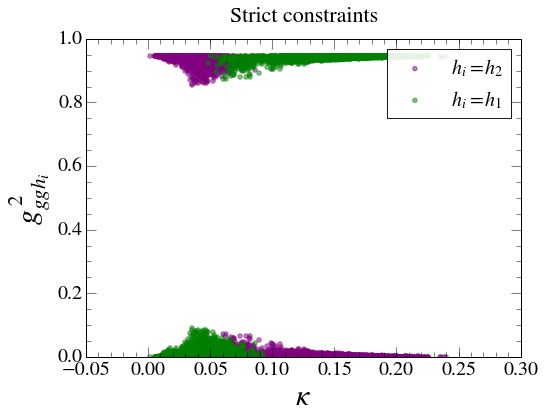

In [279]:
plot_scatter(xvar='kappa', yvar='h2ggrc2', alpha=0.5,
             df=df_pass_all_strict, 
             color='purple', label=r"$h_i = h_2$")
plot_scatter(xvar='kappa', yvar='h1ggrc2', ax=plt.gca(), alpha=0.5,
             df=df_pass_all_strict, 
             color='green', label=r"$h_i = h_1$")
plt.xlabel(r"$\kappa$")
plt.ylabel(r"$g_{ggh_{i}}^2$")
# plt.xlim(0, 1)
plt.ylim(0, 1)
plt.legend(loc=0, fontsize=20, framealpha=0.9)
plt.title("Strict constraints", fontsize=22)

In [296]:
import math

def plot_contours(ax, xlim=[0, 1], ylim=[0, 1], n_div=15, log_steps=False):
    """For contours of constant BR * ggh^2"""
    delta = min(xlim[1], ylim[1])/40.
    # generate a grid of x and y values
    x = np.arange(xlim[0], xlim[1]+delta, delta)
    y = np.arange(ylim[0], ylim[1]+delta, delta)
    X, Y = np.meshgrid(x, y)
    # generate a grid of the product of these values
    Z = X * Y

#     CS = ax.contour(X, Y, Z, [0.001, 0.005, 0.01, 0.05, 0.1, 0.25, 0.5, 0.75], colors='k')
    if log_steps:
        max_v = xlim[1] * ylim[1]
        min_v = xlim[0] * ylim[0]
        print math.log(max_v, 10)-5, math.log(max_v, 10)+1
        n_div = np.logspace( math.log(max_v, 10)-5, math.log(max_v, 10)+1, num=7)
        
    CS = ax.contour(X, Y, Z, n_div, colors='k')
    ax.clabel(CS, inline=1, fontsize=16, fmt='%1.2E')

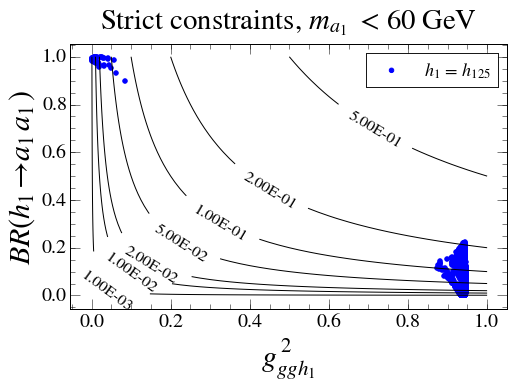

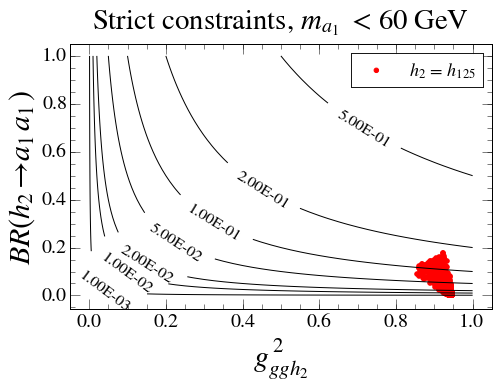

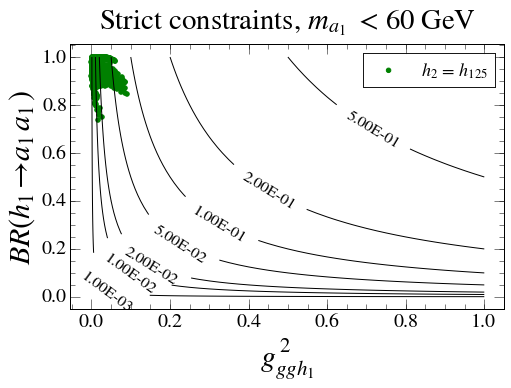

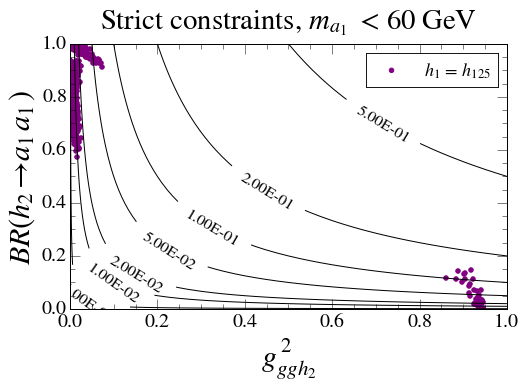

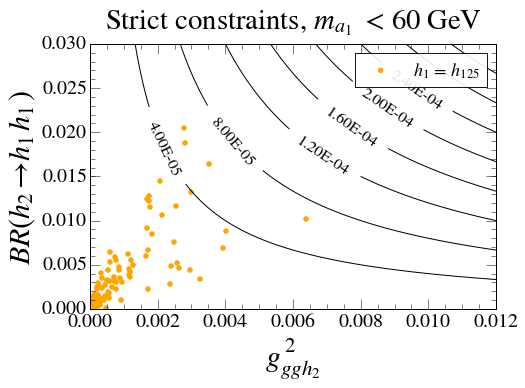

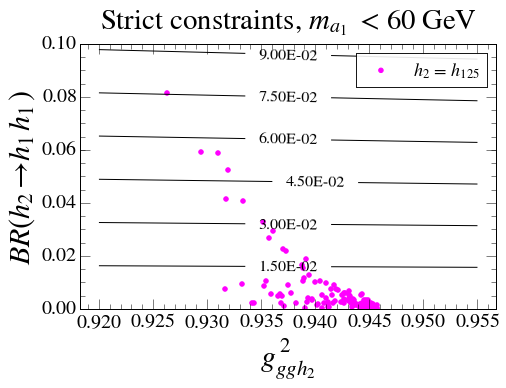

In [297]:
fs = 18
fa = 0.9
df = df_pass_all_strict[df_pass_all_strict.ma1 < 60]
n_div = [1E-3, 1E-2, 2E-2, 5E-2, 1E-1, 2E-1, 5E-1]
title = "Strict constraints, $m_{a_1}\ <\ 60\ \mathrm{GeV}$"

plot_scatter(xvar='h1ggrc2', yvar='Brh1a1a1',
             df=df[(df.Brh1a1a1>0) & (df.mh1>122.1) & (df.mh1<128.1)], 
             color='blue', label=r"$h_1 =\ h_{125}$", title=title,
             xlabel=r"$g_{ggh_1}^2$", ylabel=r"$BR(h_1 \to a_1 a_1)$")
plot_contours(plt.gca(), n_div=n_div)
plt.legend(loc=0, fontsize=fs, framealpha=fa)

plot_scatter(xvar='h2ggrc2', yvar='Brh2a1a1',
             df=df[(df.Brh2a1a1>0) & (df.mh2>122.1) & (df.mh2<128.1)], 
             color='red', label=r"$h_2 =\ h_{125}$", title=title,
             xlabel=r"$g_{ggh_2}^2$", ylabel=r"$BR(h_2 \to a_1 a_1)$")
plot_contours(plt.gca(), n_div=n_div)
plt.legend(loc=0, fontsize=fs, framealpha=fa)

plot_scatter(xvar='h1ggrc2', yvar='Brh1a1a1',
             df=df[(df.Brh1a1a1>0) & (df.mh2>122.1) & (df.mh2<128.1)], 
             color='green', label=r"$h_2 =\ h_{125}$", title=title,
             xlabel=r"$g_{ggh_1}^2$", ylabel=r"$BR(h_1 \to a_1 a_1)$")
plot_contours(plt.gca(), n_div=n_div)
plt.legend(loc=0, fontsize=fs, framealpha=fa)

plot_scatter(xvar='h2ggrc2', yvar='Brh2a1a1',
             df=df[(df.Brh2a1a1>0) & (df.mh1>122.1) & (df.mh1<128.1)], 
             color='purple', label=r"$h_1 =\ h_{125}$", title=title,
             xlabel=r"$g_{ggh_2}^2$", ylabel=r"$BR(h_2 \to a_1 a_1)$")
plt.xlim(0, 1)
plt.ylim(0, 1)
plot_contours(plt.gca(), plt.xlim(), plt.ylim(), n_div=n_div)
plt.legend(loc=0, fontsize=fs, framealpha=fa)

plot_scatter(xvar='h2ggrc2', yvar='Brh2h1h1',
             df=df[(df.Brh2h1h1>0) & (df.mh1>122.1) & (df.mh1<128.1)], 
             color='orange', label=r"$h_1 =\ h_{125}$", title=title,
             xlabel=r"$g_{ggh_2}^2$", ylabel=r"$BR(h_2 \to h_1 h_1)$")
plt.xlim(left=0)
plt.ylim(bottom=0)
plot_contours(plt.gca(), plt.xlim(), plt.ylim(), n_div=10)
plt.legend(loc=0, fontsize=fs, framealpha=fa)

plot_scatter(xvar='h2ggrc2', yvar='Brh2h1h1',
             df=df[(df.Brh2h1h1>0) & (df.mh2>122.1) & (df.mh2<128.1)], 
             color='fuchsia', label=r"$h_2 =\ h_{125}$", title=title,
             xlabel=r"$g_{ggh_2}^2$", ylabel=r"$BR(h_2 \to h_1 h_1)$")
plt.ylim(bottom=0)
plot_contours(plt.gca(), plt.xlim(), plt.ylim(), n_div=8)
plt.legend(loc=0, fontsize=fs, framealpha=fa)


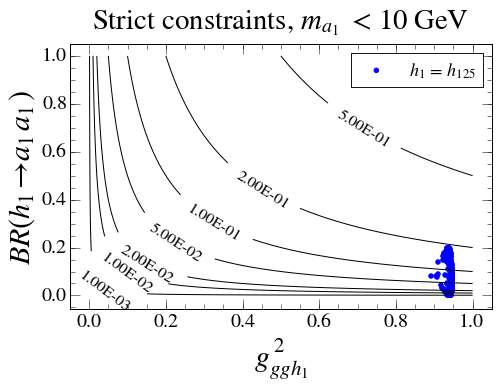

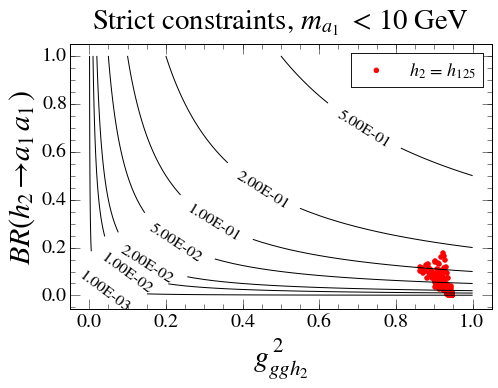

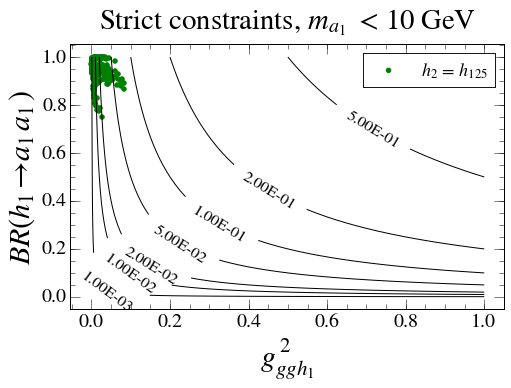

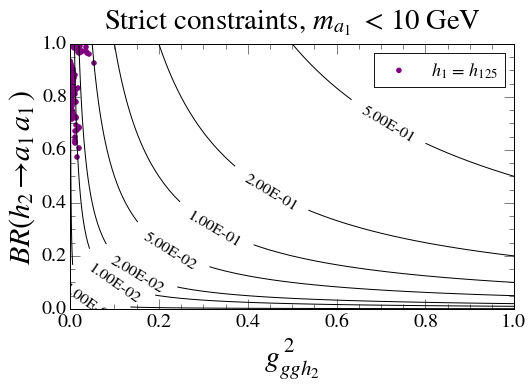

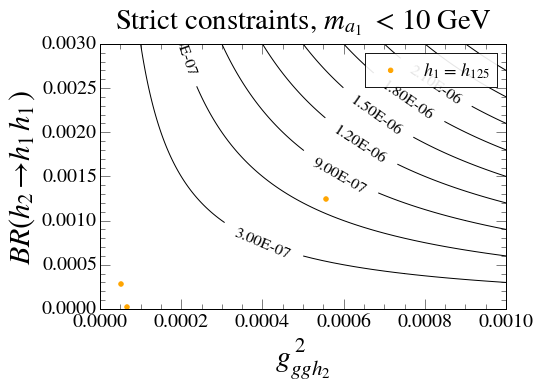

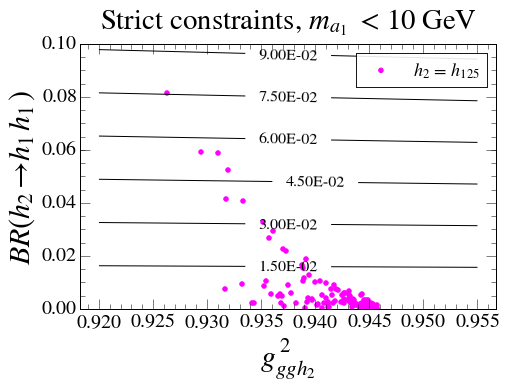

In [318]:
fs = 18
fa = 0.9
df = df_pass_all_strict[df_pass_all_strict.ma1 < 10]
n_div = [1E-3, 1E-2, 2E-2, 5E-2, 1E-1, 2E-1, 5E-1]
title = "Strict constraints, $m_{a_1}\ <\ 10\ \mathrm{GeV}$"

plot_scatter(xvar='h1ggrc2', yvar='Brh1a1a1',
             df=df[(df.Brh1a1a1>0) & (df.mh1>122.1) & (df.mh1<128.1) & (df.mh2>128.1)], 
             color='blue', label=r"$h_1 =\ h_{125}$", title=title,
             xlabel=r"$g_{ggh_1}^2$", ylabel=r"$BR(h_1 \to a_1 a_1)$")
plot_contours(plt.gca(), n_div=n_div)
plt.legend(loc=0, fontsize=fs, framealpha=fa)

plot_scatter(xvar='h2ggrc2', yvar='Brh2a1a1',
             df=df[(df.Brh2a1a1>0) & (df.mh2>122.1) & (df.mh2<128.1) & (df.mh1<122)], 
             color='red', label=r"$h_2 =\ h_{125}$", title=title,
             xlabel=r"$g_{ggh_2}^2$", ylabel=r"$BR(h_2 \to a_1 a_1)$")
plot_contours(plt.gca(), n_div=n_div)
plt.legend(loc=0, fontsize=fs, framealpha=fa)

plot_scatter(xvar='h1ggrc2', yvar='Brh1a1a1',
             df=df[(df.Brh1a1a1>0) & (df.mh2>122.1) & (df.mh2<128.1) & (df.mh1<122)], 
             color='green', label=r"$h_2 =\ h_{125}$", title=title,
             xlabel=r"$g_{ggh_1}^2$", ylabel=r"$BR(h_1 \to a_1 a_1)$")
plot_contours(plt.gca(), n_div=n_div)
plt.legend(loc=0, fontsize=fs, framealpha=fa)

plot_scatter(xvar='h2ggrc2', yvar='Brh2a1a1',
             df=df[(df.Brh2a1a1>0) & (df.mh1>122.1) & (df.mh1<128.1)& (df.mh2>128.1)], 
             color='purple', label=r"$h_1 =\ h_{125}$", title=title,
             xlabel=r"$g_{ggh_2}^2$", ylabel=r"$BR(h_2 \to a_1 a_1)$")
plt.xlim(0, 1)
plt.ylim(0, 1)
plot_contours(plt.gca(), plt.xlim(), plt.ylim(), n_div=n_div)
plt.legend(loc=0, fontsize=fs, framealpha=fa)

plot_scatter(xvar='h2ggrc2', yvar='Brh2h1h1',
             df=df[(df.Brh2h1h1>0) & (df.mh1>122.1) & (df.mh1<128.1)], 
             color='orange', label=r"$h_1 =\ h_{125}$", title=title,
             xlabel=r"$g_{ggh_2}^2$", ylabel=r"$BR(h_2 \to h_1 h_1)$")
plt.xlim(left=0, right=0.001)
plt.ylim(bottom=0, top=0.003)
plot_contours(plt.gca(), plt.xlim(), plt.ylim(), n_div=10)
plt.legend(loc=0, fontsize=fs, framealpha=fa)

plot_scatter(xvar='h2ggrc2', yvar='Brh2h1h1',
             df=df_pass_all_strict[(df_pass_all_strict.Brh2h1h1>0) & (df_pass_all_strict.mh2>122.1) & (df_pass_all_strict.mh2<128.1)], 
             color='fuchsia', label=r"$h_2 =\ h_{125}$", title=title,
             xlabel=r"$g_{ggh_2}^2$", ylabel=r"$BR(h_2 \to h_1 h_1)$")
plt.ylim(bottom=0)
plot_contours(plt.gca(), plt.xlim(), plt.ylim(), n_div=8)
plt.legend(loc=0, fontsize=fs, framealpha=fa)


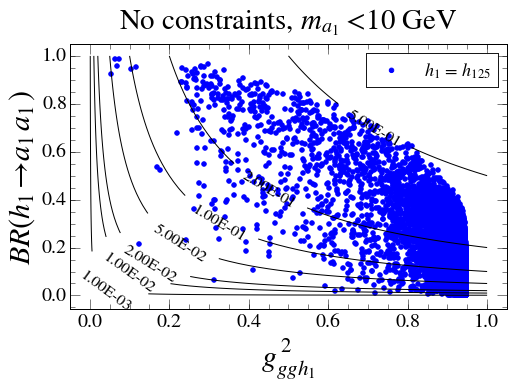

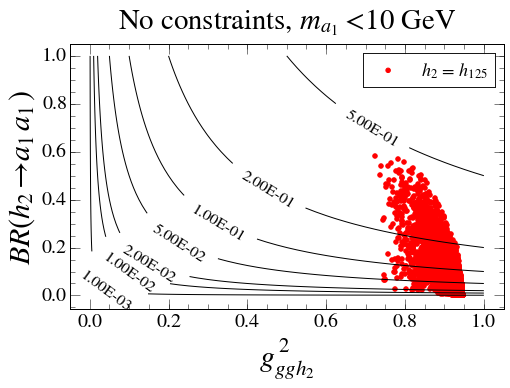

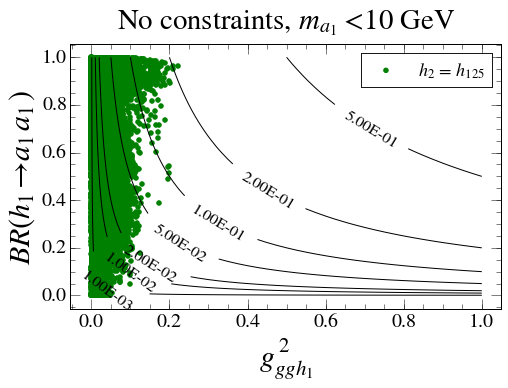

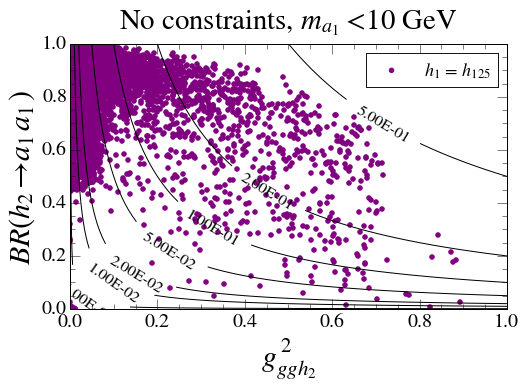

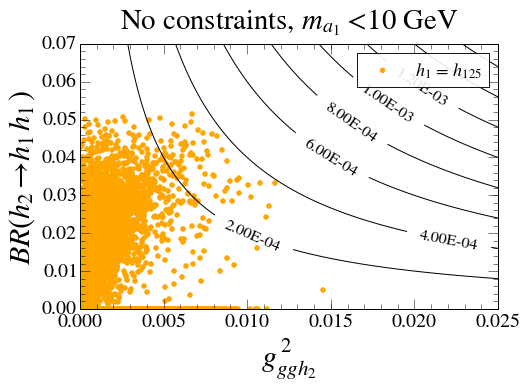

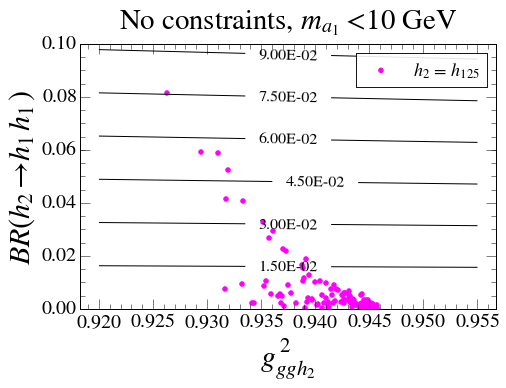

In [323]:
fs = 18
fa = 0.9
df = df_orig[df_orig.ma1 < 10]
n_div = [1E-3, 1E-2, 2E-2, 5E-2, 1E-1, 2E-1, 5E-1]
title = "No constraints, $m_{a_1} < 10$ GeV"

plot_scatter(xvar='h1ggrc2', yvar='Brh1a1a1',
             df=df[(df.Brh1a1a1>0) & (df.mh1>122.1) & (df.mh1<128.1) & (df.mh2>128.1)], 
             color='blue', label=r"$h_1 =\ h_{125}$", title=title,
             xlabel=r"$g_{ggh_1}^2$", ylabel=r"$BR(h_1 \to a_1 a_1)$")
plot_contours(plt.gca(), n_div=n_div)
plt.legend(loc=0, fontsize=fs, framealpha=fa)

plot_scatter(xvar='h2ggrc2', yvar='Brh2a1a1',
             df=df[(df.Brh2a1a1>0) & (df.mh2>122.1) & (df.mh2<128.1)& (df.mh1<122.1)], 
             color='red', label=r"$h_2 =\ h_{125}$", title=title,
             xlabel=r"$g_{ggh_2}^2$", ylabel=r"$BR(h_2 \to a_1 a_1)$")
plot_contours(plt.gca(), n_div=n_div)
plt.legend(loc=0, fontsize=fs, framealpha=fa)

plot_scatter(xvar='h1ggrc2', yvar='Brh1a1a1',
             df=df[(df.Brh1a1a1>0) & (df.mh2>122.1) & (df.mh2<128.1)& (df.mh1<122.1)], 
             color='green', label=r"$h_2 =\ h_{125}$", title=title,
             xlabel=r"$g_{ggh_1}^2$", ylabel=r"$BR(h_1 \to a_1 a_1)$")
plot_contours(plt.gca(), n_div=n_div)
plt.legend(loc=0, fontsize=fs, framealpha=fa)

plot_scatter(xvar='h2ggrc2', yvar='Brh2a1a1',
             df=df[(df.Brh2a1a1>0) & (df.mh1>122.1) & (df.mh1<128.1)& (df.mh2>128.1)], 
             color='purple', label=r"$h_1 =\ h_{125}$", title=title,
             xlabel=r"$g_{ggh_2}^2$", ylabel=r"$BR(h_2 \to a_1 a_1)$")
plt.xlim(0, 1)
plt.ylim(0, 1)
plot_contours(plt.gca(), plt.xlim(), plt.ylim(), n_div=n_div)
plt.legend(loc=0, fontsize=fs, framealpha=fa)

plot_scatter(xvar='h2ggrc2', yvar='Brh2h1h1',
             df=df[(df.Brh2h1h1>0) & (df.mh1>122.1) & (df.mh1<128.1)], 
             color='orange', label=r"$h_1 =\ h_{125}$", title=title,
             xlabel=r"$g_{ggh_2}^2$", ylabel=r"$BR(h_2 \to h_1 h_1)$")
plt.xlim(left=0)
plt.ylim(bottom=0)
plot_contours(plt.gca(), plt.xlim(), plt.ylim(), n_div=10)
plt.legend(loc=0, fontsize=fs, framealpha=fa)

plot_scatter(xvar='h2ggrc2', yvar='Brh2h1h1',
             df=df_pass_all_strict[(df_pass_all_strict.Brh2h1h1>0) & (df_pass_all_strict.mh2>122.1) & (df_pass_all_strict.mh2<128.1)], 
             color='fuchsia', label=r"$h_2 =\ h_{125}$", title=title,
             xlabel=r"$g_{ggh_2}^2$", ylabel=r"$BR(h_2 \to h_1 h_1)$")
plt.ylim(bottom=0)
plot_contours(plt.gca(), plt.xlim(), plt.ylim(), n_div=8)
plt.legend(loc=0, fontsize=fs, framealpha=fa)


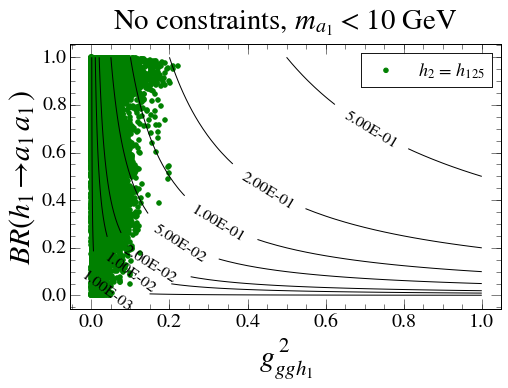

In [322]:
df=df_orig[df_orig.ma1<10]
plot_scatter(xvar='h1ggrc2', yvar='Brh1a1a1',
             df=df[(df.Brh1a1a1>0) & (df.mh2>122.1) & (df.mh2<128.1) & (df.ma1<10) &(df.mh1<122.1)], 
             color='green', label=r"$h_2 =\ h_{125}$", title='No constraints, $m_{a_1} <\ 10$ GeV',
             xlabel=r"$g_{ggh_1}^2$", ylabel=r"$BR(h_1 \to a_1 a_1)$")
plot_contours(plt.gca(), n_div=n_div)
plt.legend(loc=0, fontsize=fs, framealpha=fa)

(<matplotlib.axes._subplots.AxesSubplot at 0x1143a5590>,
 <matplotlib.collections.PathCollection at 0x11401f510>)

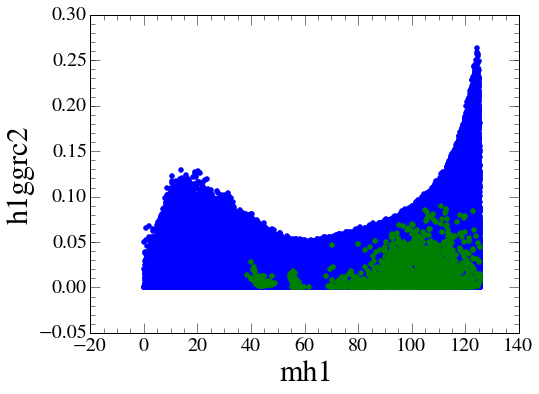

In [290]:
plot_scatter(df=df_orig[(df_orig.mh2>122) & (df_orig.mh2<128)], xvar='mh1', yvar='h1ggrc2', color='blue')
plot_scatter(df=df_pass_all_strict[(df_pass_all_strict.mh2>122) & (df_pass_all_strict.mh2<128)], xvar='mh1', yvar='h1ggrc2', ax=plt.gca(), color='green')

(100, 400)

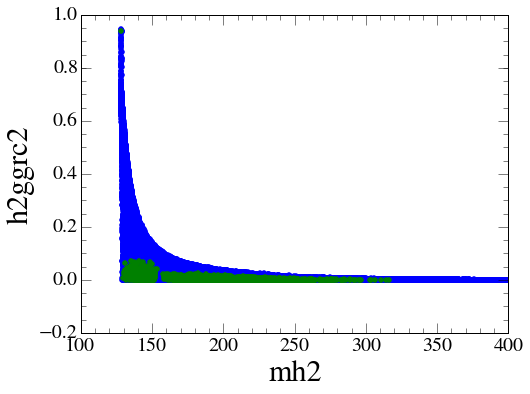

In [302]:
plot_scatter(df=df_orig[(df_orig.mh1>122) & (df_orig.mh1<128) & (df_orig.mh2>128)], xvar='mh2', yvar='h2ggrc2', color='blue')
plot_scatter(df=df_pass_all_strict[(df_pass_all_strict.mh1>122) & (df_pass_all_strict.mh1<128) & (df_pass_all_strict.mh2>128)], xvar='mh2', yvar='h2ggrc2', ax=plt.gca(), color='green')
plt.xlim(100,400)

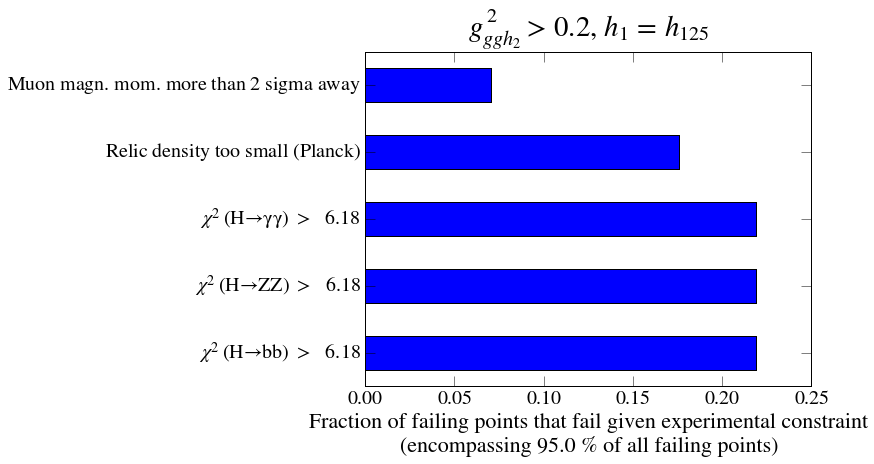

In [303]:
plot_constraints(df_orig[(df_orig.h2ggrc2>0.2) & (df_orig.mh1>122) & (df_orig.mh1<128) & (df_orig.mh2>128)], 
                 r"$g_{ggh_2}^2 >\ 0.2,\ h_1 =\ h_{125}$", 0.95)

In [305]:
df_pass_all_strict.loc[:, 'xsec_ggf8_h1_2a_2b2tau'] = df_pass_all_strict['xsec_ggf8_h1'] * df_pass_all_strict['h1ggrc2'] * df_pass_all_strict['Brh1a1a1'] * 2 *df_pass_all_strict.Bra1tautau * df_pass_all_strict.Bra1bb
df_pass_all_strict.loc[:, 'xsec_ggf13_h1_2a_2b2tau'] = df_pass_all_strict['xsec_ggf13_h1'] * df_pass_all_strict['h1ggrc2'] * df_pass_all_strict['Brh1a1a1'] * 2 * df_pass_all_strict.Bra1tautau * df_pass_all_strict.Bra1bb

In [305]:
df_pass_all_strict.loc[:, 'xsec_ggf8_h1_2a_2b2tau'] = df_pass_all_strict['xsec_ggf8_h1'] * df_pass_all_strict['h1ggrc2'] * df_pass_all_strict['Brh1a1a1'] * 2 *df_pass_all_strict.Bra1tautau * df_pass_all_strict.Bra1bb
df_pass_all_strict.loc[:, 'xsec_ggf13_h1_2a_2b2tau'] = df_pass_all_strict['xsec_ggf13_h1'] * df_pass_all_strict['h1ggrc2'] * df_pass_all_strict['Brh1a1a1'] * 2 * df_pass_all_strict.Bra1tautau * df_pass_all_strict.Bra1bb

In [310]:
df_pass_all_strict.loc[:, 'xsec_ggf8_h2_2h1_2b2tau'] = df_pass_all_strict['xsec_ggf8_h2'] * df_pass_all_strict['h2ggrc2'] * df_pass_all_strict['Brh2h1h1'] * 2 *df_pass_all_strict.Brh1tautau * df_pass_all_strict.Brh1bb
df_pass_all_strict.loc[:, 'xsec_ggf13_h2_2h1_2b2tau'] = df_pass_all_strict['xsec_ggf13_h2'] * df_pass_all_strict['h2ggrc2'] * df_pass_all_strict['Brh2h1h1'] * 2 * df_pass_all_strict.Brh1tautau * df_pass_all_strict.Brh1bb

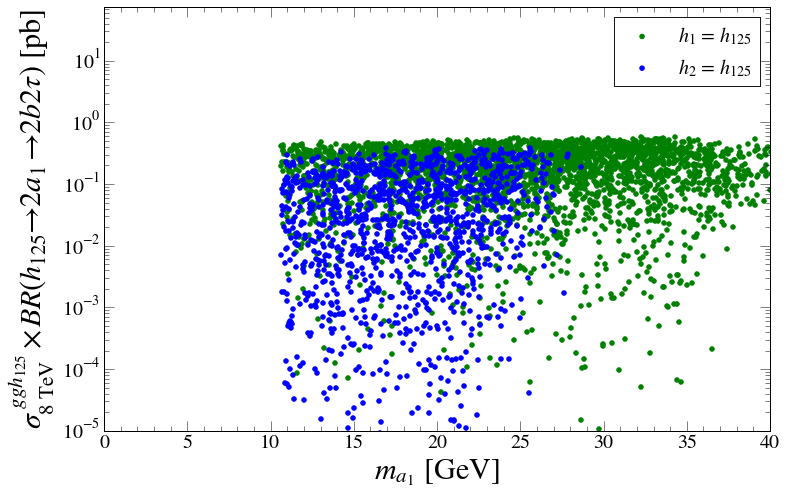

In [313]:

# total xs * BR
plot_scatter(df=df_pass_all_strict[(df_pass_all_strict.mh1 < 128) & (df_pass_all_strict.mh1 > 122)], 
             xvar='ma1', yvar='xsec_ggf8_h1_2a_2b2tau', # ax=plt.gca(), 
             color='green', label=r'$h_1 =\ h_{125}$')
plot_scatter(df=df_pass_all_strict[(df_pass_all_strict.mh2 < 128) & (df_pass_all_strict.mh2 > 122)],
             ax=plt.gca(), xvar='ma1', yvar='xsec_ggf8_h2_2a_2b2tau', 
             color='blue', label=r'$h_2 =\ h_{125}$')
# plot_scatter(df=df_pass_all_strict[(df_pass_all_strict.mh2 < 128) & (df_pass_all_strict.mh2 > 122)],
#              ax=plt.gca(), xvar='mh1', yvar='xsec_ggf8_h2_2h1_2b2tau', 
#              color='purple', label=r'$h_2 =\ h_{125},\ h_2 \to 2 h_1 \to 2b2\tau$')
fig = plt.gcf()
fig.set_size_inches(12, 8)
plt.xlabel(r'$m_{a_1} \mathrm{\ [GeV]}$')
plt.ylabel(r'$\sigma^{ggh_{125}}_{\mathrm{8\ TeV}} \times BR (h_{125} \to 2a_1 \to 2b2\tau) \mathrm{\ [pb]}$')
plt.yscale('log')
plt.ylim(bottom=0.00001, top=75)
plt.xlim(0, 40)
# plot_atlas_limit(color='red', linewidth=2)
# plot_cms_limit(color='indigo', linewidth=2)
plt.legend(fontsize=20, loc=1, framealpha=0.9)

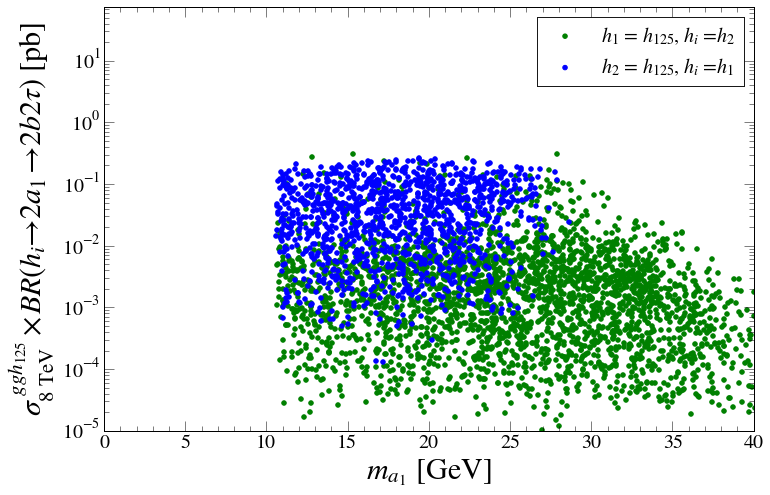

In [314]:

# total xs * BR
plot_scatter(df=df_pass_all_strict[(df_pass_all_strict.mh1 < 128) & (df_pass_all_strict.mh1 > 122)], 
             xvar='ma1', yvar='xsec_ggf8_h2_2a_2b2tau', # ax=plt.gca(), 
             color='green', label=r'$h_1 =\ h_{125},\ h_i = h_2$')
plot_scatter(df=df_pass_all_strict[(df_pass_all_strict.mh2 < 128) & (df_pass_all_strict.mh2 > 122)],
             ax=plt.gca(), xvar='ma1', yvar='xsec_ggf8_h1_2a_2b2tau', 
             color='blue', label=r'$h_2 =\ h_{125},\ h_i = h_1$')
# plot_scatter(df=df_pass_all_strict[(df_pass_all_strict.mh2 < 128) & (df_pass_all_strict.mh2 > 122)],
#              ax=plt.gca(), xvar='mh1', yvar='xsec_ggf8_h2_2h1_2b2tau', 
#              color='purple', label=r'$h_2 =\ h_{125},\ h_2 \to 2 h_1 \to 2b2\tau$')
fig = plt.gcf()
fig.set_size_inches(12, 8)
plt.xlabel(r'$m_{a_1} \mathrm{\ [GeV]}$')
plt.ylabel(r'$\sigma^{ggh_{125}}_{\mathrm{8\ TeV}} \times BR (h_{i} \to 2a_1 \to 2b2\tau) \mathrm{\ [pb]}$')
plt.yscale('log')
plt.ylim(bottom=0.00001, top=75)
plt.xlim(0, 40)
# plot_atlas_limit(color='red', linewidth=2)
# plot_cms_limit(color='indigo', linewidth=2)
plt.legend(fontsize=20, loc=1, framealpha=0.9)

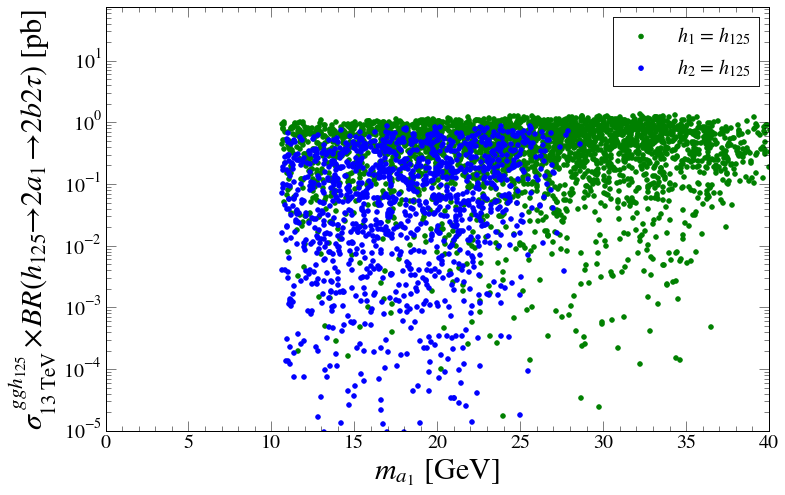

In [309]:

# total xs * BR
plot_scatter(df=df_pass_all_strict[(df_pass_all_strict.mh1 < 128) & (df_pass_all_strict.mh1 > 122)], 
             xvar='ma1', yvar='xsec_ggf13_h1_2a_2b2tau', # ax=plt.gca(), 
             color='green', label=r'$h_1 =\ h_{125}$')
plot_scatter(df=df_pass_all_strict[(df_pass_all_strict.mh2 < 128) & (df_pass_all_strict.mh2 > 122)],
             ax=plt.gca(), xvar='ma1', yvar='xsec_ggf13_h2_2a_2b2tau', 
             color='blue', label=r'$h_2 =\ h_{125}$')
# plot_scatter(df=df_pass_all_strict[(df_pass_all_strict.mh2 < 128) & (df_pass_all_strict.mh2 > 122)],
#              ax=plt.gca(), xvar='ma1', yvar='xsec_ggf8_h2_2h1_4tau', 
#              color='purple', label=r'$h_2 =\ h_{125},\ h_2 \to 2 h_1 \to 4\tau$')
fig = plt.gcf()
fig.set_size_inches(12, 8)
plt.xlabel(r'$m_{a_1} \mathrm{\ [GeV]}$')
plt.ylabel(r'$\sigma^{ggh_{125}}_{\mathrm{13\ TeV}} \times BR (h_{125} \to 2a_1 \to 2b2\tau) \mathrm{\ [pb]}$')
plt.yscale('log')
plt.ylim(bottom=0.00001, top=75)
plt.xlim(0, 40)
# plot_atlas_limit(color='red', linewidth=2)
# plot_cms_limit(color='indigo', linewidth=2)
plt.legend(fontsize=20, loc=1, framealpha=0.9)

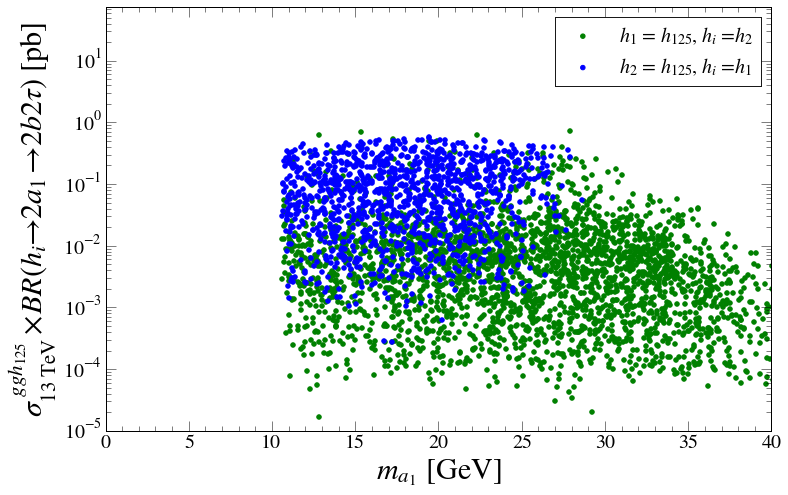

In [315]:

# total xs * BR
plot_scatter(df=df_pass_all_strict[(df_pass_all_strict.mh1 < 128) & (df_pass_all_strict.mh1 > 122)], 
             xvar='ma1', yvar='xsec_ggf13_h2_2a_2b2tau', # ax=plt.gca(), 
             color='green', label=r'$h_1 =\ h_{125},\ h_i = h_2$')
plot_scatter(df=df_pass_all_strict[(df_pass_all_strict.mh2 < 128) & (df_pass_all_strict.mh2 > 122)],
             ax=plt.gca(), xvar='ma1', yvar='xsec_ggf13_h1_2a_2b2tau', 
             color='blue', label=r'$h_2 =\ h_{125},\ h_i = h_1$')
# plot_scatter(df=df_pass_all_strict[(df_pass_all_strict.mh2 < 128) & (df_pass_all_strict.mh2 > 122)],
#              ax=plt.gca(), xvar='mh1', yvar='xsec_ggf8_h2_2h1_2b2tau', 
#              color='purple', label=r'$h_2 =\ h_{125},\ h_2 \to 2 h_1 \to 2b2\tau$')
fig = plt.gcf()
fig.set_size_inches(12, 8)
plt.xlabel(r'$m_{a_1} \mathrm{\ [GeV]}$')
plt.ylabel(r'$\sigma^{ggh_{125}}_{\mathrm{13\ TeV}} \times BR (h_{i} \to 2a_1 \to 2b2\tau) \mathrm{\ [pb]}$')
plt.yscale('log')
plt.ylim(bottom=0.00001, top=75)
plt.xlim(0, 40)
# plot_atlas_limit(color='red', linewidth=2)
# plot_cms_limit(color='indigo', linewidth=2)
plt.legend(fontsize=20, loc=1, framealpha=0.9)

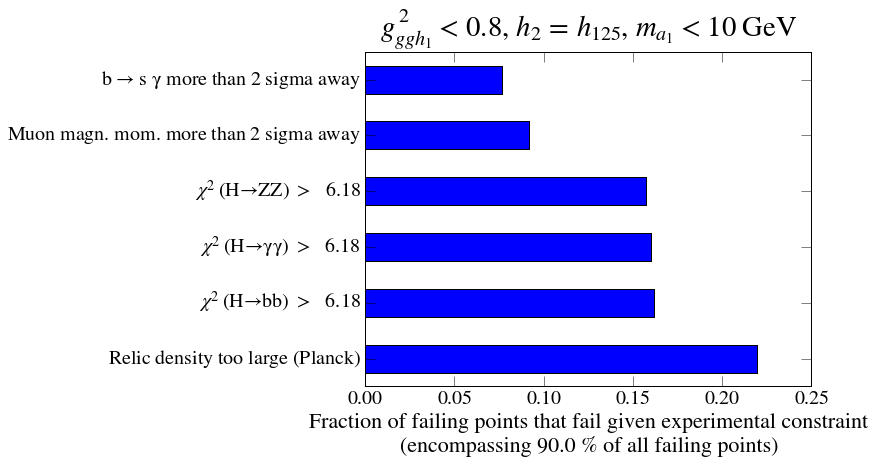

In [325]:
df = df_orig
plot_constraints(df[(df.Brh1a1a1>0) & (df.mh2>122.1) & (df.mh2<128.1) * (df.mh1<122) & (df.h1ggrc2<0.8) & (df.ma1<10)], 
                 r'$g_{ggh_1}^2 <\ 0.8,\ h_2 =\ h_{125},\ m_{a_1}<\ 10\ \mathrm{GeV}$')

In [148]:
df_pass_all_strict[(df_pass_all_strict.xsec_ggf8_h1_2a_4tau>1)&(df_pass_all_strict.ma1<10)].file.values

array([ 'jobs_100_MICRO_SCAN_I42_NTv482_HBv421_REDUCED_3_02_Nov_15_1041/spectr_1_9911.dat',
       'jobs_100_MICRO_SCAN_I42_NTv482_HBv421_REDUCED_3_02_Nov_15_1041/spectr_11_2445.dat',
       'jobs_100_MICRO_SCAN_I42_NTv482_HBv421_REDUCED_3_02_Nov_15_1041/spectr_11_3407.dat',
       'jobs_100_MICRO_SCAN_I42_NTv482_HBv421_REDUCED_3_02_Nov_15_1041/spectr_12_11639.dat',
       'jobs_100_MICRO_SCAN_I42_NTv482_HBv421_REDUCED_3_02_Nov_15_1041/spectr_12_1252.dat',
       'jobs_100_MICRO_SCAN_I42_NTv482_HBv421_REDUCED_3_02_Nov_15_1041/spectr_12_19910.dat',
       'jobs_100_MICRO_SCAN_I42_NTv482_HBv421_REDUCED_3_02_Nov_15_1041/spectr_13_14734.dat',
       'jobs_100_MICRO_SCAN_I42_NTv482_HBv421_REDUCED_3_02_Nov_15_1041/spectr_15_15319.dat',
       'jobs_100_MICRO_SCAN_I42_NTv482_HBv421_REDUCED_3_02_Nov_15_1041/spectr_15_361.dat',
       'jobs_100_MICRO_SCAN_I42_NTv482_HBv421_REDUCED_3_02_Nov_15_1041/spectr_16_9291.dat',
       'jobs_100_MICRO_SCAN_I42_NTv482_HBv421_REDUCED_3_02_Nov_15_1041/spectr